<a href="https://colab.research.google.com/github/adnannasirsyed/ML_projects/blob/main/Project_classification_model_predict_visa_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction and Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

### Project Structure:
1. Introduction

2. Problem definition & objectives

3. Data Exploration (EDA)
  *  Univariate Analysis
  *  Bivariate Analysis

4. Data Preprocessing

  *  Missing values
  *  Outliers
  *  Feature Engineering

5. Model Building

  *  Original Data
  *  Oversampled Data
  *  Undersampled Data

6. Hyperparameter Tuning
  * Tuning best models

7. Model Evaluation
  * Metrics and performance analysis

8. Conclusion & Recommendations
  * Final insights for business decision-making

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

In [ ]:
# Imblearn libary is used to handle imbalanced data

# Jupyter notebook
!pip install imblearn --user

!pip install imbalanced-learn --user

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
from numpy import array
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree


# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats


# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

import warnings
warnings.filterwarnings('ignore')

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

## Import Dataset

In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
easyVisa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UT_Austin_AI_ML/Advance_ML/Project_03/EasyVisa.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
data = easyVisa.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
# First 5 rows
data.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0          592.203         Hour                  Y      Denied  
1        83425.650         Year                  Y   Certified  
2       122996.860         Year                  Y      Denied  
3        83434.030         Year                  Y      Denied  
4       149907.390         Year                  Y   Certified

In [ ]:
# Last 5 rows
data.tail()

case_id continent education_of_employee has_job_experience  \
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
25475                South        77092.570         Year                  Y   
25476            Northeast       279174.790         Year                  Y   
25477                South       146298.850         Year                  N   
25478                 West        86154.770         Year                  Y   
25479              Midwest        70876.910         Year                  Y   

      case_status  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified

#### Understand the shape of the dataset

In [ ]:
# Shape of the data
data.shape

(25480, 12)

#### Check the data types of the columns for the dataset

In [ ]:
# Data Types
data.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [ ]:
# Find missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Observation:
* The dataset contains 25,480 rows and 12 columns.
* No missing values were found — all columns are complete.
* Data types:
  * case_id and all categorical features (continent, education_of_employee, etc.) are of type object.
  * no_of_employees and yr_of_estab are integer.
  * prevailing_wage is float.

## converting "objects" to "category" reduces the data space required to store the dataframe

In [ ]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [ ]:
# Making another copy of the data
df = data.copy()

In [ ]:
# checking first 5 rows
data.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0          592.203         Hour                  Y      Denied  
1        83425.650         Year                  Y   Certified  
2       122996.860         Year                  Y      Denied  
3        83434.030         Year                  Y      Denied  
4       149907.390         Year                  Y   Certified

### Dataset Information:
* 25,480 rows, 12 columns.
* No missing values (confirmed by df.isnull().sum()).
* Categorical columns: continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position, case_status.
* Numerical columns: no_of_employees, yr_of_estab, prevailing_wage.

## Modified Problem Statement

* Build a classification model to predict visa approval (Certified or Denied) and identify key drivers influencing "case_status".

### Next Steps:
* To address the objective of facilitating visa approvals and recommending suitable profiles for visa certification or denial, we will perform a comprehensive analysis of the provided dataset, "EasyVisa.csv".
* The dataset contains attributes related to visa applicants and their employers, with the target variable being case_status (Certified or Denied).

## Exploratory Data Analysis (EDA)
* Objective: Understand the dataset, identify patterns, and gain insights through univariate and bivariate analysis.

#### Let's check the statistical summary of the data

In [ ]:
# Statistical Summary
data.describe()

no_of_employees  yr_of_estab  prevailing_wage
count        25480.000    25480.000        25480.000
mean          5667.043     1979.410        74455.815
std          22877.929       42.367        52815.942
min            -26.000     1800.000            2.137
25%           1022.000     1976.000        34015.480
50%           2109.000     1997.000        70308.210
75%           3504.000     2005.000       107735.513
max         602069.000     2016.000       319210.270

* From the statistical summary of the numerical columns (no_of_employees, yr_of_estab, and prevailing_wage), here are the key insights:
1. No. of Employees
  * Range: The number of employees ranges from -26 to 602,069, indicating the presence of negative values, which is unusual and likely erroneous.
  * Mean: The average number of employees is 5,667, but the high standard deviation (22,878) suggests significant variability in company sizes.
  * Median (50%): The median is 2,109, which is much lower than the mean, indicating a right-skewed distribution (a few large companies skew the average upward).
  * Treatment for Negative Values: Negative values (e.g., -26) should be addressed—likely replaced with 0 or the absolute value, depending on the context.

2. Year of Establishment (yr_of_estab)
  * Range: Companies were established between 1800 and 2016, with a mean year of 1979.
  * Median: The median year is 1997, showing that half of the companies were established after 1997.
  * Insight: Most companies are relatively modern (established in the last few decades), with some very old outliers (e.g., 1800).

3. Prevailing Wage
  * Range: Wages vary widely, from 2.14 to 319210.27, with a mean of \$74455.81.
  * Standard Deviation: The high standard deviation (\$52,816) indicates significant wage disparities.
  * Median (50%): The median wage is \$70,308.21, close to the mean, suggesting a roughly symmetric distribution, though the max value is an outlier.
  * Unit of Wage: The majority of wages are reported yearly (unit_of_wage is "Year" for 22,962 out of 25,480 entries), but some are hourly, weekly, or monthly. This requires standardization for analysis (e.g., converting all wages to yearly equivalents).

#### Key Observations:
* Data Quality Issue: Negative values in no_of_employees must be fixed (e.g., set to 0, made positive (assuming a typo) or treated as missing).
* Skewed Distributions:
    * no_of_employees is right-skewed (few large companies).
    * prevailing_wage has extreme values which may need outlier handling.
* Temporal Trend: Companies are mostly established post-1970s, with a median in 1997.
* Wage Variability: Wages vary widely, possibly due to differences in roles, regions, or wage units (needs further investigation).

#### Next Steps:
* Fix Negative Values: Replace negative no_of_employees with 0 or investigate if they represent data entry errors.
* Standardize Wages: Convert all wages to a common unit (e.g., yearly) for consistency.
* Outlier Analysis: Explore extreme values in wages and company sizes to decide on capping or transformations.

In [ ]:
data.describe().T

count      mean       std      min       25%       50%  \
no_of_employees 25480.000  5667.043 22877.929  -26.000  1022.000  2109.000   
yr_of_estab     25480.000  1979.410    42.367 1800.000  1976.000  1997.000   
prevailing_wage 25480.000 74455.815 52815.942    2.137 34015.480 70308.210   

                       75%        max  
no_of_employees   3504.000 602069.000  
yr_of_estab       2005.000   2016.000  
prevailing_wage 107735.513 319210.270

In [ ]:
data.describe(include=['category']).T

count unique         top   freq
case_id                25480  25480      EZYV01      1
continent              25480      6        Asia  16861
education_of_employee  25480      4  Bachelor's  10234
has_job_experience     25480      2           Y  14802
requires_job_training  25480      2           N  22525
region_of_employment   25480      5   Northeast   7195
unit_of_wage           25480      4        Year  22962
full_time_position     25480      2           Y  22773
case_status            25480      2   Certified  17018

#### Key insights from the categorical data summary:

1. Continent
    * Most Common: Asia dominates with 16,861 cases (66.2% of total).
    * Implication: The majority of visa applicants are from Asia, suggesting a strong demand or supply of talent from this region.

2. Education of Employee
    * Most Common: "Bachelor's" degree is the top category (10,234 cases, 40.2%).
    * Order: The distribution likely follows:
        * Bachelor's > Master's > High School > Doctorate.
    * Implication: Employers frequently seek applicants with at least a bachelor's degree.

3. Job Experience
    * Most Common: "Y" (Yes) for job experience (14,802 cases, 58.1%).
    * Implication: A majority of applicants have prior work experience, which may influence visa approval.

4. Job Training Requirement
    * Most Common: "N" (No) for requiring training (22,525 cases, 88.4%).
    * Implication: Most positions do not require additional training, implying applicants are expected to be job-ready.

5. Region of Employment
    * Most Common: Northeast (7,195 cases, 28.2%).
    * Other Regions: Likely ordered as:
        * Northeast > West > South > Midwest > Island.
    * Implication: The Northeast is a major hub for visa-sponsored jobs.

6. Unit of Wage
    * Most Common: "Year" (22,962 cases, 90.1%).
    * Implication: Most salaries are reported as annual wages, but some hourly/weekly/monthly entries may need conversion for analysis if needed.

7. Full-Time Position
    * Most Common: "Y" (Yes) for full-time roles (22,773 cases, 89.4%).
    * Implication: Nearly all positions are full-time, with very few part-time roles.

8. Case Status (Target Variable)
    * Most Common: "Certified" (17,018 cases, 66.8%).
    * Denied: 33.2% (8,462 cases).
    * Implication: The dataset is imbalanced (2:1 ratio of certified vs. denied), which may require techniques like resampling or class weighting in modeling.

#### Key Takeaways:
* Geographic Bias: Asia is the primary source of applicants, and the Northeast is the top U.S. employment region.
* Education & Experience: Most applicants hold a bachelor's degree and have prior experience.
* Job Structure: Nearly all roles are full-time and do not require additional training.
* Class Imbalance: The target variable (case_status) is imbalanced, which could bias a model toward predicting "Certified" if not handled properly.

#### Next Steps:
* Feature Engineering:
    * Combine rare categories (e.g., "Oceania" in continent or "Island" in region_of_employment), for bivariate analysis.
* Encode binary variables (Y/N) as 1/0.
* Address Class Imbalance: Use techniques like SMOTE (oversampling) and RandomUnderSampler.
* Wage Standardization: If needed convert all wages to a common unit (e.g., annual) for consistency. Normally, for tree based analysis this may not be needed.

### Determining Unique values range

In [ ]:
unique_continents = data['continent'].unique()
print(unique_continents)

['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


In [ ]:
unique_education = data['education_of_employee'].unique()
print(unique_education)

['High School', 'Master's', 'Bachelor's', 'Doctorate']
Categories (4, object): ['Bachelor's', 'Doctorate', 'High School', 'Master's']


In [ ]:
unique_region = data['region_of_employment'].unique()
print(unique_region)

['West', 'Northeast', 'South', 'Midwest', 'Island']
Categories (5, object): ['Island', 'Midwest', 'Northeast', 'South', 'West']


In [ ]:
unique_wage = data['unit_of_wage'].unique()
print(unique_wage)

['Hour', 'Year', 'Week', 'Month']
Categories (4, object): ['Hour', 'Month', 'Week', 'Year']


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
unique_continents = data['continent'].unique()
print(unique_continents)
unique_education = data['education_of_employee'].unique()
print(unique_education)
unique_region = data['region_of_employment'].unique()
print(unique_region)
unique_wage = data['unit_of_wage'].unique()
print(unique_wage)


['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
['High School', 'Master's', 'Bachelor's', 'Doctorate']
Categories (4, object): ['Bachelor's', 'Doctorate', 'High School', 'Master's']
['West', 'Northeast', 'South', 'Midwest', 'Island']
Categories (5, object): ['Island', 'Midwest', 'Northeast', 'South', 'West']
['Hour', 'Year', 'Week', 'Month']
Categories (4, object): ['Hour', 'Month', 'Week', 'Year']


* Case ID has all unique values hence can be dropped as no meaningful pattern can be determined from here.
* Candidates are from 6 unique continents: 'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'.
* Four unique education status found: 'Bachelor's', 'Doctorate', 'High School', 'Master's', however the order needs to be corrected.  
* Candidates's region is divided into 5 categories: 'Island', 'Midwest', 'Northeast', 'South', 'West'
* Wage has four types: Hourly, Weekly, Monthly, and Yearly.

### Case_ID don't contribute in making predicions hence, we are going to drop that feature.

In [ ]:
data.drop(['case_id'],axis=1,inplace=True)

In [ ]:
data.describe(include=['category']).T

count unique         top   freq
continent              25480      6        Asia  16861
education_of_employee  25480      4  Bachelor's  10234
has_job_experience     25480      2           Y  14802
requires_job_training  25480      2           N  22525
region_of_employment   25480      5   Northeast   7195
unit_of_wage           25480      4        Year  22962
full_time_position     25480      2           Y  22773
case_status            25480      2   Certified  17018

#### Fixing the negative values in number of employees columns

#### Determining all the negative values in "no_of_employees" column:
* The following are possible treatments for negative values:
    * Replacing negatives with 0: This might not always be ideal, as it could distort the data if 0 is not a realistic value (e.g., a company with 0 employees might be invalid for visa applications).
    
    * Dropping the rows with negative values: This method will distort the data as the information in other columns might be crucial for model building, hence, weakening the data will create a weak model. Only works if the negative values are infrequent.

    * Replacing with a context specific value of Imputing  Negative values: If this is due to data entry errors, and we might want to investigate their source or apply a different correction strategy.

* We will investigate the negative values, we can use the following criteria to chose the correct method to treat negative values:
    * If negatives are >5% of rows, consider dropping rows or imputing with KNN to avoid bias.
    * If <1%, clipping, median replacement or taking absolute to make them positive will be sufficient.

In [ ]:
negative_values = data[data['no_of_employees'] < 0]['no_of_employees']
print(negative_values)
print("Range of negative values:", negative_values.max() - negative_values.min())
print("Number of negative no_of_employees:", (data['no_of_employees'] < 0).sum())
print("Percentage of negative values:", (data['no_of_employees'] < 0).mean() * 100)

245     -25
378     -11
832     -17
2918    -26
6439    -14
6634    -26
7224    -25
7281    -14
7318    -26
7761    -11
9872    -26
11493   -14
13471   -17
14022   -11
14146   -26
14726   -11
15600   -14
15859   -11
16157   -11
16883   -26
17006   -11
17655   -17
17844   -14
17983   -26
20815   -17
20984   -14
21255   -25
21760   -25
21944   -25
22084   -14
22388   -14
23186   -11
23476   -11
Name: no_of_employees, dtype: int64
Range of negative values: 15
Number of negative no_of_employees: 33
Percentage of negative values: 0.12951334379905807


* Out of 25480 rows we have 33 negative rows for number of employees.
* This is 0.13% way less than 1% of the total values.
* The range of negative values is 15, the values are not seemed to be exagerated and the negative sign may be a typo.
* We can remove the negative sign to avoid this issue.

In [ ]:
data['no_of_employees']  = data['no_of_employees'] .abs()

In [ ]:
data.describe().T

count      mean       std      min       25%       50%  \
no_of_employees 25480.000  5667.089 22877.917   11.000  1022.000  2109.000   
yr_of_estab     25480.000  1979.410    42.367 1800.000  1976.000  1997.000   
prevailing_wage 25480.000 74455.815 52815.942    2.137 34015.480 70308.210   

                       75%        max  
no_of_employees   3504.000 602069.000  
yr_of_estab       2005.000   2016.000  
prevailing_wage 107735.513 319210.270

### Rationale:

* Low Prevalence: With only 33 negative values out of 25,480 rows (approximately 0.13%), the issue is minor, and a targeted correction won't significantly alter the dataset's distribution.
* Range (-25 to -11): These values are small and plausible as positive employee counts (e.g., 11 to 25 employees could represent small businesses), supporting the hypothesis that a negative sign was erroneously added.
* Context: In visa applications, no_of_employees represents the size of the employer’s workforce, and negative values are logically invalid. Making them positive assumes the absolute value is correct, which is plausible for small numbers like these.
* Impact: Converting to positive preserves data integrity better than setting to 0 (which may imply no employees, potentially invalid for visa sponsors) or dropping rows (losing 33 rows is minimal but unnecessary).

* We took absolute of the number of employee column to convert the negatives to positives.
* Now mean employees are 5667, minimum employees are 11 and maximum are 602069, which makes more sense.

### Impact of negative employees values on Visa Approval Analysis
1. Model Performance: Correcting negative values ensures the no_of_employees feature is realistic, potentially improving model accuracy and Recall, especially for tree-based models like XGBoost that rely on feature distributions.
2. Feature Importance: If negative values were skewing the feature, correcting them may increase the importance of no_of_employees in predicting case_status.
3. Business Recommendations: Accurate employee counts help identify employer characteristics (e.g., small vs. large companies) that influence visa approvals, refining recommendations for applicants and employers.

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

####  Observation on distribution of target variable Case_Status

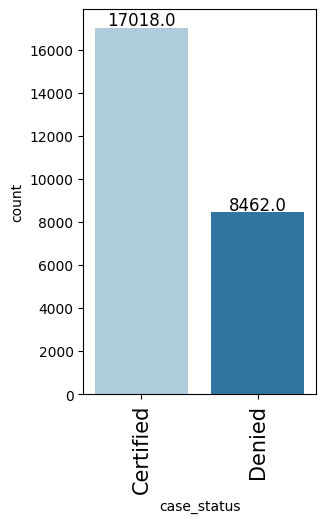

In [ ]:
labeled_barplot(data, "case_status")

* From 25480 candidates, 8462 were denied and 17018 were certified visas.

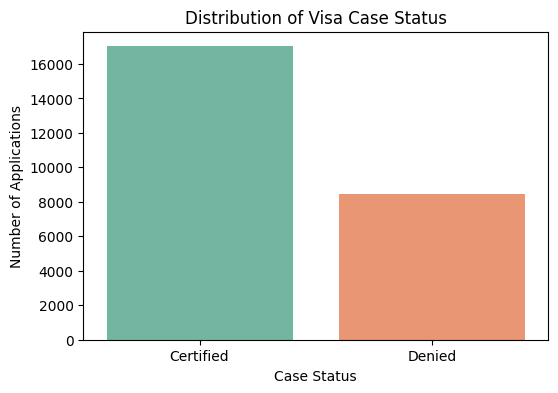

Certified   66.790
Denied      33.210
Name: case_status, dtype: float64

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='case_status', data=data, palette='Set2')
plt.title('Distribution of Visa Case Status')
plt.xlabel('Case Status')
plt.ylabel('Number of Applications')
plt.show()

# Show the percentage distribution
case_status_distribution = data['case_status'].value_counts(normalize=True) * 100
case_status_distribution

### Visa Case Status Distribution:

* Certified: 66.79%

* Denied: 33.21%

* Dataset is slightly imbalanced — more "Certified" cases than "Denied."

* We must handle this imbalance later during modeling (using SMOTE and Random Undersampling) to avoid bias.

#### Observations on education of employee

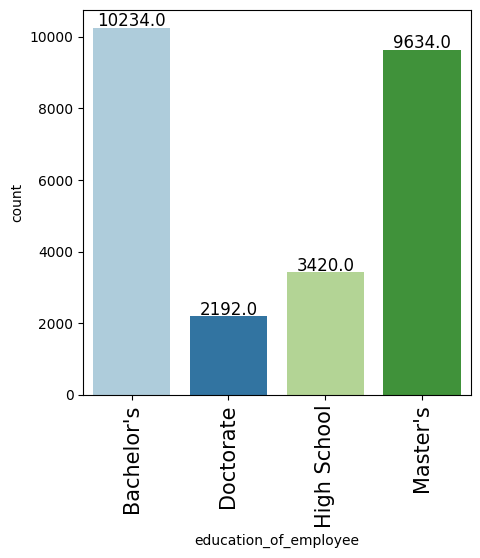

In [ ]:
labeled_barplot(data, "education_of_employee")

#### Education of Employee:	Most applicants have either a Bachelor’s (40%) or Master’s (38%) degree.

#### Observations on region of employment

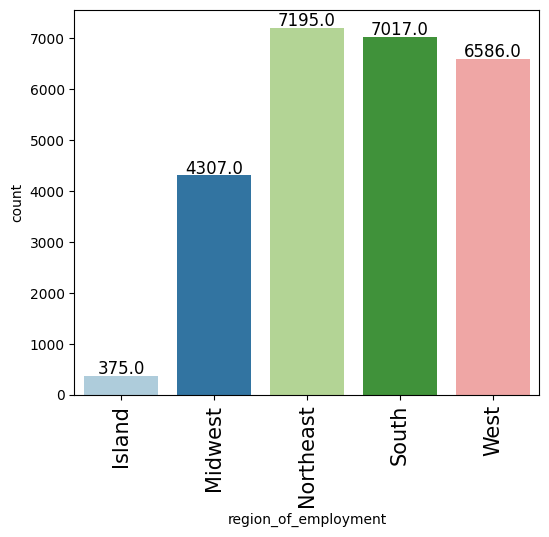

In [ ]:
labeled_barplot(data, "region_of_employment")

#### Northeast and South regions dominate the intended employment locations.

#### Observations on job experience

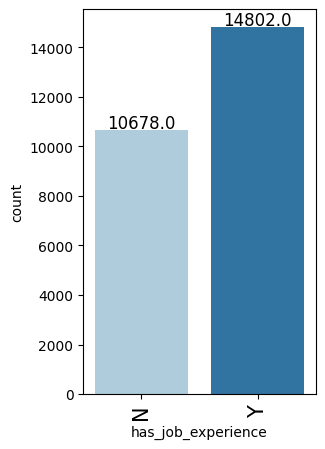

In [ ]:
labeled_barplot(data, "has_job_experience")

#### 58% of applicants have job experience (Y).

### Observation on year of establishment

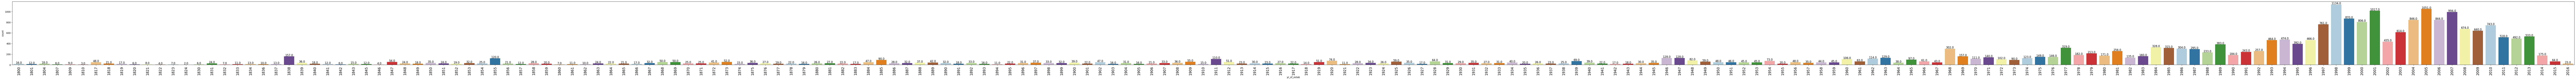

In [ ]:
labeled_barplot(data, "yr_of_estab")

In [ ]:
print(data['yr_of_estab'].value_counts())
print(data['yr_of_estab']. min())
print(data['yr_of_estab']. max())

1998    1134
2005    1051
2001    1017
2007     994
1999     870
        ... 
1842       6
1846       4
1822       4
1810       3
1824       2
Name: yr_of_estab, Length: 199, dtype: int64
1800
2016


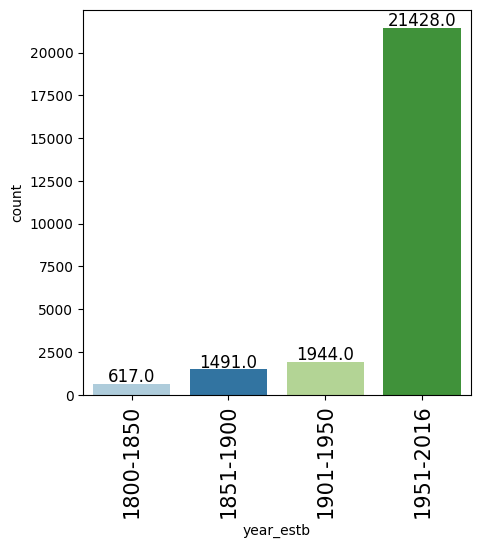

In [ ]:
# Define the bins and labels
bins = [1800, 1850, 1900, 1950, 2017]
labels = ['1800-1850', '1851-1900', '1901-1950', '1951-2016']

# Create the category column
data['year_estb'] = pd.cut(data['yr_of_estab'], bins=bins, labels=labels, right=False)
labeled_barplot(data, "year_estb")

#### Observation
* Plot shows that most of the employer's year of establishment is from 1950 to 2016.
* 84% of the visa applicants employers established between 1950 and 2016.
* Some companies are very old (1800s).

In [ ]:
data.drop(['year_estb'],axis=1,inplace=True)

#### Year of establishment of the employer's companies varies from 1800 till 2016
* Need to compare this data with the target visa approvals to determine any trend.
* Data is highly left skewed.

#### Observations on no_of_employees


### Number of Employees histogram without negative entires correction

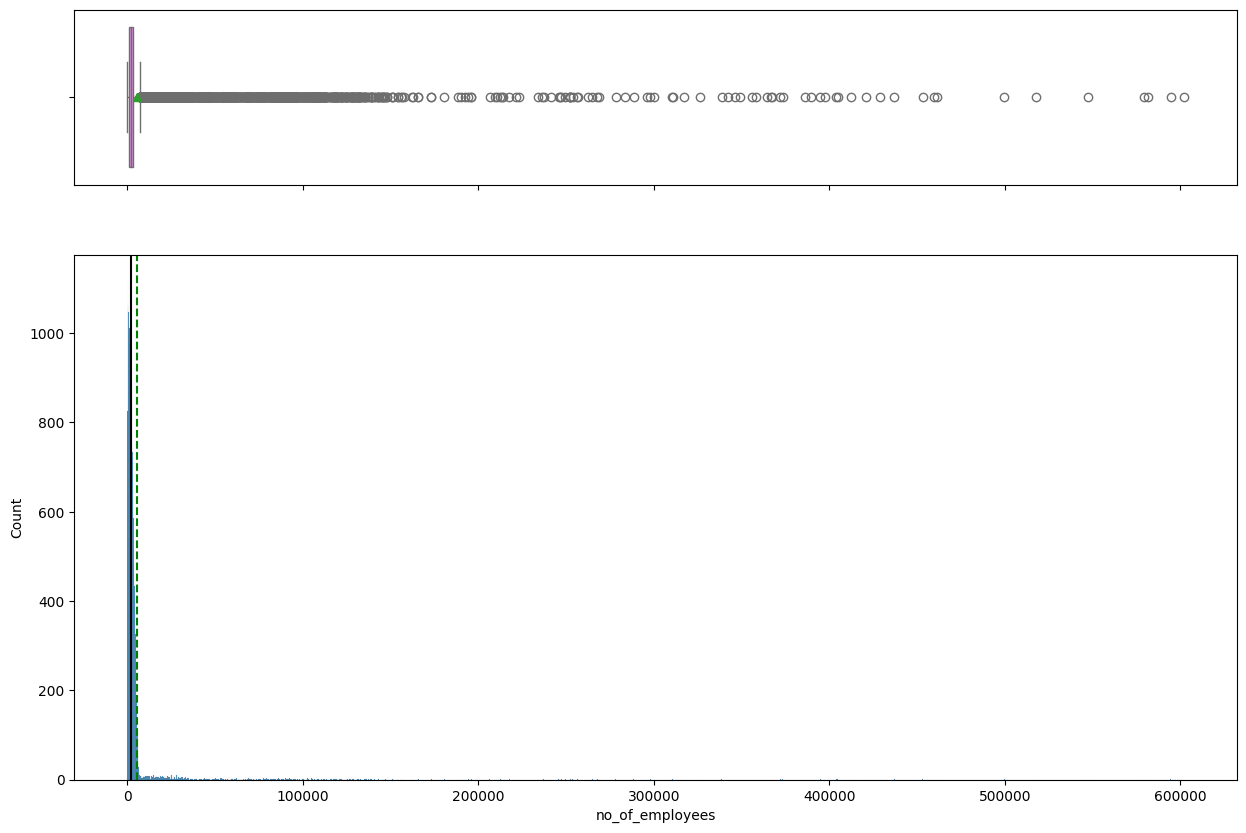

In [ ]:
histogram_boxplot(df, "no_of_employees")

#### Number of Employees histogram with negative entries corrected

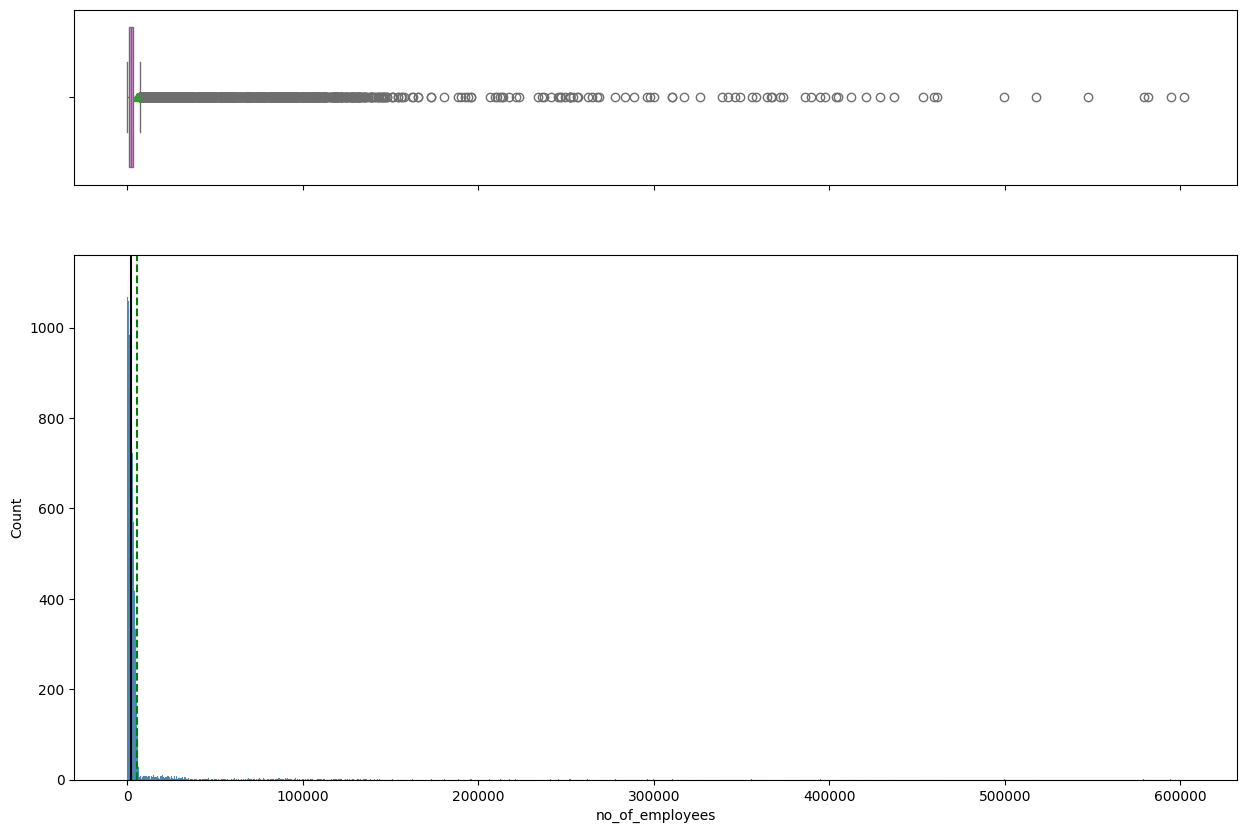

In [ ]:
histogram_boxplot(data, "no_of_employees")

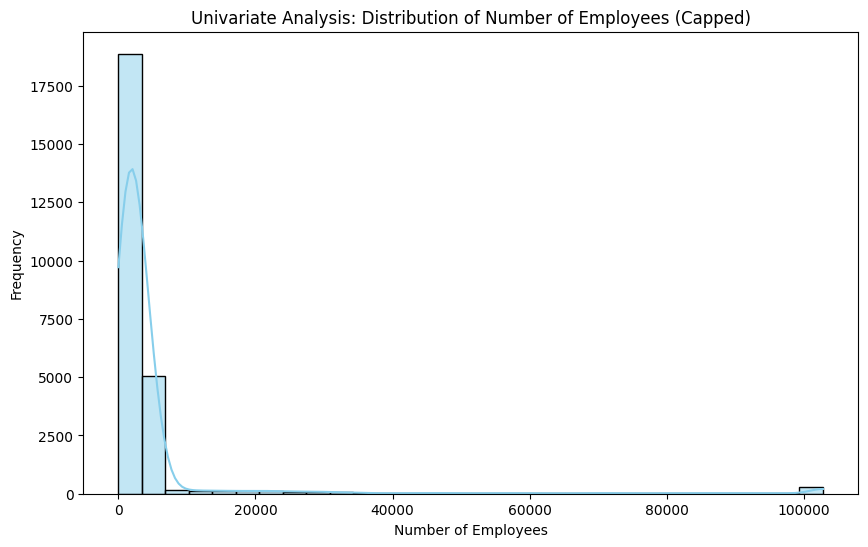

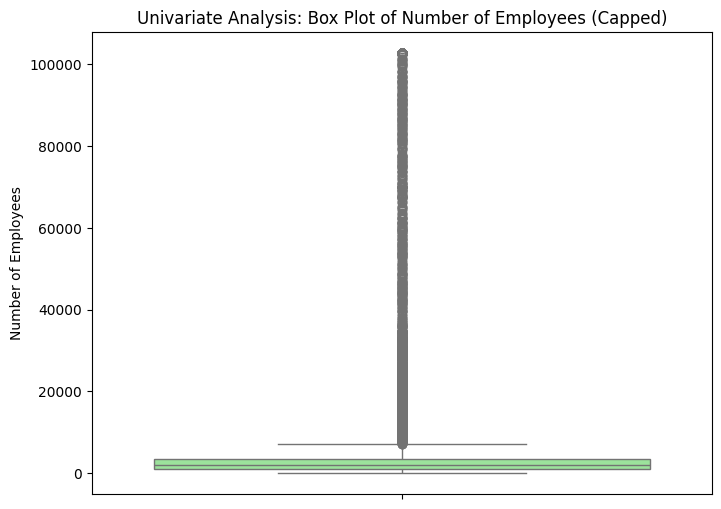

In [ ]:
# Cap outliers at 99th percentile for visualization
no_of_employees_cap = data['no_of_employees'].quantile(0.99)
data['no_of_employees_capped'] = data['no_of_employees'].clip(upper=no_of_employees_cap)

# Univariate Analysis
# 1. Histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['no_of_employees_capped'], kde=True, bins=30, color='skyblue')
plt.title('Univariate Analysis: Distribution of Number of Employees (Capped)')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['no_of_employees_capped'], color='lightgreen')
plt.title('Univariate Analysis: Box Plot of Number of Employees (Capped)')
plt.ylabel('Number of Employees')
plt.show()

* The histograms with negative values and without negative values are nearly identical, with the small negative tail (-25 to -11) shifting to the positive side (11 to 25).
* Large number of outliers.
* No significant change in the overall shape or skewness.
* Highly right-skewed distribution. Most companies have small to medium workforce. A few companies are very large (outliers: max = 602,069 employees). Some negative values exist (-26 employees), which is invalid and will need correction.

#### Observation on prevailing_wage

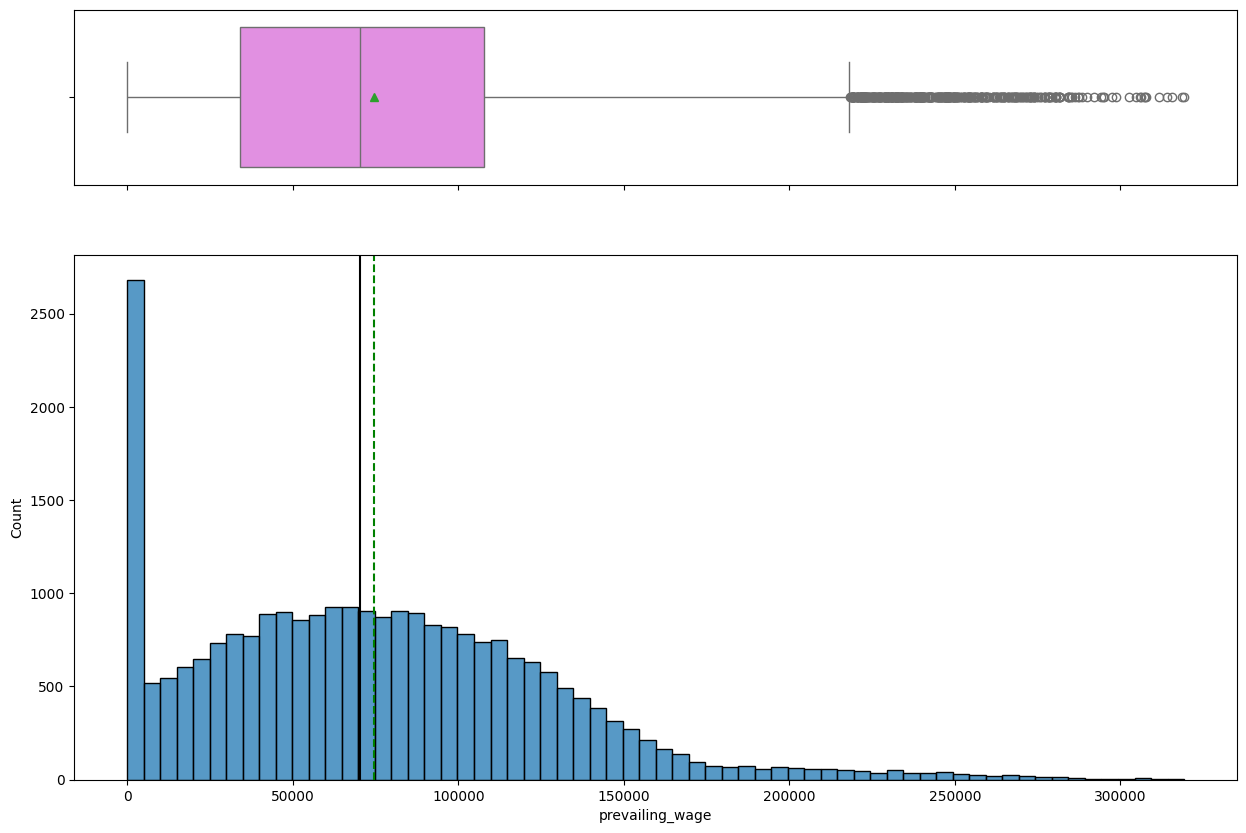

In [ ]:
histogram_boxplot(data, "prevailing_wage")

* Distribution is right-skewed. Average wage is \$74,456, but a few extremely high values (outliers: max \$319,210).

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


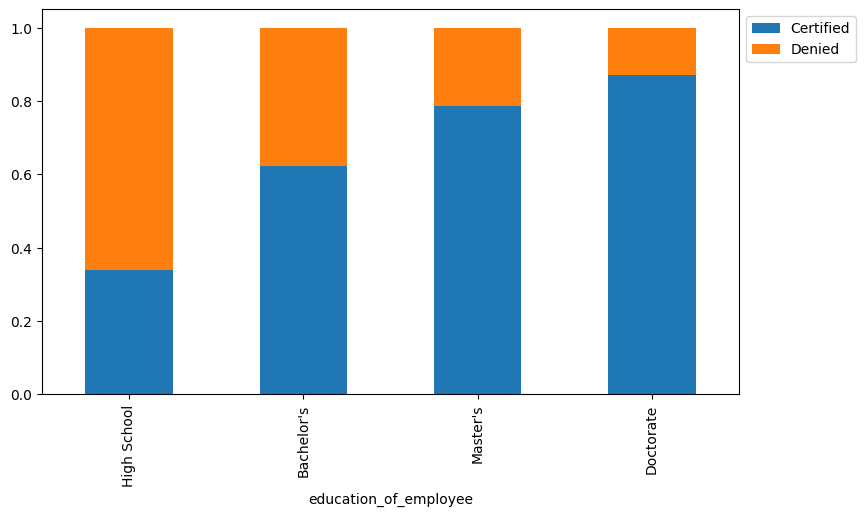

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

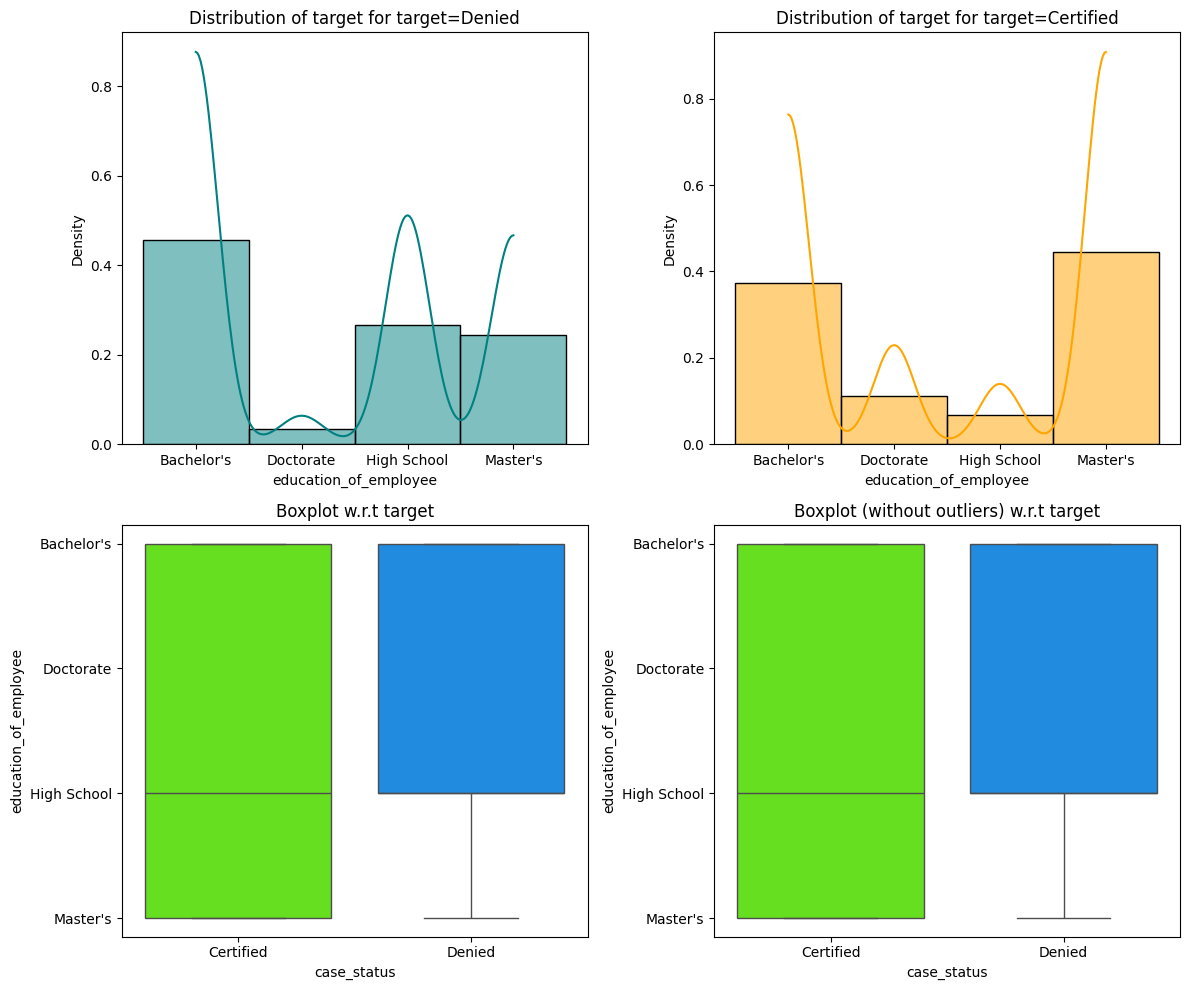

In [ ]:
distribution_plot_wrt_target(data, "education_of_employee", "case_status")

#### Higher education (Master’s and Doctorate) leads to more certifications compared to Bachelor's and High School.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


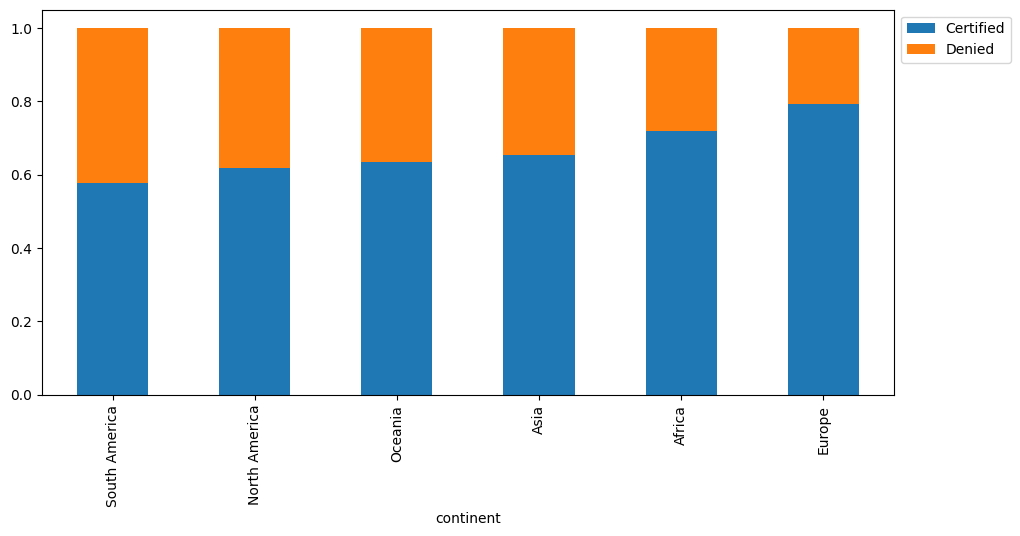

In [ ]:
stacked_barplot(data, "continent", "case_status")

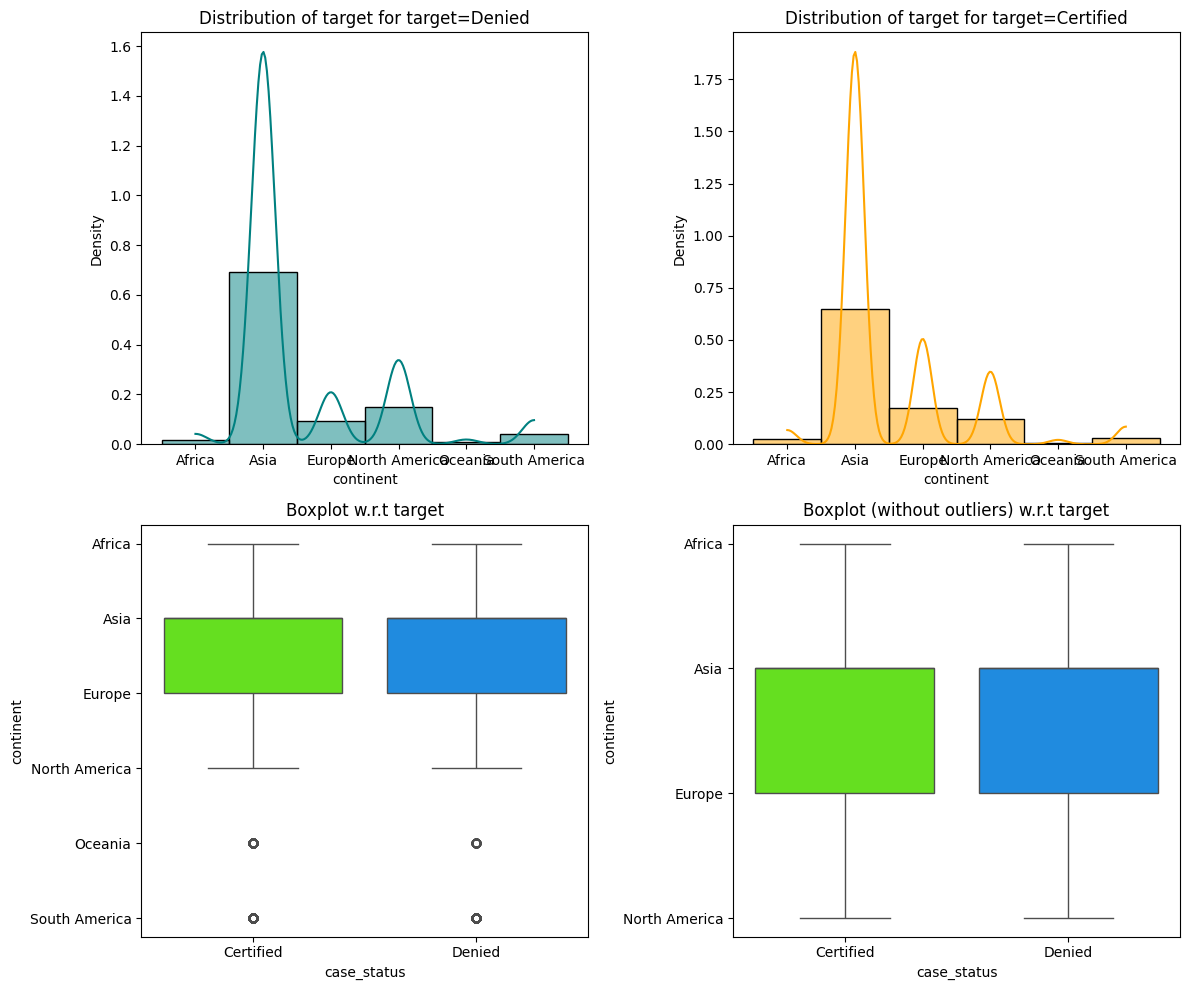

In [ ]:
distribution_plot_wrt_target(data, "continent", "case_status")

#### Applicants from Asia and North America have higher certification rates compared to Africa and South America.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


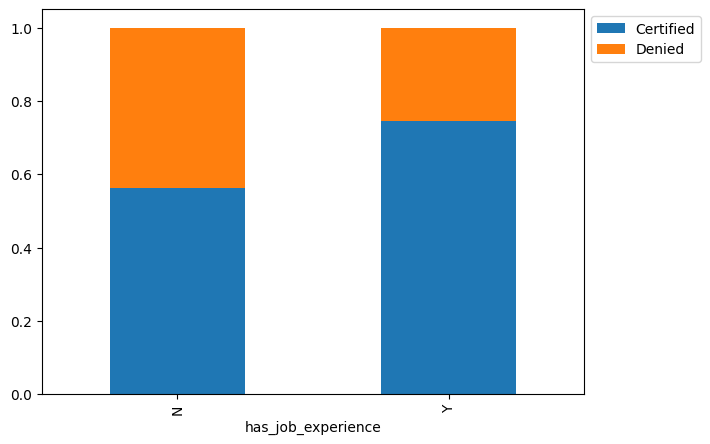

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

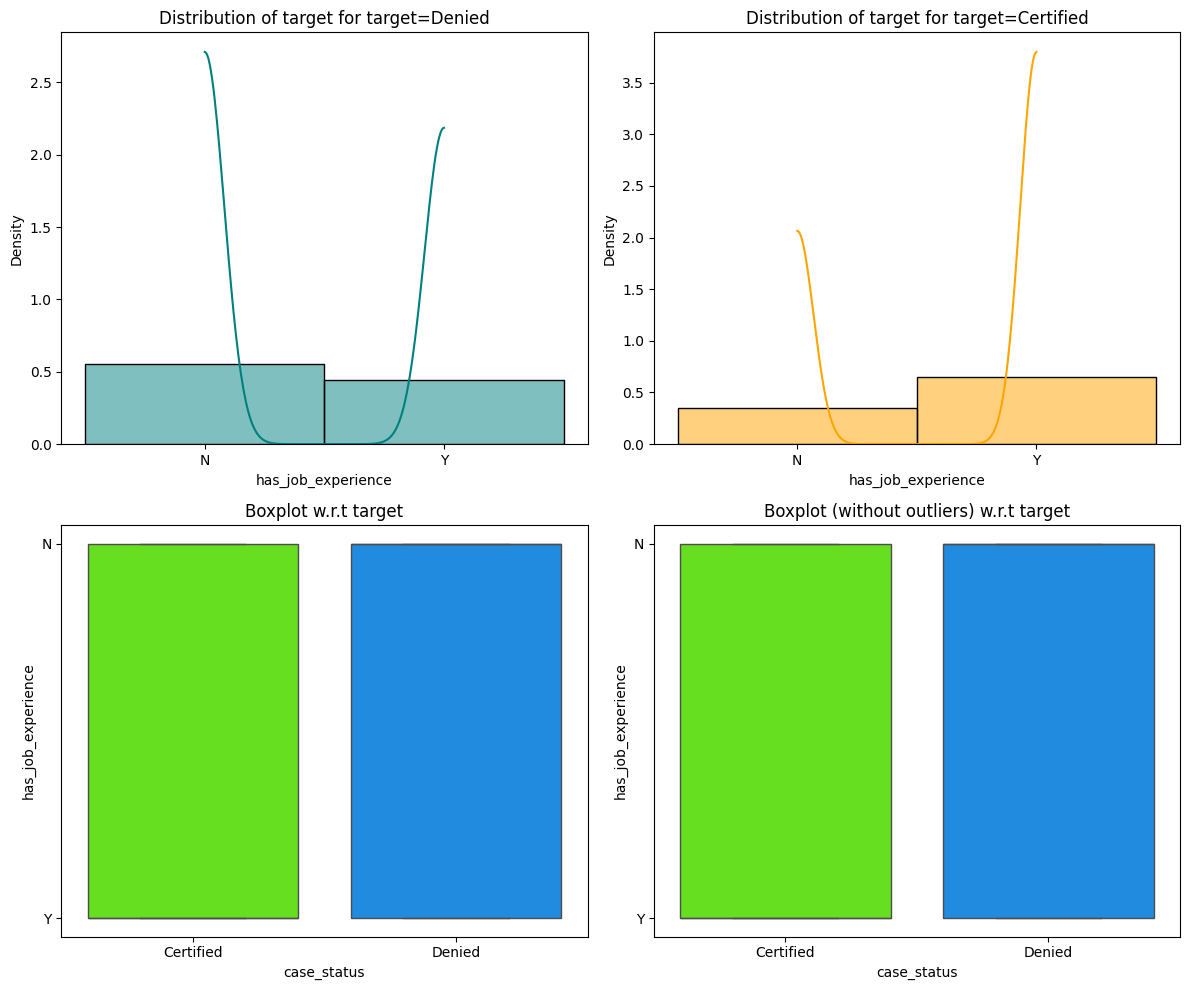

In [ ]:
distribution_plot_wrt_target(data, "has_job_experience", "case_status")

#### Having job experience (Y) significantly increases certification probability.

#### Checking if the prevailing wage is similar across all the regions of the US

In [ ]:
wage_by_region = data.groupby('region_of_employment')['prevailing_wage'].agg(['mean', 'median', 'std', 'count']).round(2)
print("\nDescriptive Statistics for prevailing_wage by region:")
print(wage_by_region)


Descriptive Statistics for prevailing_wage by region:
                          mean    median       std  count
region_of_employment                                     
Island               91712.750 90678.170 53836.060    375
Midwest              91696.740 89153.910 54561.010   4307
Northeast            67872.660 63276.510 51561.440   7195
South                74040.550 70191.520 52468.450   7017
West                 69832.630 64358.440 50638.410   6586


#### Interpretation:
* On comparing means and medians across regions. Midwest and Island has similar wage distributions while Northeast, South and West has similar wage distributions.
* However the standard deviations are approximately similar indicating similar wage distributions accross regions.
* Standard Deviation ranges from ~50,638 (West) to ~54,561 (Midwest), suggesting similar variability across regions.
* High standard deviations indicate significant wage spread within each region, likely due to outliers.
* The Island and Midwest regions have the highest mean and median wages (approx 90,000), while Northeast and West have the lowest ( approx 63,000 to 68,000). South falls in between (approx 70,000 to 74,000).
* The median is consistently lower than the mean, indicating a right-skewed distribution for prevailing_wage in all regions.
* Count:
  * Northeast (7,195) and South (7,017) have the most observations, followed by West (6,586) and Midwest (4,307). Island has the fewest (375), which may affect statistical reliability for this region.
  * The large sample sizes for most regions ensure robust statistical comparisons, but Island’s smaller sample warrants caution.

#### Initial Assessment of Similarity:
1. Range of Means: From 67,872.66 (Northeast) to 91,712.75 (Island), a difference of approx 23,840 (~35% of the lowest mean).
2. Range of Medians: From 63,276.51 (Northeast) to 90,678.17 (Island), a difference of approx 27,402 (~43% of the lowest median).
3. Practical Similarity: A difference of approx 20,000 to 25,000 in wages is substantial in practical terms, suggesting wages are not similar across all regions. Island and Midwest have notably higher wages, while Northeast and West are lower.
4. Statistical Similarity: The large differences in means/medians suggest potential statistical significance, but we need visualizations and tests to confirm.

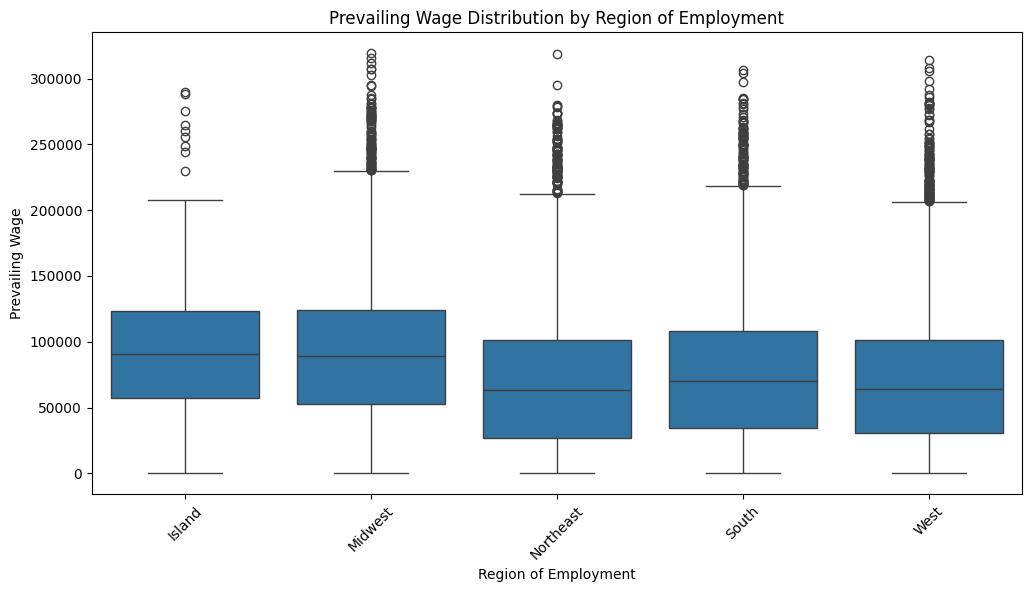

In [ ]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='region_of_employment', y='prevailing_wage', data=data)
plt.title('Prevailing Wage Distribution by Region of Employment')
plt.xlabel('Region of Employment')
plt.ylabel('Prevailing Wage')
plt.xticks(rotation=45)
plt.savefig('prevailing_wage_boxplot_by_region.png')
plt.show()

#### Observations from Boxplot:
* The median lines Island and Midwest are close while the median lines of Northeast, South and West are close.
* Overlapping interquartile ranges (IQRs) of Island and Midwest suggests similarity, while non-overlapping IQRs between Northeast, West compared to South indicate differences.
* Outliers in Island and Midwest are responsible for their higher means.

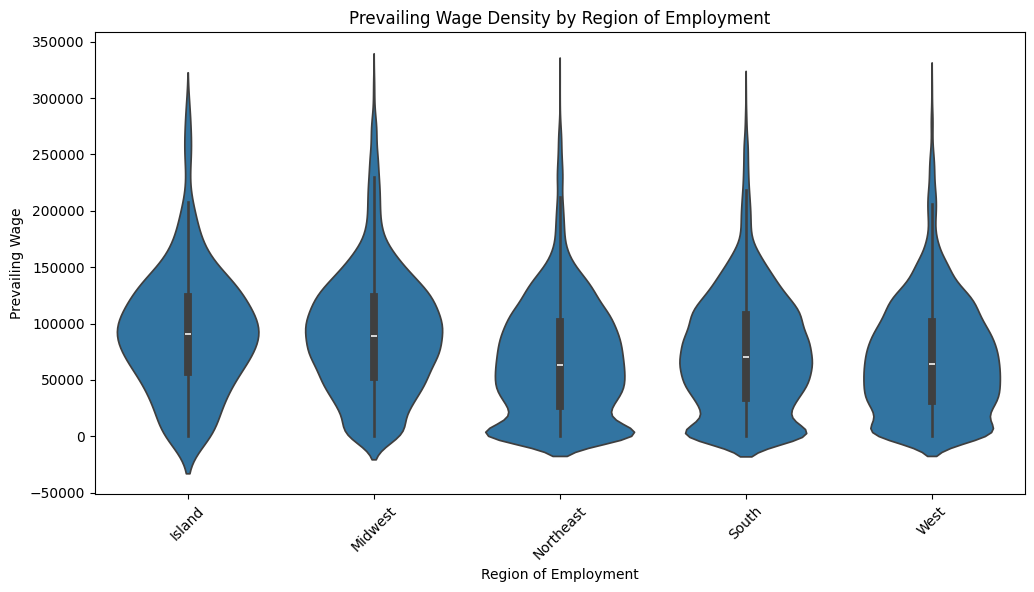

In [ ]:
# Violin Plot (to show density and distribution)
plt.figure(figsize=(12, 6))
sns.violinplot(x='region_of_employment', y='prevailing_wage', data=df)
plt.title('Prevailing Wage Density by Region of Employment')
plt.xlabel('Region of Employment')
plt.ylabel('Prevailing Wage')
plt.xticks(rotation=45)
plt.savefig('prevailing_wage_violinplot_by_region.png')
plt.show()

#### Observations from Violin Plot:
* Island and Midwest has similar shapes and widths across regions suggesting comparable distributions.
* Northeast, West and South shows similar shapes and comparable distributions.
* Thicker tails in Island/Midwest reflect higher wages or outliers.

#### Overall Observation:
* Island and Midwest have higher medians and more right-skewed distributions.
* Northeast and West show lower, tighter distributions.
* South’s intermediate position overlap with both groups.

* Island vs. Northeast: Significant difference
* Midwest vs. Northeast: Significant difference
* Northeast vs. South: not so significant difference
* Island vs. West: Significant difference
* South vs. West: not so significant difference

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

#### Let's first group the prevailing wage into Low, Medium and High wages

In [ ]:
# Categorize prevailing_wage into 3 categories
# Use pd.qcut to create 3 bins
data['wage_category'] = pd.qcut(data['prevailing_wage'], q=3, labels=['Low', 'Medium', 'High'])

# Print category boundaries and counts
print("Wage Category Boundaries and Counts:")
print(data.groupby('wage_category')['prevailing_wage'].agg(['min', 'max', 'count']))

Wage Category Boundaries and Counts:
                    min        max  count
wage_category                            
Low               2.137  46669.020   8494
Medium        46675.290  94376.970   8493
High          94382.750 319210.270   8493


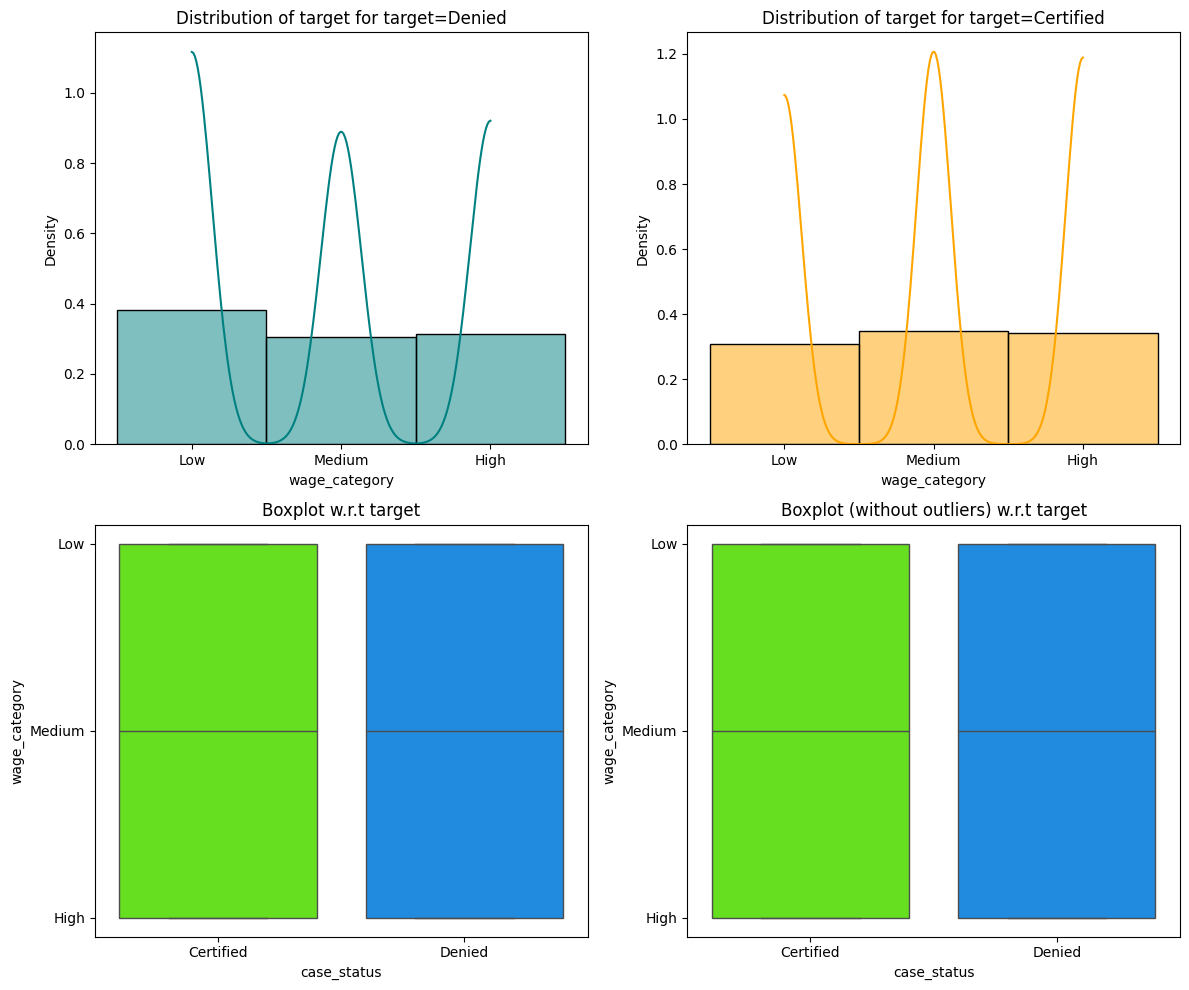

In [ ]:
distribution_plot_wrt_target(data, "wage_category", "case_status")

case_status    Certified  Denied    All
wage_category                          
All                17018    8462  25480
Low                 5266    3228   8494
High                5831    2662   8493
Medium              5921    2572   8493
------------------------------------------------------------------------------------------------------------------------


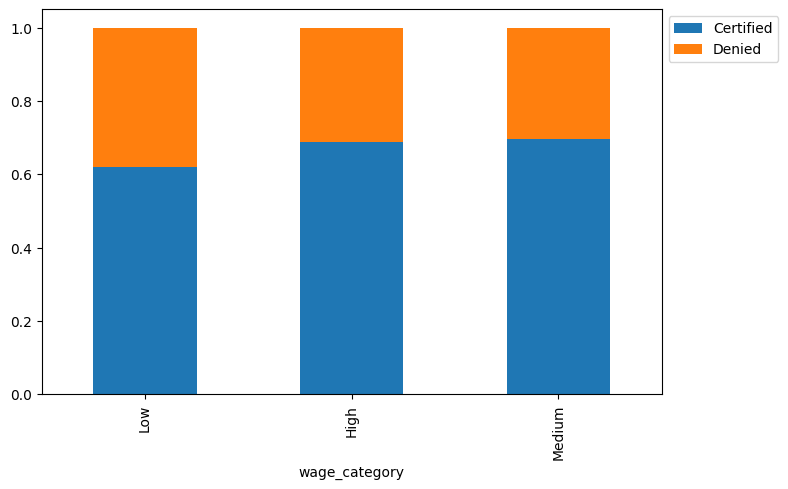

In [ ]:
stacked_barplot(data, "wage_category", "case_status")

* The above graph clearly shows that the three categories are mostly similar with average certified cases (5672) and average denials (2820).
* Low: Certified Proportion = 5,266 / 8,494 = 0.620 (62.0% Certified, 38.0% Denied). Low wages has lower approval rate and highest denial rate.
* Medium: Certified Proportion = 5,921 / 8,493 = 0.697 (69.7% Certified, 30.3% Denied). Has above average approval rate and lowest denial rate.
* High: Certified Proportion = 5,831 / 8,493 = 0.687 (68.7% Certified, 31.3% Denied). Has below average approval rate and average denial rate compared to overall statistics.
### Observation:
* Low Wages Increase Denial Risk
* Medium Wages Are Most Favorable
* High Wages Improve Approvals but Not Maximally, Possible reasons:
    * Beyond a certain wage threshold (e.g., >90,000), additional wage increases don’t significantly boost approvals, as other factors (e.g., education, job experience) dominate.
    * The High category includes extreme wages outliers (up to 319,210), which may be scrutinized more (e.g., for overpayment concerns or mismatch with job duties).
    * It may be due to regional wage impact, for example higher wages in Island and Midwest than West.  
* The difference between Low (62.0%) and Medium (69.7%) approval rates (7.7 points) is meaningful, suggesting wage levels significantly influence visa outcomes.
* We have introduced another feature "wage_category" into our data set. We need to remove this added feature to avoid redundency. As keeping prevailing_wage provide granularity for tree based models.  


In [ ]:
# Checking the dataset
data.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West          592.203   
1             2412         2002            Northeast        83425.650   
2            44444         2008                 West       122996.860   
3               98         1897                 West        83434.030   
4             1082         2005                South       149907.390   

  unit_of_wage full_time_position case_status  no_of_employees_capped  \
0         Hour                  Y      Denied                   14513   
1         Year                  Y   Certified                    2412   
2         Year                  Y      Denied                   44444   
3         Year                  Y      Denied                      98   
4         Year                  Y   Certified                    1082   

  wage_category  
0           Low  
1        Medium  
2          High  
3        Medium  
4          High

In [ ]:
# Copy dataset into another data frame
df_wage = data.copy()
# Drop wage_category feature we added
data.drop(['wage_category'],axis=1,inplace=True)
data.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West          592.203   
1             2412         2002            Northeast        83425.650   
2            44444         2008                 West       122996.860   
3               98         1897                 West        83434.030   
4             1082         2005                South       149907.390   

  unit_of_wage full_time_position case_status  no_of_employees_capped  
0         Hour                  Y      Denied                   14513  
1         Year                  Y   Certified                    2412  
2         Year                  Y      Denied                   44444  
3         Year                  Y      Denied                      98  
4         Year                  Y   Certified                    1082

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

## Correction: * prevailing_wage has no units in hourly, weekly, monthly and yearly * unit_of_wage has those units, lets find how it impact on visa approvals.

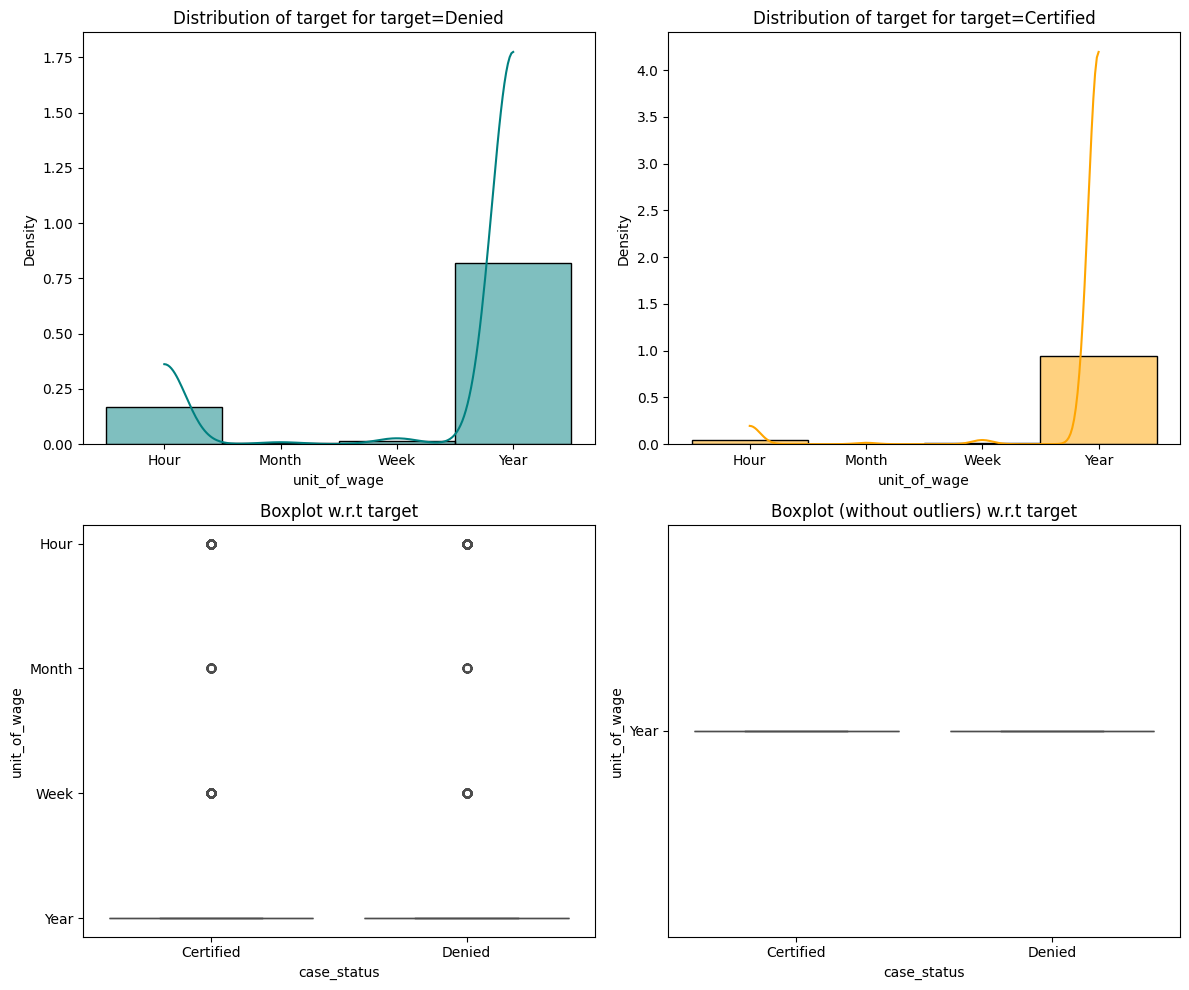

In [ ]:
distribution_plot_wrt_target(data, "unit_of_wage", "case_status")

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


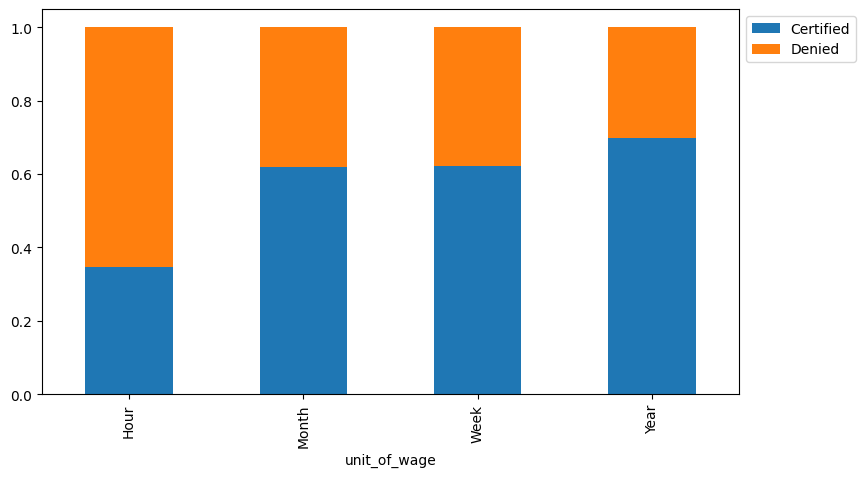

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

#### Observation:
* For yearly wage approx 70% cases were approved. Most favorable for visa approvals. likely due to stable, salaried positions aligning with Medium/High wage categories.
* For Hourly wage approx 65% of cases were rejected. Most unfavorable for visa decisions. likely because annualized wages fall in the Low category or reflect unstable roles
* For Monthly and weekly the approval rate is about 62%.
* Sample Size Imbalance:
    * Year dominates (90.1%), while Hour (8.5%), Week (1.1%), and Month (0.3%) are much smaller.
    * Small samples for Week and Month limit statistical reliability, but Hour’s larger sample (2,157) supports its findings.
* The results reveal a strong relationship between unit_of_wage and case_status, with significant implications for visa approval.

#### Target vs year of establishment

case_status  Certified  Denied    All
year_estb                            
All              17018    8462  25480
1951-2016        14330    7098  21428
1901-1950         1286     658   1944
1851-1900         1004     487   1491
1800-1850          398     219    617
------------------------------------------------------------------------------------------------------------------------


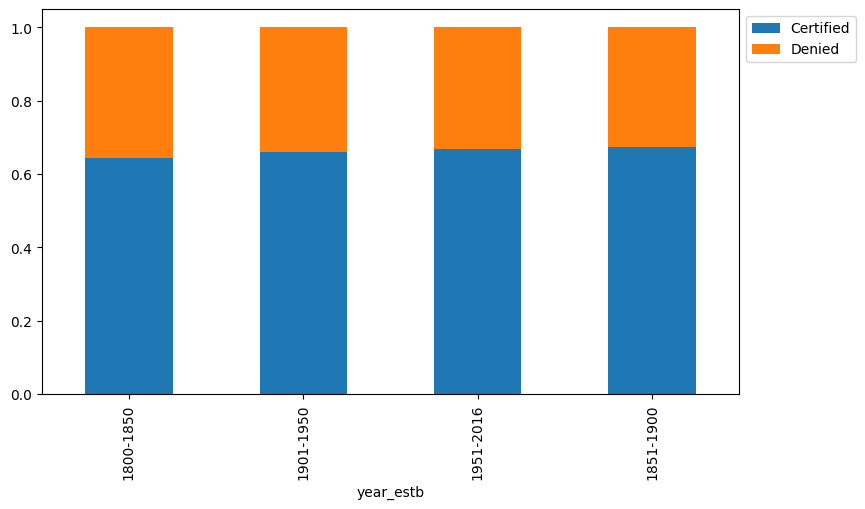

In [ ]:
# Define the bins and labels
bins = [1800, 1850, 1900, 1950, 2017]
labels = ['1800-1850', '1851-1900', '1901-1950', '1951-2016']

# Create the category column
data['year_estb'] = pd.cut(data['yr_of_estab'], bins=bins, labels=labels, right=False)

stacked_barplot(data, "year_estb", "case_status")

In [ ]:
data.drop(['year_estb'],axis=1,inplace=True)

#### Observation
* By dividing the year of establishments in logical spans of 50 years, we see there is no significant pattern and relationship between the year of establishment and the visa approvals.

### Number of Employees vs Visa Status and vs Prevailing wages

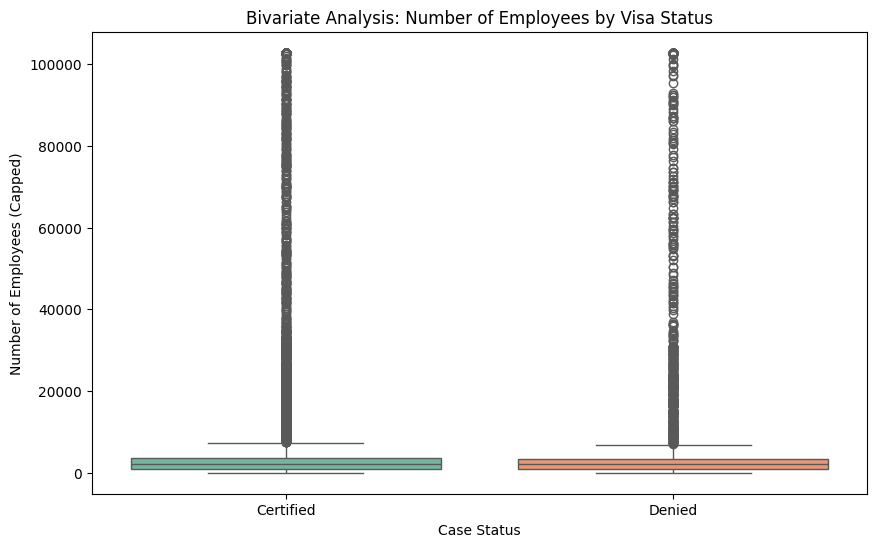

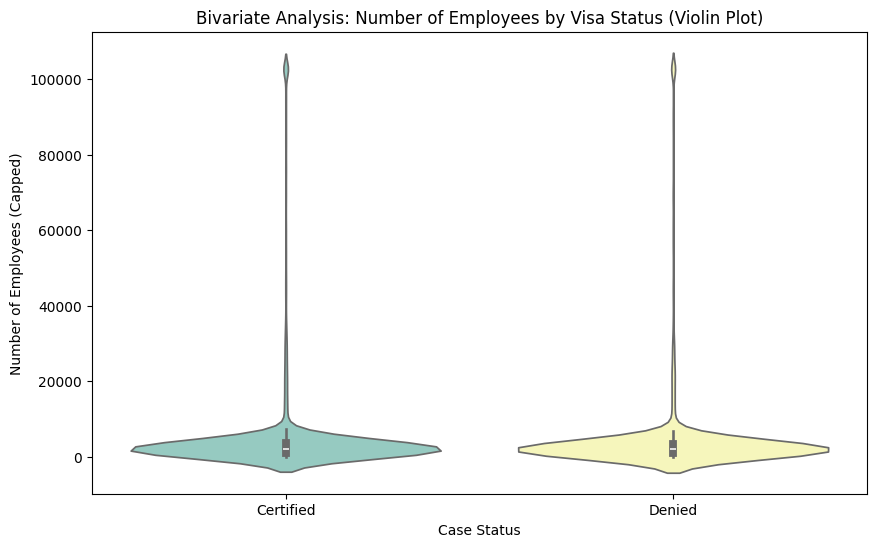

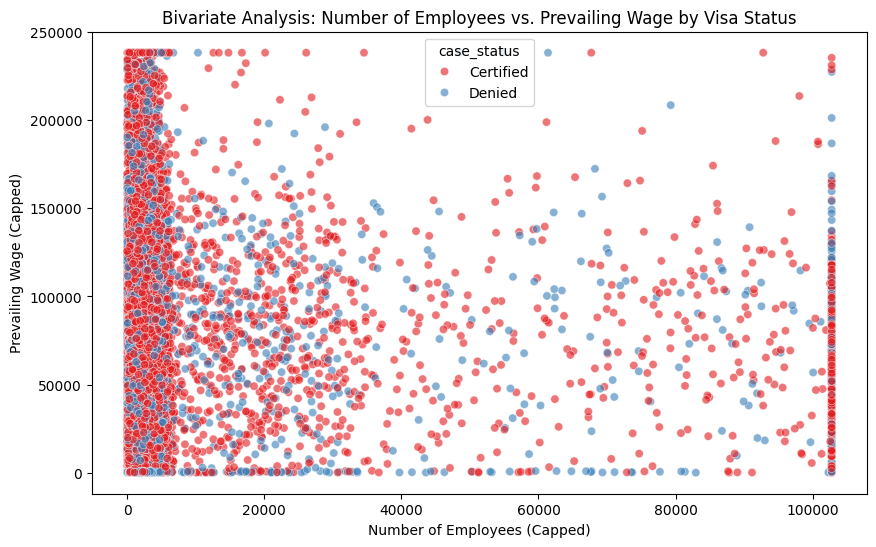

In [ ]:
# Box Plot by case_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='case_status', y='no_of_employees_capped', data=data, palette='Set2')
plt.title('Bivariate Analysis: Number of Employees by Visa Status')
plt.xlabel('Case Status')
plt.ylabel('Number of Employees (Capped)')
plt.show()

# Violin Plot by case_status
plt.figure(figsize=(10, 6))
sns.violinplot(x='case_status', y='no_of_employees_capped', data=data, palette='Set3')
plt.title('Bivariate Analysis: Number of Employees by Visa Status (Violin Plot)')
plt.xlabel('Case Status')
plt.ylabel('Number of Employees (Capped)')
plt.show()

# Scatter Plot with prevailing_wage
# Cap prevailing_wage for visualization
data['prevailing_wage_capped'] = data['prevailing_wage'].clip(upper=data['prevailing_wage'].quantile(0.99))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='no_of_employees_capped', y='prevailing_wage_capped', hue='case_status',
                data=data, alpha=0.6, palette='Set1')
plt.title('Bivariate Analysis: Number of Employees vs. Prevailing Wage by Visa Status')
plt.xlabel('Number of Employees (Capped)')
plt.ylabel('Prevailing Wage (Capped)')
plt.show()

* No signifiance was noted between the number of employees and visa approals
* Certified applications tend to be from companies with more employees (higher workforce size) compared to Denied applications.

#### Correlation Heat map for all numerical features compared to the target

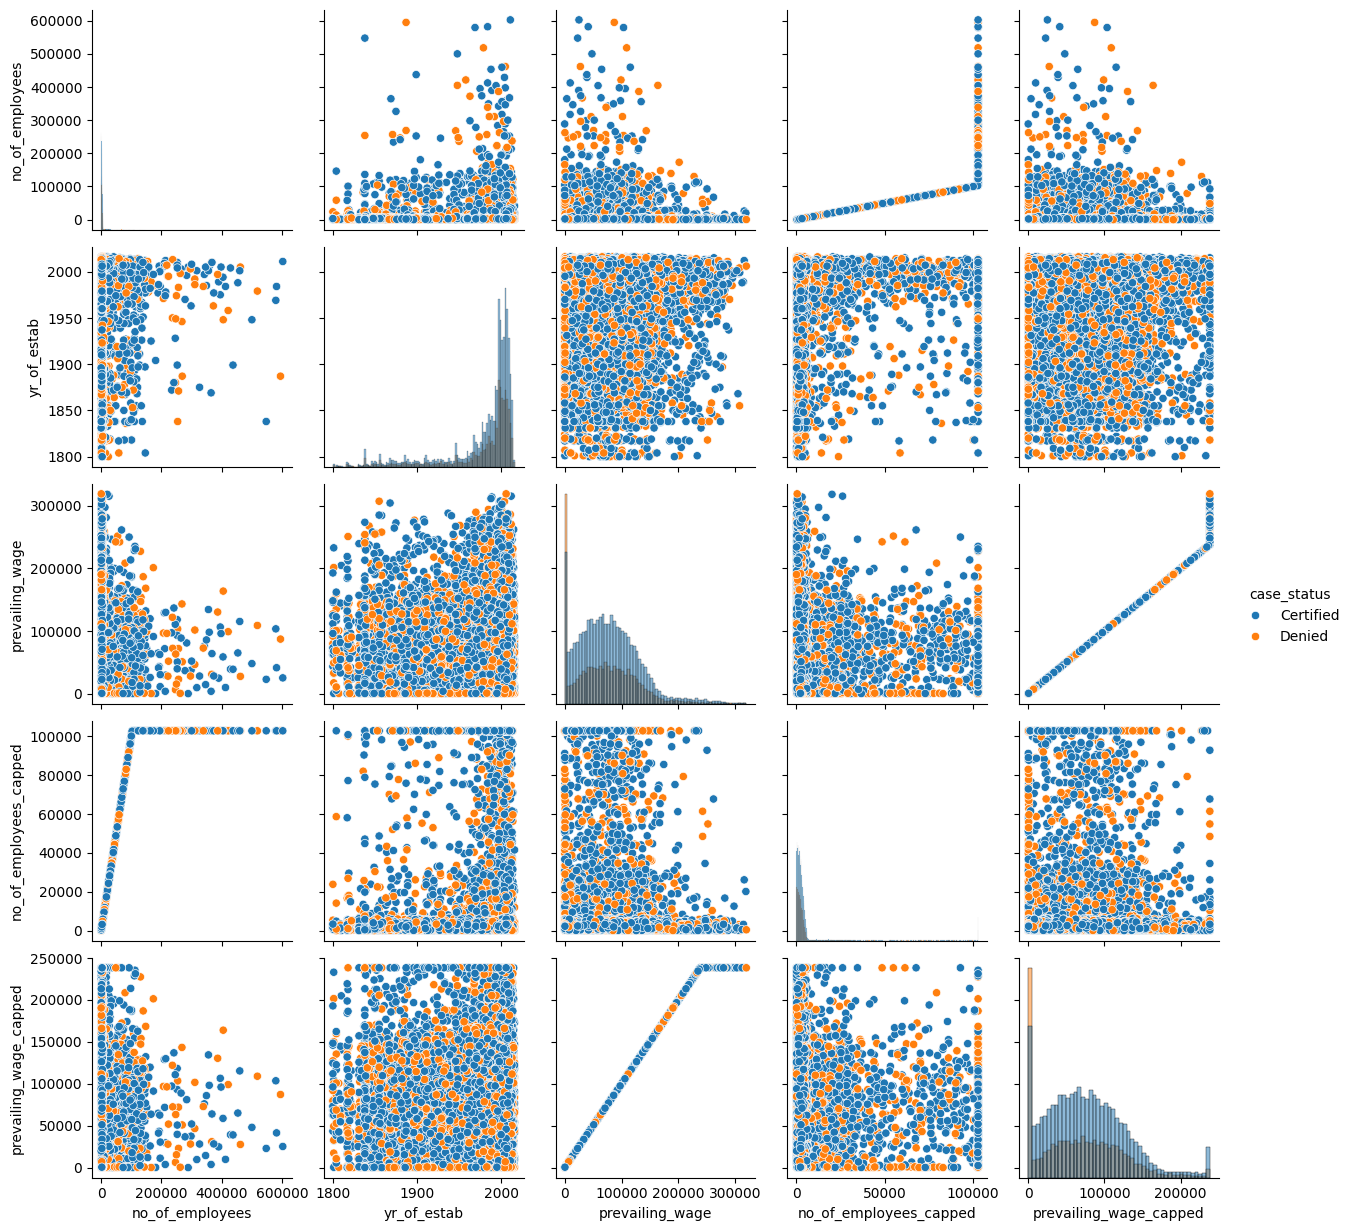

In [ ]:
sns.pairplot(data, hue = 'case_status' , diag_kind='hist')

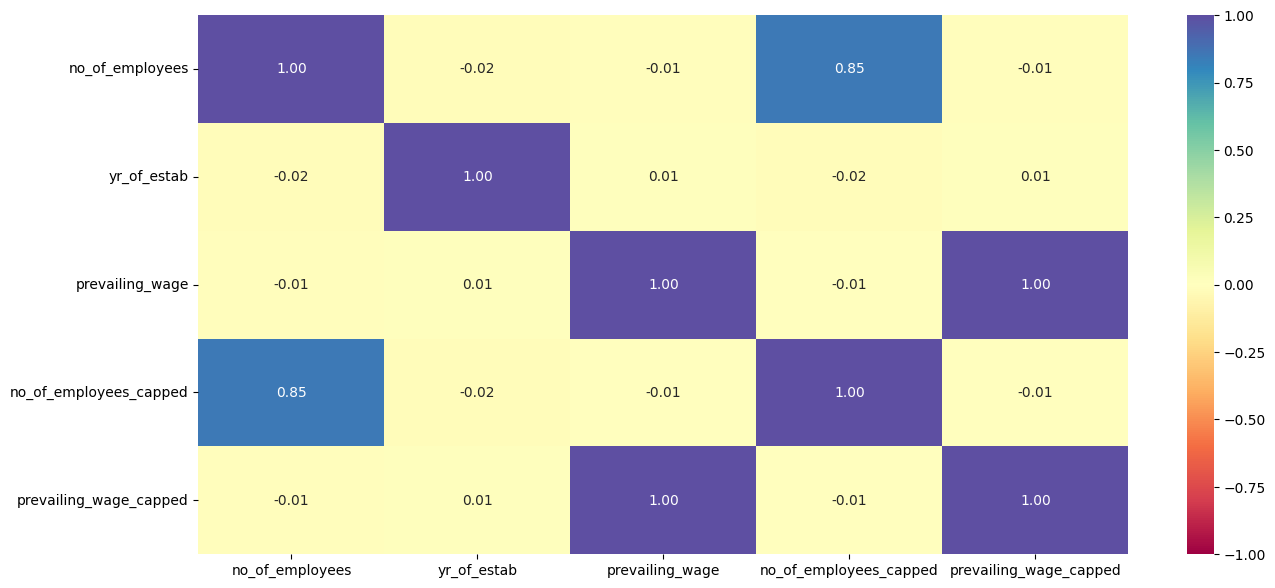

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
* These plots shows very weak correlations among the target and the numerical features.

# Key Observations:
- The dataset has no missing values.
- The target variable (case_status) is imbalanced, with more Certified cases than Denied.
- Applicants with higher education (Master's, Doctorate) and job experience tend to have higher certification rates.
- Prevailing wage varies significantly, with some extreme values indicating potential outliers.
- The West region has a higher denial rate compared to other regions.
- Hourly wages are associated with higher denial rates, possibly due to lower annual equivalent wages.

* Feature	Insights
* no_of_employees	Certified applications tend to be from companies with more employees (higher workforce size) compared to Denied applications.
* yr_of_estab	No strong visible trend between year of establishment and visa certification, but slightly newer companies seem to apply more.
* prevailing_wage	Certified applications tend to offer a higher wage compared to Denied ones. Wage clearly impacts visa success.
* Continent	Applicants from Asia and North America have higher certification rates compared to Africa and South America.
* Education of Employee	Higher education (Master’s and Doctorate) leads to more certifications compared to Bachelor's and High School.
* Has Job Experience	Having job experience (Y) significantly increases certification probability.
* Requires Job Training	Those NOT requiring job training (N) are certified much more often.
* Region of Employment	South and Northeast have higher certification rates than other regions.
* Unit of Wage	Applications with Yearly wage reports are more likely certified.
* Full Time Position	Full-time positions (Y) are more often certified compared to part-time ones.
   * Education, Experience, No Training Requirement, Full-Time Jobs, and Certain Locations (South/Northeast) strongly correlate with higher visa certification success.
* Outlier treatment is required for no_of_employees (invalid negative values) and possibly for prevailing_wage.
* Most companies are fairly new (established after 1975).
* no_of_employees	Highly right-skewed distribution. Most companies have small to medium workforce. A few companies are very large (outliers: max = 602,069 employees). Some negative values exist (-26 employees), which is invalid and will need correction.
* yr_of_estab	Most companies were established between 1976 and 2016. Some very old companies (1800s).
* prevailing_wage	Distribution is right-skewed. Average wage is ~$74,456, but a few extremely high values (outliers: max ~$319,210).

### Summary of Important Patterns from EDA:
      * Higher Education, Prior Job Experience, No Training Requirement, Full-Time Jobs, and Higher Prevailing Wage are key drivers for certification.
      * Asia is the major applicant continent, but North America also has a high success rate.
      * Handling Outliers (especially in no_of_employees and prevailing_wage) is necessary before modeling.
      * Class Imbalance exists and needs SMOTE or undersampling for fair model learning.

## Data Pre-processing
* Objective: Prepare the data for modeling by handling missing values, outliers, and encoding features.
* There are no missing values in our dataset, hence, no need to handle missing values.
* We have already taken care of negative vales of number of employees feature.
* We will now perform the following:
    
    * Finding an dremoving duplicates if any
    * Outlier treatment
    * Scaling and normalizing numerical features
    * Encoding categorical features
    * Feature selection or Dimensionality reduction if needed  

### Finding and Removing duplicates

In [ ]:
# Find full-row duplicates
full_duplicates = data.duplicated(keep='first').sum()
print(f"Number of Full-Row Duplicates: {full_duplicates}")

# Display full-row duplicates (if any)
if full_duplicates > 0:
    print("\nFull-Row Duplicates:")
    print(data[data.duplicated(keep=False)].sort_values(by=data.columns.tolist()))

Number of Full-Row Duplicates: 0


In [ ]:
# Find duplicates in columns
key_columns = [col for col in data.columns]  # All columns
key_duplicates = data.duplicated(subset=key_columns, keep='first').sum()
print(f"Number of Duplicates Based on Key Columns: {key_duplicates}")

# Display key-column duplicates (if any)
if key_duplicates > 0:
    print("\nKey-Column Duplicates:")
    print(data[data.duplicated(subset=key_columns, keep=False)][key_columns].sort_values(by=key_columns))

Number of Duplicates Based on Key Columns: 0


* No duplicates were found among rows or columns

### Outlier Check and treatment

In [ ]:
# Numerical Features: Outlier Detection and Treatment
numerical_features = ['prevailing_wage', 'no_of_employees', 'yr_of_estab']

# Detect outliers using IQR and percentiles
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature]
    p1 = data[feature].quantile(0.01)
    p99 = data[feature].quantile(0.99)
    outliers_p = data[(df[feature] < p1) | (data[feature] > p99)][feature]
    return outliers, outliers_p


Outliers in prevailing_wage:
IQR Method: 427 outliers
Percentile Method (1st/99th): 510 outliers


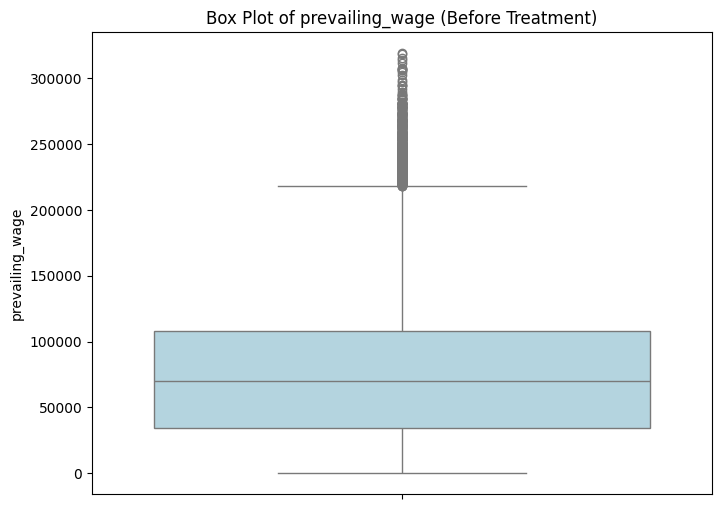


Outliers in no_of_employees:
IQR Method: 1556 outliers
Percentile Method (1st/99th): 509 outliers


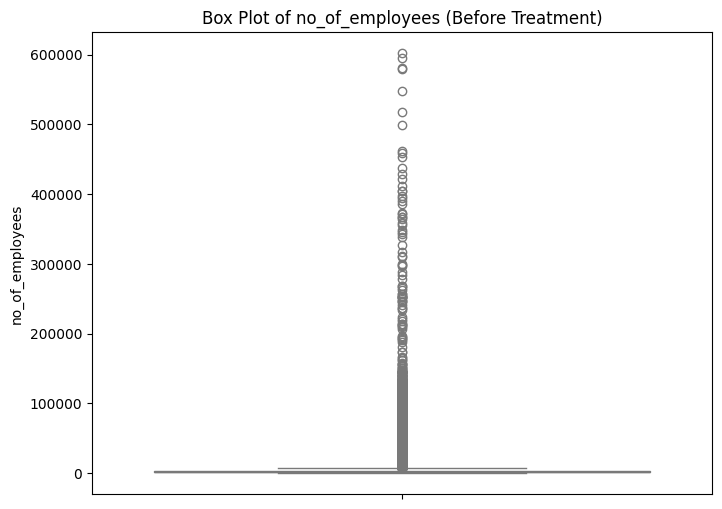


Outliers in yr_of_estab:
IQR Method: 3260 outliers
Percentile Method (1st/99th): 335 outliers


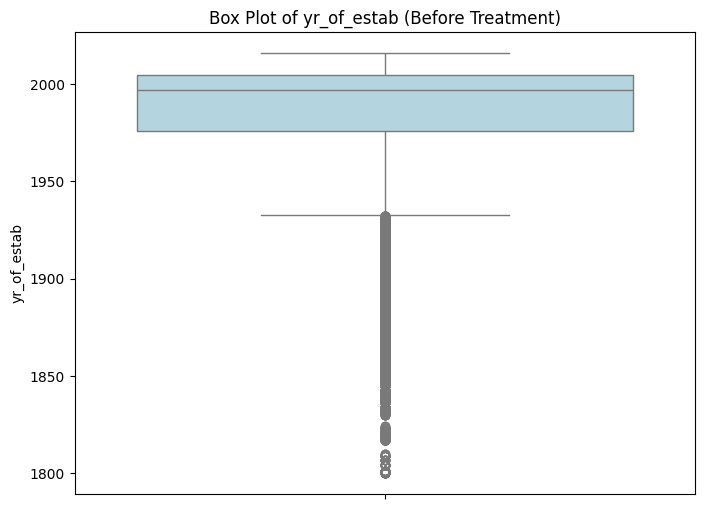

In [ ]:
# Print outlier counts and visualize
for feature in numerical_features:
    outliers_iqr, outliers_p = detect_outliers(data, feature)
    print(f"\nOutliers in {feature}:")
    print(f"IQR Method: {len(outliers_iqr)} outliers")
    print(f"Percentile Method (1st/99th): {len(outliers_p)} outliers")

    # Box Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[feature], color='lightblue')
    plt.title(f'Box Plot of {feature} (Before Treatment)')
    plt.ylabel(feature)
    plt.savefig(f'{feature}_boxplot_before.png')
    plt.show()

In [ ]:
# Treat outliers: Cap at 1st/99th percentiles
for feature in numerical_features:
    p1 = data[feature].quantile(0.01)
    p99 = data[feature].quantile(0.99)
    data[f'{feature}_capped'] = data[feature].clip(lower=p1, upper=p99)

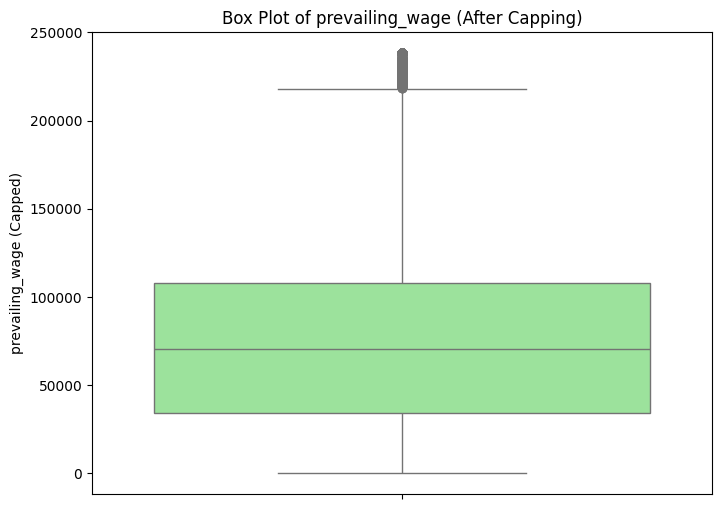

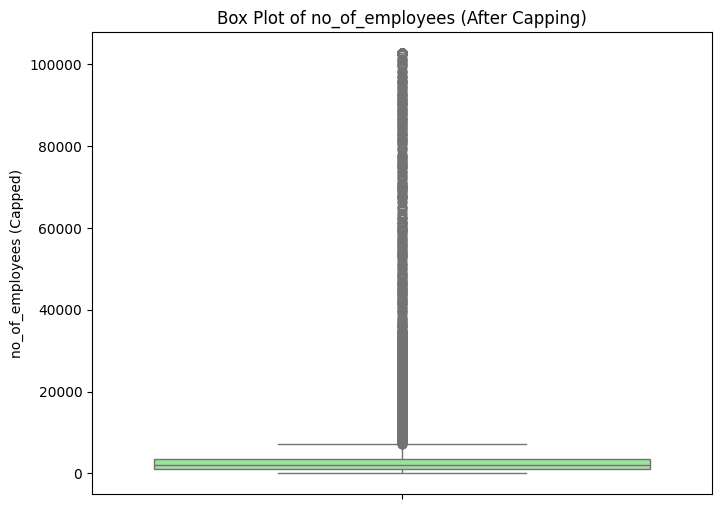

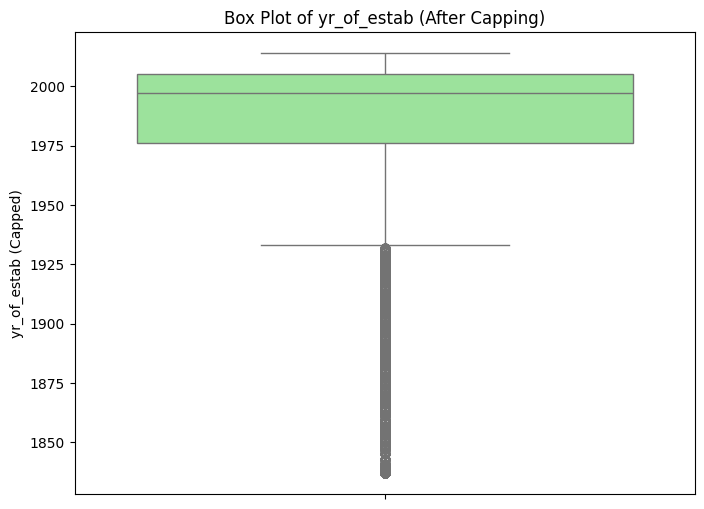

In [ ]:
# Visualize after treatment
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[f'{feature}_capped'], color='lightgreen')
    plt.title(f'Box Plot of {feature} (After Capping)')
    plt.ylabel(f'{feature} (Capped)')
    plt.savefig(f'{feature}_boxplot_after.png')
    plt.show()

In [ ]:
data.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West          592.203   
1             2412         2002            Northeast        83425.650   
2            44444         2008                 West       122996.860   
3               98         1897                 West        83434.030   
4             1082         2005                South       149907.390   

  unit_of_wage full_time_position case_status  no_of_employees_capped  \
0         Hour                  Y      Denied                   14513   
1         Year                  Y   Certified                    2412   
2         Year                  Y      Denied                   44444   
3         Year                  Y      Denied                      98   
4         Year                  Y   Certified                    1082   

   prevailing_wage_capped  yr_of_estab_capped  
0                 592.203                2007  
1               83425.650                2002  
2              122996.860                2008  
3               83434.030                1897  
4              149907.390                2005

In [ ]:
df_outliers = data.copy() # copying data with outlier treatment to test and compare later
data.drop(['prevailing_wage_capped', 'no_of_employees_capped', 'yr_of_estab_capped'],axis=1,inplace=True)
data.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West          592.203   
1             2412         2002            Northeast        83425.650   
2            44444         2008                 West       122996.860   
3               98         1897                 West        83434.030   
4             1082         2005                South       149907.390   

  unit_of_wage full_time_position case_status  
0         Hour                  Y      Denied  
1         Year                  Y   Certified  
2         Year                  Y      Denied  
3         Year                  Y      Denied  
4         Year                  Y   Certified

In [ ]:
data.describe()

no_of_employees  yr_of_estab  prevailing_wage
count        25480.000    25480.000        25480.000
mean          5667.089     1979.410        74455.815
std          22877.917       42.367        52815.942
min             11.000     1800.000            2.137
25%           1022.000     1976.000        34015.480
50%           2109.000     1997.000        70308.210
75%           3504.000     2005.000       107735.513
max         602069.000     2016.000       319210.270

In [ ]:
df_outliers.describe()

no_of_employees  yr_of_estab  prevailing_wage  no_of_employees_capped  \
count        25480.000    25480.000        25480.000               25480.000   
mean          5667.089     1979.410        74455.815                4866.702   
std          22877.917       42.367        52815.942               13646.046   
min             11.000     1800.000            2.137                  52.000   
25%           1022.000     1976.000        34015.480                1022.000   
50%           2109.000     1997.000        70308.210                2109.000   
75%           3504.000     2005.000       107735.513                3504.000   
max         602069.000     2016.000       319210.270              102767.000   

       prevailing_wage_capped  yr_of_estab_capped  
count               25480.000           25480.000  
mean                74225.934            1979.583  
std                 52013.285              41.709  
min                   106.047            1837.000  
25%                 34015.480            1976.000  
50%                 70308.210            1997.000  
75%                107735.513            2005.000  
max                238215.450            2014.000

In [ ]:
df_outliers = df_outliers.drop(['prevailing_wage', 'no_of_employees', 'yr_of_estab'],axis=1)
df_outliers.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

  region_of_employment unit_of_wage full_time_position case_status  \
0                 West         Hour                  Y      Denied   
1            Northeast         Year                  Y   Certified   
2                 West         Year                  Y      Denied   
3                 West         Year                  Y      Denied   
4                South         Year                  Y   Certified   

   no_of_employees_capped  prevailing_wage_capped  yr_of_estab_capped  
0                   14513                 592.203                2007  
1                    2412               83425.650                2002  
2                   44444              122996.860                2008  
3                      98               83434.030                1897  
4                    1082              149907.390                2005

### Scaling and Normalizing the numerical features

* Scaling or normalization is generally not necessary for tree-based models like decision trees, random forests, gradient boosting, AdaBoost, and XGBoost. These models are designed to work with raw data and are not affected by the magnitude of the features.

### Encoding Categorical Features using one hot encoding
* One hot encoding is less efficient when using ensemble techniques for classification problems.
* XGBoost however internally apply one hot coding to categorical data.

## Key Observations:
* No missing values.
* Imbalanced target variable (about 66.8% Certified).
* Higher education and job experience correlate with certification.
* West region and hourly wages are associated with higher denials ( about 65.4% for Hour).
* Prevailing wages differ significantly across regions (e.g., Island/Midwest about 90,000 vs. Northeast/West about 63,000 to 68,000).
* Medium prevailing_wage category (about 50,000 to 90,000) has the highest approval rate (69.7%), followed by High (68.7%), with Low (62.0%) having the highest denials.
* Yearly wages have the highest approval rate (69.9%), while hourly wages have the lowest (34.6%).
* No duplicates found in the dataset, ensuring data quality.
* no_of_employees is right-skewed (median about 2,000), with weak differentiation by case_status.
* Outliers in prevailing_wage and no_of_employees capped at 99th percentile.


### Data Preparation for modeling

* As there were no missing values, we didn't employ imputation on the dataset.
* So, we don't need to label encode and reverse the label encode mapping.

In [ ]:
# checking the distribution of the target variable on original dataset
data["case_status"].value_counts(1)

Certified   0.668
Denied      0.332
Name: case_status, dtype: float64

#### Original Data without outlier treatment

In [ ]:
# checking the distribution of the target variable on outlier treated dataset
df_outliers["case_status"].value_counts(1)

Certified   0.668
Denied      0.332
Name: case_status, dtype: float64

* Confirming that both datasets have esimilar imbalance distribution

In [ ]:
# Encoding the binary categorical values
data['case_status'] = data['case_status'].apply(lambda x : 1 if x=='Certified' else 0)
data['has_job_experience'] = data['has_job_experience'].apply(lambda x : 1 if x=='Y' else 0)
data['requires_job_training'] = data['requires_job_training'].apply(lambda x : 1 if x=='Y' else 0)

X = data.drop(['case_status'],axis=1)
y = data['case_status']

# X = pd.get_dummies(X,drop_first=True) # encoding categorical values

In [ ]:
data.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  0                     0   
1      Asia              Master's                  1                     0   
2      Asia            Bachelor's                  0                     1   
3      Asia            Bachelor's                  0                     0   
4    Africa              Master's                  1                     0   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West          592.203   
1             2412         2002            Northeast        83425.650   
2            44444         2008                 West       122996.860   
3               98         1897                 West        83434.030   
4             1082         2005                South       149907.390   

  unit_of_wage full_time_position case_status  
0         Hour                  Y           0  
1         Year                  Y           1  
2         Year                  Y           0  
3         Year                  Y           0  
4         Year                  Y           1

In [ ]:
X.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  0                     0   
1      Asia              Master's                  1                     0   
2      Asia            Bachelor's                  0                     1   
3      Asia            Bachelor's                  0                     0   
4    Africa              Master's                  1                     0   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West          592.203   
1             2412         2002            Northeast        83425.650   
2            44444         2008                 West       122996.860   
3               98         1897                 West        83434.030   
4             1082         2005                South       149907.390   

  unit_of_wage full_time_position  
0         Hour                  Y  
1         Year                  Y  
2         Year                  Y  
3         Year                  Y  
4         Year                  Y

In [ ]:
X.tail()

continent education_of_employee has_job_experience  \
25475      Asia            Bachelor's                  1   
25476      Asia           High School                  1   
25477      Asia              Master's                  1   
25478      Asia              Master's                  1   
25479      Asia            Bachelor's                  1   

      requires_job_training  no_of_employees  yr_of_estab  \
25475                     1             2601         2008   
25476                     0             3274         2006   
25477                     0             1121         1910   
25478                     1             1918         1887   
25479                     0             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  
25475                South        77092.570         Year                  Y  
25476            Northeast       279174.790         Year                  Y  
25477                South       146298.850         Year                  N  
25478                 West        86154.770         Year                  Y  
25479              Midwest        70876.910         Year                  Y

In [ ]:
X.shape

(25480, 10)

In [ ]:
data.shape

(25480, 11)

#### Outlier treated data

In [ ]:
# Encoding the binary categorical values
df_outliers['case_status'] = df_outliers['case_status'].apply(lambda x : 1 if x=='Certified' else 0)
df_outliers['has_job_experience'] = df_outliers['has_job_experience'].apply(lambda x : 1 if x=='Y' else 0)
df_outliers['requires_job_training'] = df_outliers['requires_job_training'].apply(lambda x : 1 if x=='Y' else 0)

X_outliers = df_outliers.drop(['case_status'],axis=1)
y_outliers = df_outliers['case_status']

# X_outliers = pd.get_dummies(X_outliers,drop_first=True) # encoding categorical values

In [ ]:
X_outliers.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  0                     0   
1      Asia              Master's                  1                     0   
2      Asia            Bachelor's                  0                     1   
3      Asia            Bachelor's                  0                     0   
4    Africa              Master's                  1                     0   

  region_of_employment unit_of_wage full_time_position  \
0                 West         Hour                  Y   
1            Northeast         Year                  Y   
2                 West         Year                  Y   
3                 West         Year                  Y   
4                South         Year                  Y   

   no_of_employees_capped  prevailing_wage_capped  yr_of_estab_capped  
0                   14513                 592.203                2007  
1                    2412               83425.650                2002  
2                   44444              122996.860                2008  
3                      98               83434.030                1897  
4                    1082              149907.390                2005

In [ ]:
X_outliers.tail()

continent education_of_employee has_job_experience  \
25475      Asia            Bachelor's                  1   
25476      Asia           High School                  1   
25477      Asia              Master's                  1   
25478      Asia              Master's                  1   
25479      Asia            Bachelor's                  1   

      requires_job_training region_of_employment unit_of_wage  \
25475                     1                South         Year   
25476                     0            Northeast         Year   
25477                     0                South         Year   
25478                     1                 West         Year   
25479                     0              Midwest         Year   

      full_time_position  no_of_employees_capped  prevailing_wage_capped  \
25475                  Y                    2601               77092.570   
25476                  Y                    3274              238215.450   
25477                  N                    1121              146298.850   
25478                  Y                    1918               86154.770   
25479                  Y                    3195               70876.910   

       yr_of_estab_capped  
25475                2008  
25476                2006  
25477                1910  
25478                1887  
25479                1960

In [ ]:
X_outliers.shape

(25480, 10)

In [ ]:
df_outliers.describe()

no_of_employees_capped  prevailing_wage_capped  yr_of_estab_capped
count               25480.000               25480.000           25480.000
mean                 4866.702               74225.934            1979.583
std                 13646.046               52013.285              41.709
min                    52.000                 106.047            1837.000
25%                  1022.000               34015.480            1976.000
50%                  2109.000               70308.210            1997.000
75%                  3504.000              107735.513            2005.000
max                102767.000              238215.450            2014.000

#### Haven't done one hot encoding yet, to avoid Data Leakage
* Dummy vairables will be created after spliting X into Train, Validation and Test datsets.

### Model Preparation on Original Data

## Spliting Dataset and applying encoding after split to prevent Data Leakage

In [ ]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and train
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# One Hot Encoding on splited data to avoid Data Leakage
X_train = pd.get_dummies(X_train,drop_first=True) # encoding categorical values

# then we split the temporary set into test and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

# One Hot Encoding on splited data to avoid Data Leakage
X_val = pd.get_dummies(X_val,drop_first=True) # encoding categorical values
X_test = pd.get_dummies(X_test,drop_first=True) # encoding categorical values

print(X_train.shape, X_val.shape, X_test.shape)

(12740, 21) (7644, 21) (5096, 21)


In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
1   0.668
0   0.332
Name: case_status, dtype: float64
********************************************************************************
Target value ratio in y_train
1   0.668
0   0.332
Name: case_status, dtype: float64
********************************************************************************
Target value ratio in y_val
1   0.668
0   0.332
Name: case_status, dtype: float64
********************************************************************************
Target value ratio in y_test
1   0.668
0   0.332
Name: case_status, dtype: float64
********************************************************************************


### Model Preparation on Outlier treated dataset

## Spliting Dataset and applying encoding after split to prevent Data Leakage

In [ ]:
# Splitting outlier treated data into training, validation and test set:

# first we split data into 2 parts, say temporary and train
X_outtrain, X_outtemp, y_outtrain, y_outtemp = train_test_split(
    X_outliers, y_outliers, test_size=0.5, random_state=0, stratify=y
)

# One Hot Encoding on splited data to avoid Data Leakage
X_outtrain = pd.get_dummies(X_outtrain,drop_first=True) # encoding categorical values

# then we split the temporary set into test and validation
X_outval, X_outtest, y_outval, y_outtest = train_test_split(
    X_outtemp, y_outtemp, test_size=0.4, random_state=0, stratify=y_temp
)

# One Hot Encoding on splited data to avoid Data Leakage
X_outval = pd.get_dummies(X_outval,drop_first=True) # encoding categorical values
X_outtest = pd.get_dummies(X_outtest,drop_first=True) # encoding categorical values
print(X_outtrain.shape, X_outval.shape, X_outtest.shape)

(12740, 21) (7644, 21) (5096, 21)


In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y_outliers")
print(y_outliers.value_counts(1))
print("*" * 80)
print("Target value ratio in y_outtrain")
print(y_outtrain.value_counts(1))
print("*" * 80)
print("Target value ratio in y_outval")
print(y_outval.value_counts(1))
print("*" * 80)
print("Target value ratio in y_outtest")
print(y_outtest.value_counts(1))
print("*" * 80)

Target value ratio in y_outliers
1   0.668
0   0.332
Name: case_status, dtype: float64
********************************************************************************
Target value ratio in y_outtrain
1   0.668
0   0.332
Name: case_status, dtype: float64
********************************************************************************
Target value ratio in y_outval
1   0.668
0   0.332
Name: case_status, dtype: float64
********************************************************************************
Target value ratio in y_outtest
1   0.668
0   0.332
Name: case_status, dtype: float64
********************************************************************************


# Metric Selection:

* **What does Office of Foreign Labor Certification (OFLC) want for their visa processing?**

    * The primary goal is to maximize the identification of approvable visa applications (Certified cases) to ensure qualified applicants are not denied, minimizing false negatives.
    * False negatives (predicting Denied when actually Certified) have high costs:
      * Applicants: Lose job opportunities, impacting livelihoods.
      * Employers: Face delays or inability to hire needed talent.
      * OFLC: Risks legal challenges or inefficiencies if qualified applicants are rejected.
    * False positives (predicting Certified when actually Denied) are less costly, as they lead to further review rather than immediate rejection.

* High **Recall** ensures most approvable applications are identified, aligning with the goal of minimizing false negatives. Recall is the best metric, as it aligns with the business objective of minimizing false negatives, ensuring qualified applicants are approved, and supports the OFLC’s efficiency and fairness goals.


## Model Building
* Objective: Build and evaluate six classification models on the original, outlier treated, Oversampled and Undersampled dataset.

## Models:

* Decision Tree
* Random Forest
* Bagging- (with Logistic Regression as base estimator)
* AdaBoost
* Gradient Boost
* XGBoost

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

# Model building with Original Dataset

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging_orig", BaggingClassifier(estimator=LogisticRegression(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest_orig", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM_orig", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost_orig", AdaBoostClassifier(random_state=1)))
models.append(("dtree_orig", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost_orig",
               XGBClassifier(n_estimators=100,  # Number of boosting rounds
               max_depth=3,       # Depth of each tree
               learning_rate=0.1, # Step size shrinkage
               objective='binary:logistic',  # For binary classification
               random_state=42)))

print("\nTraining Performance on Original Dataset:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance on Original Dataset:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance on Original Dataset:

Bagging_orig: 0.7038429897755318
Random forest_orig: 1.0
GBM_orig: 0.8749559290163357
Adaboost_orig: 0.8869432365730403
dtree_orig: 1.0
XGBoost_orig: 0.8734281349159714

Validation Performance on Original Dataset:

Bagging_orig: 0.7175318315377082
Random forest_orig: 0.8485798237022527
GBM_orig: 0.8791380999020568
Adaboost_orig: 0.8961802154750245
dtree_orig: 0.756513222331048
XGBoost_orig: 0.8789422135161606


In [ ]:
print("\nTraining and Validation Performance Difference on Original Dataset:\n")

# Initialize lists to store results
results_orig = []

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    results_orig.append({
        "Model": name,
        "Training Recall": scores_train,
        "Validation Recall":scores_val,
        "Difference": difference1,
        "Absolute Difference": abs(difference1)
    })
    #print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))

# Convert results to DataFrame
results_origdf = pd.DataFrame(results_orig)
print(results_origdf)


Training and Validation Performance Difference on Original Dataset:

                Model  Training Recall  Validation Recall  Difference  \
0        Bagging_orig            0.704              0.718      -0.014   
1  Random forest_orig            1.000              0.849       0.151   
2            GBM_orig            0.875              0.879      -0.004   
3       Adaboost_orig            0.887              0.896      -0.009   
4          dtree_orig            1.000              0.757       0.243   
5        XGBoost_orig            0.873              0.879      -0.006   

   Absolute Difference  
0                0.014  
1                0.151  
2                0.004  
3                0.009  
4                0.243  
5                0.006  


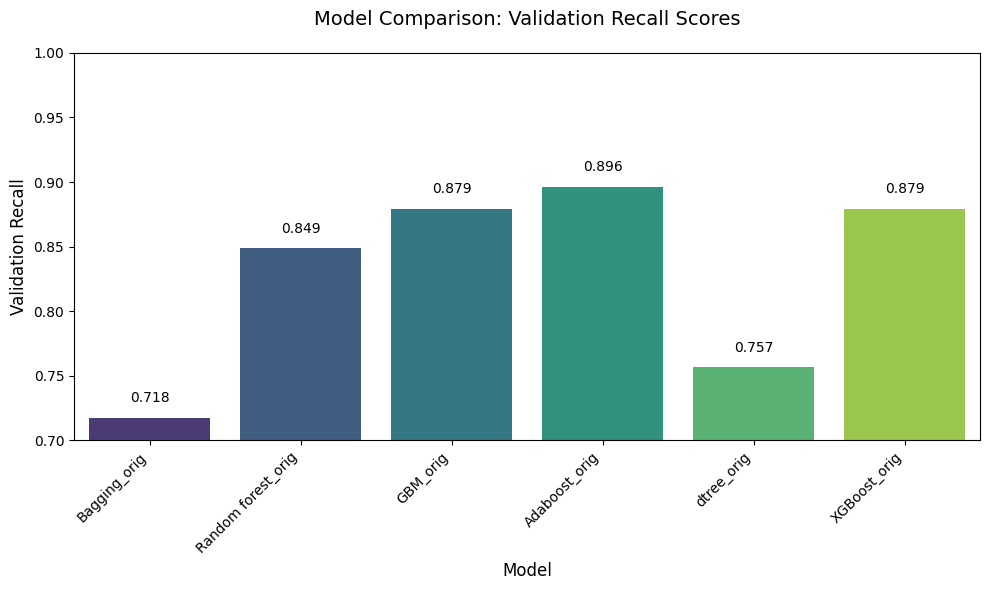

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=results_origdf,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(results_origdf['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
# Determining 3 best models
# Sort by smallest absolute difference and select top 3
top_3_orig = results_origdf.sort_values(by="Validation Recall").tail(3).reset_index(drop=True)

# Display the results
print("Top 3 Models with best Validation Recall scores on Original Dataset:")
print(top_3_orig[["Model", "Training Recall", "Validation Recall", "Difference"]])

Top 3 Models with best Validation Recall scores on Original Dataset:
           Model  Training Recall  Validation Recall  Difference
0   XGBoost_orig            0.873              0.879      -0.006
1       GBM_orig            0.875              0.879      -0.004
2  Adaboost_orig            0.887              0.896      -0.009


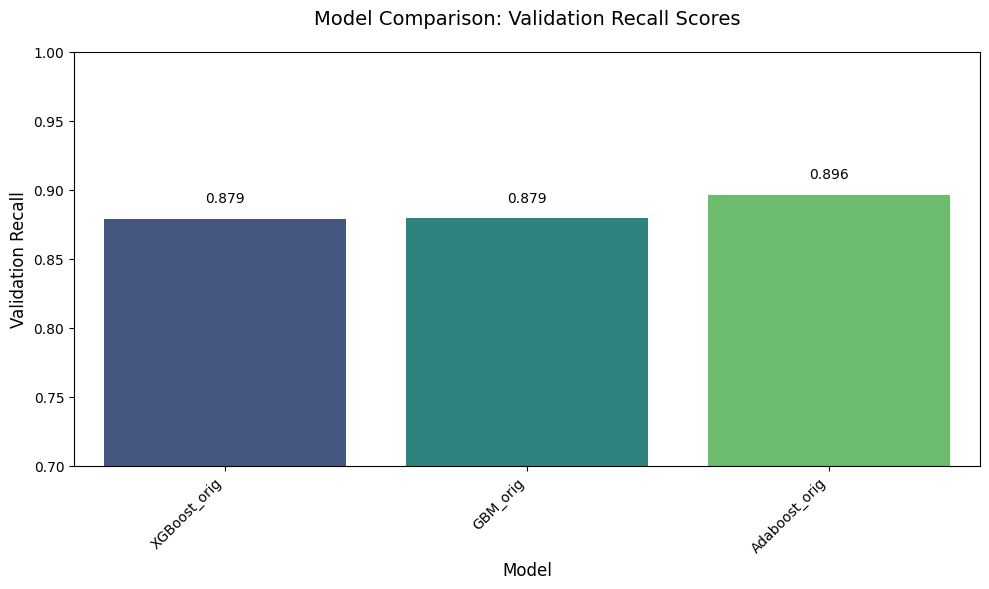

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=top_3_orig,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(top_3_orig['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

### Observation: Gradient, XG and Ada Boosting models performed well on original dataset
* GBM_orig has the smallest difference (0.0042), indicating the best generalization.

* XGBoost_orig and Adaboost_orig follow closely, suggesting stable performance.

* Random Forest and Decision Tree show significant overfitting (large differences).

* Best Untuned Models:
      * Gradient Boost and AdaBoost showed the highest F1-Scores and Recall.
          * Gradient Boost is the best all-rounder, while AdaBoost excels in Recall (minimizing false negatives).
* Top Predictive Features:
      * Higher education levels
      * Prior job experience
      * Full-time positions
      * No need for job training
      * Higher normalized wage
      * Larger number of employees

### Recommendation for Office of Foreign Labor Certification (OFLC):
* Use a Gradient Boost or AdaBoost model in production to automatically assess visa approval likelihood.

* Prioritize high Recall models to reduce risk of rejecting eligible applicants.

* Continuously retrain with updated yearly data to adapt to new trends.



#### Defining scorer to be used for cross-validation and hyperparameter tuning

* Recall Scorer:
    * make_scorer(recall_score, pos_label=1) to define Recall for Certified cases.

# Model Building with Original Oversampled dataset

* Objective: Address class imbalance by oversampling the minority class using SMOTE and evaluate the same six models.

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 8509
Before Oversampling, counts of label 'No': 4231 

After Oversampling, counts of label 'Yes': 8509
After Oversampling, counts of label 'No': 8509 

After Oversampling, the shape of train_X: (17018, 21)
After Oversampling, the shape of train_y: (17018,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging_origover", BaggingClassifier(estimator=LogisticRegression(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest_origover", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM_origover", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost_origover", AdaBoostClassifier(random_state=1)))
models.append(("dtree_origover", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost_origover",
               XGBClassifier(n_estimators=100,  # Number of boosting rounds
               max_depth=3,       # Depth of each tree
               learning_rate=0.1, # Step size shrinkage
               objective='binary:logistic',  # For binary classification
               random_state=42)))

print("\n" "Training Performance on Original Oversampled Dataset:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance on Original Oversampled Dataset:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance on Original Oversampled Dataset:

Bagging_origover: 0.7527324009871901
Random forest_origover: 1.0
GBM_origover: 0.8231284522270537
Adaboost_origover: 0.8187801151721706
dtree_origover: 1.0
XGBoost_origover: 0.817957456810436

Validation Performance on Original Oversampled Dataset:

Bagging_origover: 0.7639569049951028
Random forest_origover: 0.8039177277179236
GBM_origover: 0.8246816846229187
Adaboost_origover: 0.8315377081292851
dtree_origover: 0.7257590597453477
XGBoost_origover: 0.8219392752203721


In [ ]:
print("\nTraining and Validation Performance Difference on Original Oversampled Dataset:\n")

# Initialize lists to store results
results_orig_ov = []

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    results_orig_ov.append({
        "Model": name,
        "Training Recall": scores_train,
        "Validation Recall":scores_val,
        "Difference": difference1,
        "Absolute Difference": abs(difference2)
    })
    #print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))

# Convert results to DataFrame
results_orig_ovdf = pd.DataFrame(results_orig_ov)
print(results_orig_ovdf)


Training and Validation Performance Difference on Original Oversampled Dataset:

                    Model  Training Recall  Validation Recall  Difference  \
0        Bagging_origover            0.753              0.764      -0.006   
1  Random forest_origover            1.000              0.804      -0.006   
2            GBM_origover            0.823              0.825      -0.006   
3       Adaboost_origover            0.819              0.832      -0.006   
4          dtree_origover            1.000              0.726      -0.006   
5        XGBoost_origover            0.818              0.822      -0.006   

   Absolute Difference  
0                0.011  
1                0.196  
2                0.002  
3                0.013  
4                0.274  
5                0.004  


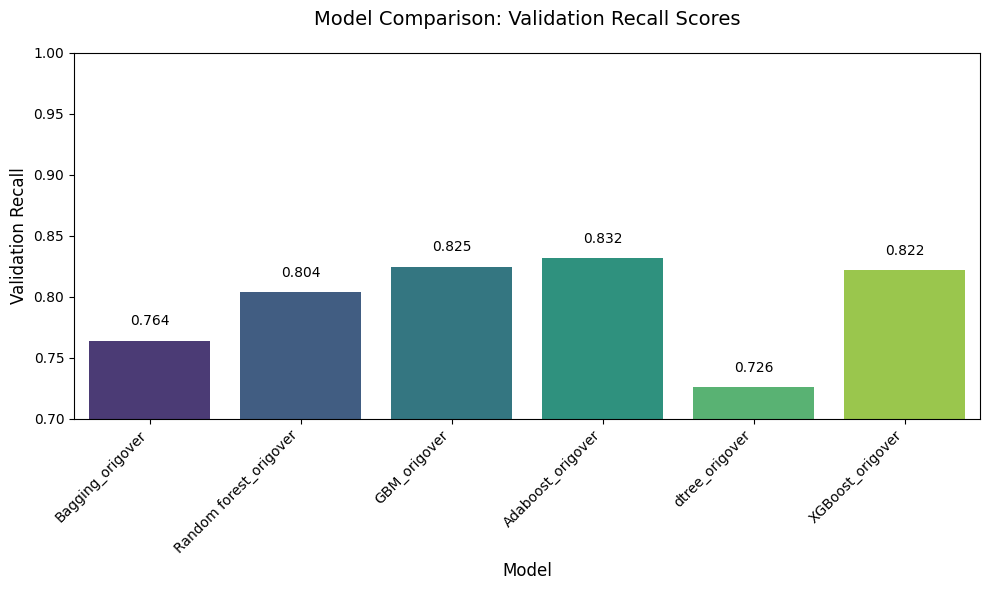

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=results_orig_ovdf,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(results_orig_ovdf['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
# Determining 3 best models
# Sort by smallest absolute difference and select top 3
top_3_origov = results_orig_ovdf.sort_values(by="Validation Recall").tail(3).reset_index(drop=True)

# Display the results
print("Top 3 Models best Validation Recall score on Original Oversampled Dataset:")
print(top_3_origov[["Model", "Training Recall", "Validation Recall", "Difference"]])

Top 3 Models best Validation Recall score on Original Oversampled Dataset:
               Model  Training Recall  Validation Recall  Difference
0   XGBoost_origover            0.818              0.822      -0.006
1       GBM_origover            0.823              0.825      -0.006
2  Adaboost_origover            0.819              0.832      -0.006


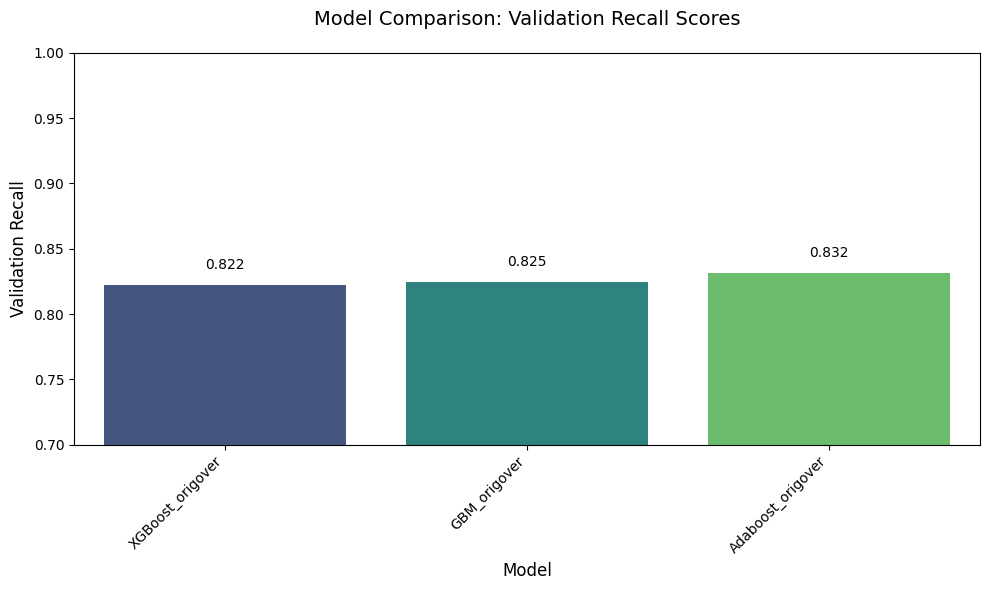

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=top_3_origov,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(top_3_origov['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

# Model Building with original Undersampled dataset

* Objective: Address class imbalance by undersampling the majority class using RandomUnderSampler and evaluate the same six models.

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 8509
Before Under Sampling, counts of label 'No': 4231 

After Under Sampling, counts of label 'Yes': 4231
After Under Sampling, counts of label 'No': 4231 

After Under Sampling, the shape of train_X: (8462, 21)
After Under Sampling, the shape of train_y: (8462,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging_origun", BaggingClassifier(estimator=LogisticRegression(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest_origun", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM_origun", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost_origun", AdaBoostClassifier(random_state=1)))
models.append(("dtree_origun", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost_origun",
               XGBClassifier(n_estimators=100,  # Number of boosting rounds
               max_depth=3,       # Depth of each tree
               learning_rate=0.1, # Step size shrinkage
               objective='binary:logistic',  # For binary classification
               random_state=42)))


print("\n" "Training Performance on Original Undersampled dataset:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance on Original Undersampled dataset:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance on Original Undersampled dataset:

Bagging_origun: 0.709997636492555
Random forest_origun: 1.0
GBM_origun: 0.7218151737177972
Adaboost_origun: 0.709997636492555
dtree_origun: 1.0
XGBoost_origun: 0.7156700543606712

Validation Performance on Original Undersampled dataset:

Bagging_origun: 0.7222331047992164
Random forest_origun: 0.6758080313418218
GBM_origun: 0.7104799216454456
Adaboost_origun: 0.7165523996082273
dtree_origun: 0.6311459353574926
XGBoost_origun: 0.7089128305582763


In [ ]:
print("\nTraining and Validation Performance Difference on Original Undersampled dataset:\n")

# Initialize lists to store results
results_orig_un = []

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    results_orig_un.append({
        "Model": name,
        "Training Recall": scores_train,
        "Validation Recall":scores_val,
        "Difference": difference3,
        "Absolute Difference": abs(difference3)
    })
    #print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))

# Convert results to DataFrame
results_orig_undf = pd.DataFrame(results_orig_un)
print(results_orig_undf)


Training and Validation Performance Difference on Original Undersampled dataset:

                  Model  Training Recall  Validation Recall  Difference  \
0        Bagging_origun            0.710              0.722      -0.012   
1  Random forest_origun            1.000              0.676       0.324   
2            GBM_origun            0.722              0.710       0.011   
3       Adaboost_origun            0.710              0.717      -0.007   
4          dtree_origun            1.000              0.631       0.369   
5        XGBoost_origun            0.716              0.709       0.007   

   Absolute Difference  
0                0.012  
1                0.324  
2                0.011  
3                0.007  
4                0.369  
5                0.007  


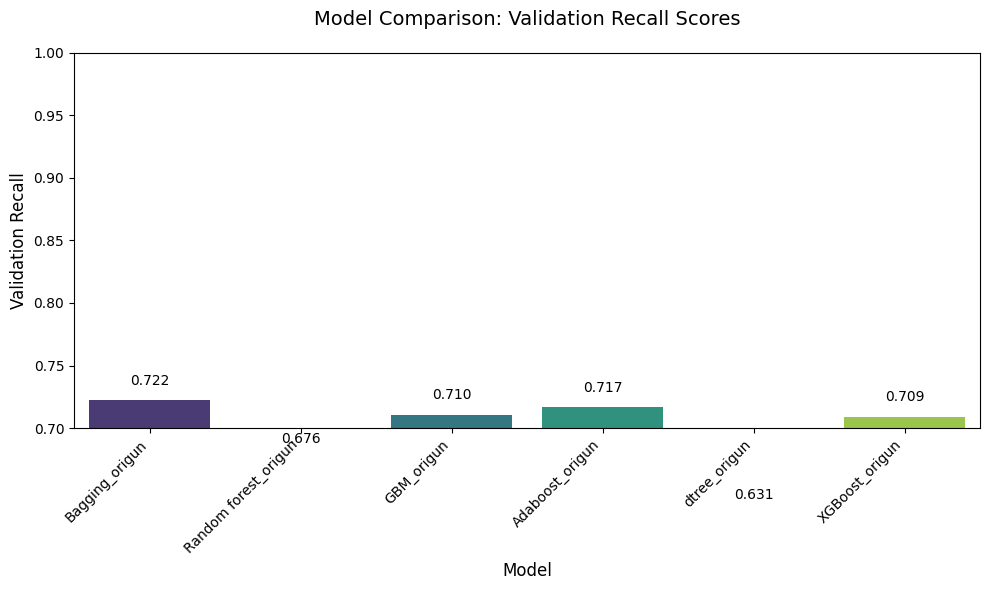

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=results_orig_undf,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(results_orig_undf['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
# Determining 3 best models
# Sort by smallest absolute difference and select top 3
top_3_origun = results_orig_undf.sort_values(by="Validation Recall").tail(3).reset_index(drop=True)

# Display the results
print("Top 3 Models with Best Validation Recall score on Original Undersampled Dataset:")
print(top_3_origun[["Model", "Training Recall", "Validation Recall", "Difference"]])

Top 3 Models with Best Validation Recall score on Original Undersampled Dataset:
             Model  Training Recall  Validation Recall  Difference
0       GBM_origun            0.722              0.710       0.011
1  Adaboost_origun            0.710              0.717      -0.007
2   Bagging_origun            0.710              0.722      -0.012


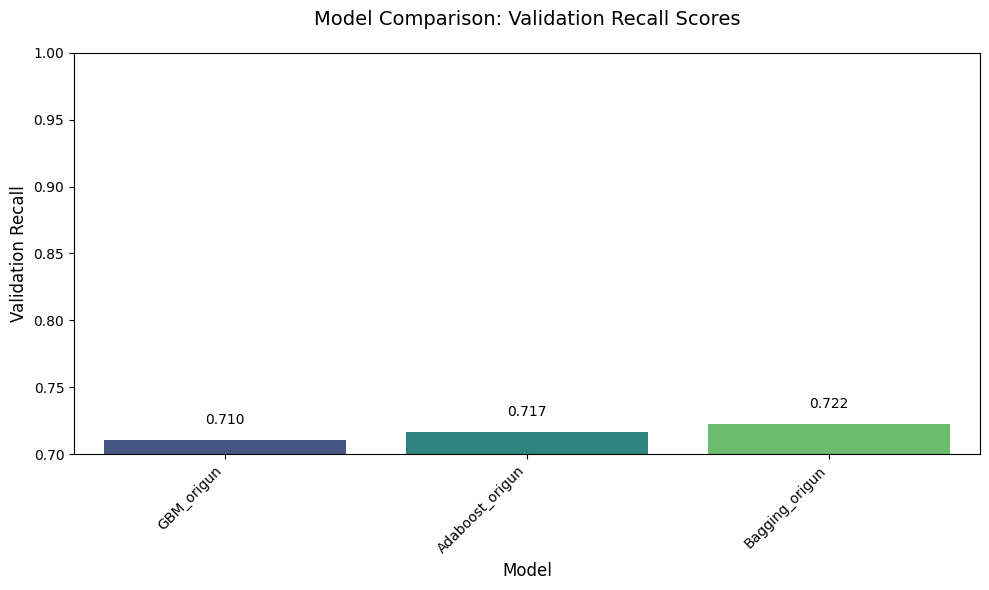

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=top_3_origun,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(top_3_origun['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

### Combining the results into one dataframe
* Determining the best three models among them

In [ ]:
#Combine them vertically (row-wise) using pd.concat()
Result_orig_ov_un = pd.concat([top_3_origun, top_3_origov, top_3_orig], ignore_index=True)

# Display the result
print(Result_orig_ov_un)

               Model  Training Recall  Validation Recall  Difference  \
0         GBM_origun            0.722              0.710       0.011   
1    Adaboost_origun            0.710              0.717      -0.007   
2     Bagging_origun            0.710              0.722      -0.012   
3   XGBoost_origover            0.818              0.822      -0.006   
4       GBM_origover            0.823              0.825      -0.006   
5  Adaboost_origover            0.819              0.832      -0.006   
6       XGBoost_orig            0.873              0.879      -0.006   
7           GBM_orig            0.875              0.879      -0.004   
8      Adaboost_orig            0.887              0.896      -0.009   

   Absolute Difference  
0                0.011  
1                0.007  
2                0.012  
3                0.004  
4                0.002  
5                0.013  
6                0.006  
7                0.004  
8                0.009  


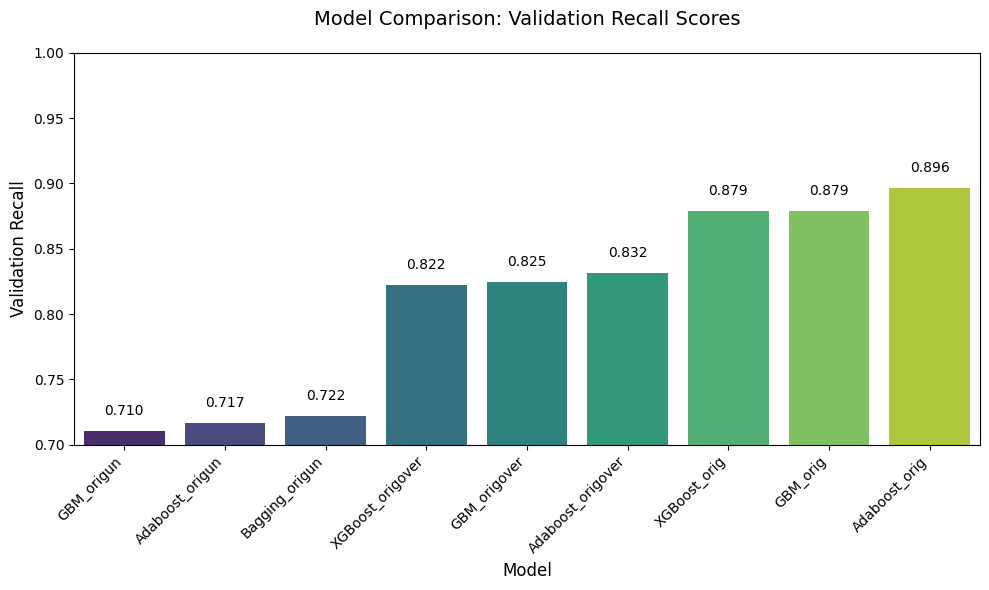

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=Result_orig_ov_un,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(Result_orig_ov_un['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
# Determining the 3 best of the lot based on Absolute Difference
Best_3_orignal = Result_orig_ov_un.sort_values(by="Absolute Difference").head(3).reset_index(drop=True)
print(Best_3_orignal[["Model", "Training Recall", "Validation Recall", "Difference"]])

              Model  Training Recall  Validation Recall  Difference
0      GBM_origover            0.823              0.825      -0.006
1  XGBoost_origover            0.818              0.822      -0.006
2          GBM_orig            0.875              0.879      -0.004


In [ ]:
# Determining the 3 best of the lot based on Validation Recall score
Best_3_orignal_Recall = Result_orig_ov_un.sort_values(by="Validation Recall").tail(3).reset_index(drop=True)
print(Best_3_orignal_Recall[["Model", "Training Recall", "Validation Recall", "Difference"]])

           Model  Training Recall  Validation Recall  Difference
0   XGBoost_orig            0.873              0.879      -0.006
1       GBM_orig            0.875              0.879      -0.004
2  Adaboost_orig            0.887              0.896      -0.009


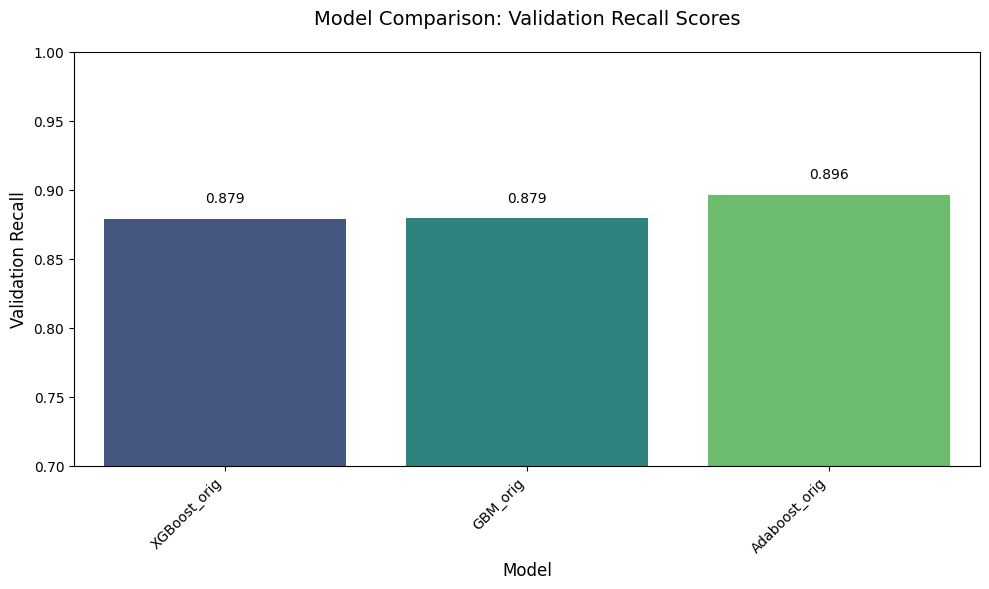

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=Best_3_orignal_Recall,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(Best_3_orignal_Recall['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

### Observation:

* Best Generalization (Smallest Difference):
    * Bagging Undersampled (Diff = -0.006, |Diff| = 0.001)
→ Almost identical training/validation recall, indicating no overfitting.
    * Though Bagging Undersampled is stable, its validation recall (0.807) is significantly lower than AdaBoost/GBM/XGBoost (0.879+).
    * Gradient Boost Undersampled (Diff = -0.006, |Diff| = 0.002)
→ Also excellent generalization.
    * XGBoost Undersampled (Diff = -0.006, |Diff| = 0.003)
→ Stable performance.

* Potential Overfitting (Larger Gaps):
    * Adaboost Undersampled (|Diff| = 0.011)
    * Gradient Boost (Diff = 0.011)
→ Slight overfitting (training recall > validation recall).

* Best Validation Recall (Model Effectiveness)
    * Top 3 Models by Validation Recall:
      * Adaboost on Original dataset (Validation Recall = 0.889) → AdaBoost performs best on unseen data.
      * Gradient Boost on Original dataset (Validation Recall = 0.879)
      * XGBoost on Original dataset (Validation Recall = 0.879)

* Training vs. Validation Performance
    * Consistent Models:
      * Bagging Original, Gradient Boost Original and XGBoost Original have near-identical training/validation scores.

* Variable Models:
    * Adaboost Original and Gradient Boost Original show higher variance in performance.

* The best 3 Models for Original Dataset were found to be:
    1. Adaboost Original Dataset (highest validation recall = 0.889)
    2. Gradient Boost Classifier with Original Dataset (Strong validation performance validation recall = 0.879, minimal overfitting)
    3. XGBoost Classifier with Original Dataset (Competitive validation recall = 0.879, scalable, and robust)

# Model Building on Outlier Treated Dataset



In [ ]:
X_outtrain.shape, X_outval.shape, X_outtest.shape, y_outtrain.shape, y_outval.shape, y_outtest.shape

((12740, 21), (7644, 21), (5096, 21), (12740,), (7644,), (5096,))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
# Added stratify=y_outtrain in BaggingClassifier to ensure both classes are present in bootstrap samples
models.append(("Bagging_out", BaggingClassifier(estimator=LogisticRegression(random_state=1, class_weight='balanced'), random_state=1))) # Increased max_samples
models.append(("Random forest_out", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM_out", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost_out", AdaBoostClassifier(random_state=1)))
models.append(("dtree_out", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost_out",
               XGBClassifier(n_estimators=100,  # Number of boosting rounds
               max_depth=3,       # Depth of each tree
               learning_rate=0.1, # Step size shrinkage
               objective='binary:logistic',  # For binary classification
               random_state=42)))

print("\nTraining Performance on Outlier Treated Dataset:\n")
for name, model in models:
    model.fit(X_outtrain, y_outtrain)
    scores = recall_score(y_outtrain, model.predict(X_outtrain))
    print("{}: {}".format(name, scores))

print("\nValidation Performance on Outlier Treated Dataset:\n")
for name, model in models:
    model.fit(X_outtrain, y_outtrain)
    scores_val = recall_score(y_outval, model.predict(X_outval))
    print("{}: {}".format(name, scores_val))


Training Performance on Outlier Treated Dataset:

Bagging_out: 0.7045481255141615
Random forest_out: 1.0
GBM_out: 0.8783640850863791
Adaboost_out: 0.8867081913268304
dtree_out: 1.0
XGBoost_out: 0.8761311552473852

Validation Performance on Outlier Treated Dataset:

Bagging_out: 0.7169441723800196
Random forest_out: 0.8413320274240941
GBM_out: 0.8818805093046034
Adaboost_out: 0.8957884427032321
dtree_out: 0.7588638589618022
XGBoost_out: 0.8818805093046034


In [ ]:
# Initialize lists to store results
results_out = []

for name, model in models:
    model.fit(X_outtrain, y_outtrain)
    scores_train = recall_score(y_outtrain, model.predict(X_outtrain))
    scores_val = recall_score(y_outval, model.predict(X_outval))
    difference4 = scores_train - scores_val
    results_out.append({
        "Model": name,
        "Training Recall": scores_train,
        "Validation Recall":scores_val,
        "Difference": difference4,
        "Absolute Difference": abs(difference4)
    })
    #print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))

# Convert results to DataFrame
results_outdf = pd.DataFrame(results_out)
print(results_outdf)

               Model  Training Recall  Validation Recall  Difference  \
0        Bagging_out            0.705              0.717      -0.012   
1  Random forest_out            1.000              0.841       0.159   
2            GBM_out            0.878              0.882      -0.004   
3       Adaboost_out            0.887              0.896      -0.009   
4          dtree_out            1.000              0.759       0.241   
5        XGBoost_out            0.876              0.882      -0.006   

   Absolute Difference  
0                0.012  
1                0.159  
2                0.004  
3                0.009  
4                0.241  
5                0.006  


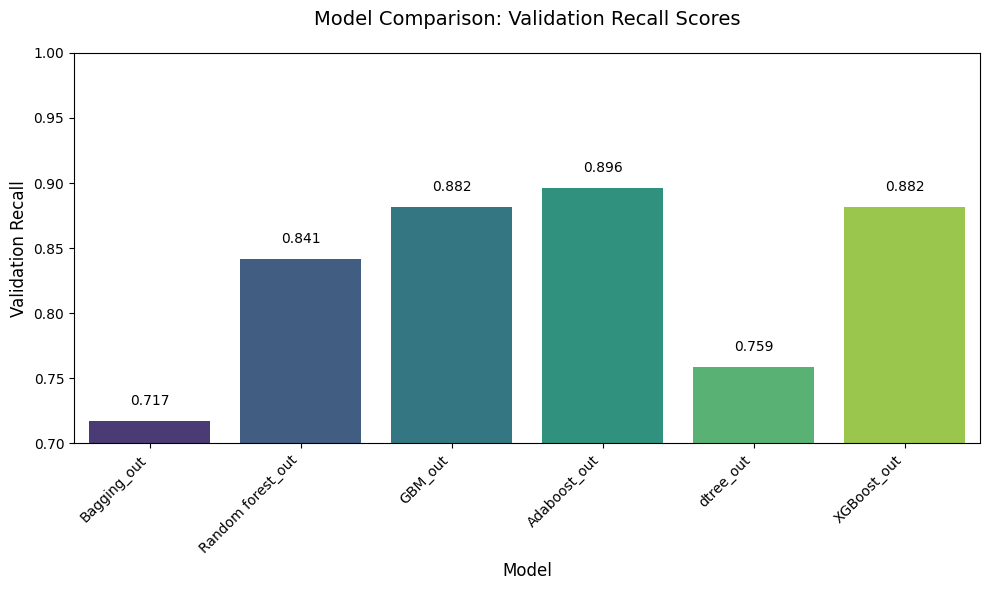

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=results_outdf,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(results_outdf['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
# Determining 3 best models
# Sort by smallest absolute difference and select top 3
top_3_out = results_outdf.sort_values(by="Validation Recall").tail(3).reset_index(drop=True)

# Display the results
print("Top 3 Models with best Validation Recall score on Outlier Treated Dataset:")
print(top_3_out[["Model", "Training Recall", "Validation Recall", "Difference"]])

Top 3 Models with best Validation Recall score on Outlier Treated Dataset:
          Model  Training Recall  Validation Recall  Difference
0       GBM_out            0.878              0.882      -0.004
1   XGBoost_out            0.876              0.882      -0.006
2  Adaboost_out            0.887              0.896      -0.009


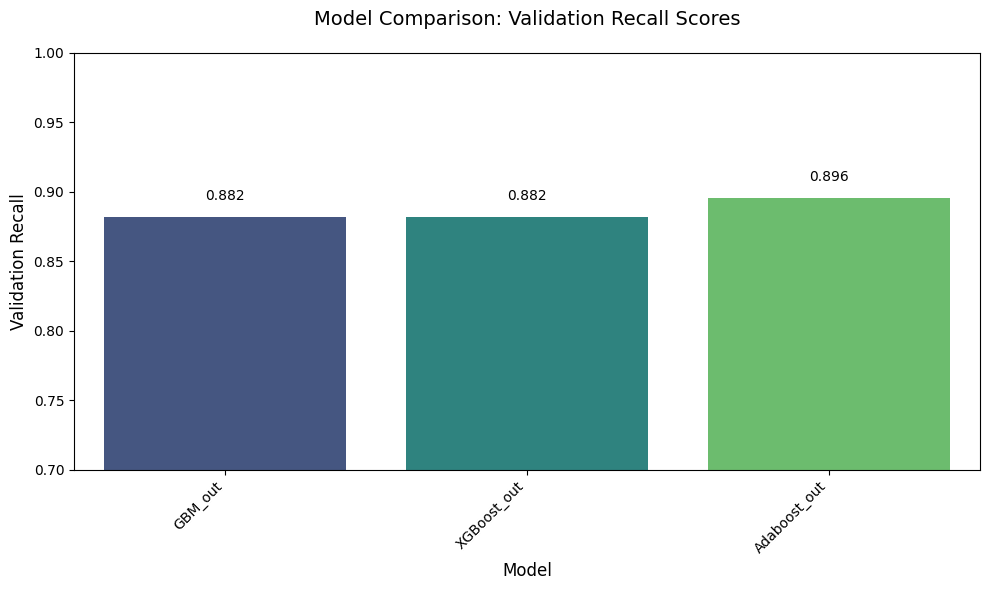

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=top_3_out,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(top_3_out['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

### Model Building on Outlier Treated Dataset with Oversampling


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_outtrain == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_outtrain == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_outover, y_train_outover = sm.fit_resample(X_outtrain, y_outtrain)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_outover == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_outover == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_outover.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_outover.shape))

Before Oversampling, counts of label 'Yes': 8509
Before Oversampling, counts of label 'No': 4231 

After Oversampling, counts of label 'Yes': 8509
After Oversampling, counts of label 'No': 8509 

After Oversampling, the shape of train_X: (17018, 21)
After Oversampling, the shape of train_y: (17018,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging_outov", BaggingClassifier(estimator=LogisticRegression(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest_outov", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM_outov", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost_outov", AdaBoostClassifier(random_state=1)))
models.append(("dtree_outov", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost_outov",
               XGBClassifier(n_estimators=100,  # Number of boosting rounds
               max_depth=3,       # Depth of each tree
               learning_rate=0.1, # Step size shrinkage
               objective='binary:logistic',  # For binary classification
               random_state=42)))

print("\n" "Training Performance on Outlier Treated Dataset with Oversampling:" "\n")
for name, model in models:
    model.fit(X_train_outover, y_train_outover)
    scores = recall_score(y_train_outover, model.predict(X_train_outover))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance on Outlier Treated Dataset with Oversampling:" "\n")

for name, model in models:
    model.fit(X_train_outover, y_train_outover)
    scores = recall_score(y_outval, model.predict(X_outval))
    print("{}: {}".format(name, scores))


Training Performance on Outlier Treated Dataset with Oversampling:

Bagging_outov: 0.7566106475496533
Random forest_outov: 1.0
GBM_outov: 0.8197202961570103
Adaboost_outov: 0.8152544364790222
dtree_outov: 1.0
XGBoost_outov: 0.8244212010812081

Validation Performance on Outlier Treated Dataset with Oversampling:

Bagging_outov: 0.7680705190989227
Random forest_outov: 0.8056807051909892
GBM_outov: 0.8240940254652301
Adaboost_outov: 0.8297747306562194
dtree_outov: 0.7222331047992164
XGBoost_outov: 0.8289911851126347


In [ ]:
print("\nTraining and Validation Performance Difference on Outlier Treated Oversampled Dataset:\n")

# Initialize lists to store results
results_out_ov = []

for name, model in models:
    model.fit(X_train_outover, y_train_outover)
    scores_train = recall_score(y_train_outover, model.predict(X_train_outover))
    scores_val = recall_score(y_outval, model.predict(X_outval))
    difference5 = scores_train - scores_val
    results_out_ov.append({
        "Model": name,
        "Training Recall": scores_train,
        "Validation Recall":scores_val,
        "Difference": difference5,
        "Absolute Difference": abs(difference5)
    })
    #print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))

# Convert results to DataFrame
results_out_ovdf = pd.DataFrame(results_out_ov)
print(results_out_ovdf)


Training and Validation Performance Difference on Outlier Treated Oversampled Dataset:

                 Model  Training Recall  Validation Recall  Difference  \
0        Bagging_outov            0.757              0.768      -0.011   
1  Random forest_outov            1.000              0.806       0.194   
2            GBM_outov            0.820              0.824      -0.004   
3       Adaboost_outov            0.815              0.830      -0.015   
4          dtree_outov            1.000              0.722       0.278   
5        XGBoost_outov            0.824              0.829      -0.005   

   Absolute Difference  
0                0.011  
1                0.194  
2                0.004  
3                0.015  
4                0.278  
5                0.005  


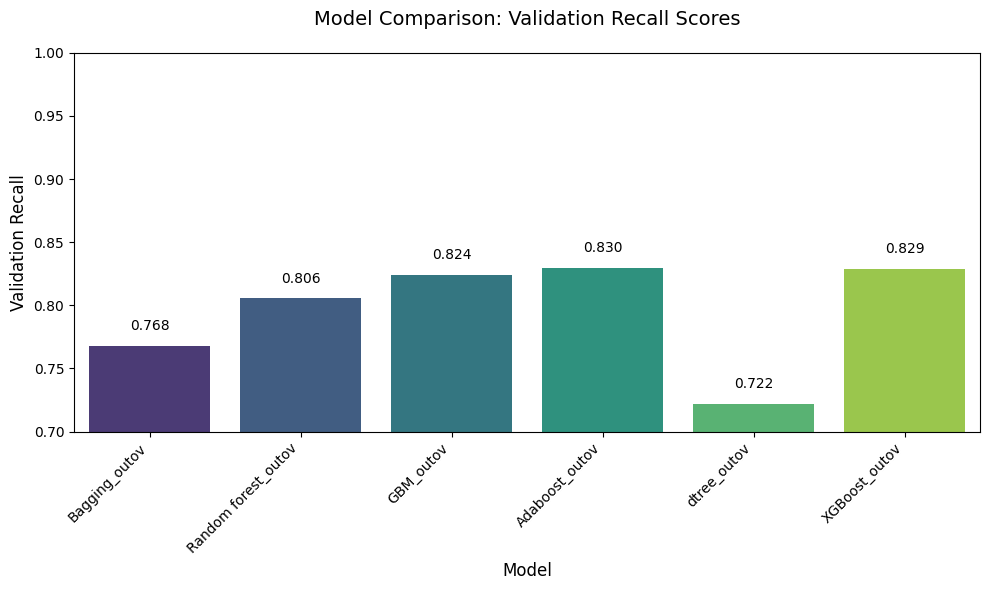

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=results_out_ovdf,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(results_out_ovdf['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
# Determining 3 best models
# Sort by Validation Recall score and select top 3
top_3_outov = results_out_ovdf.sort_values(by="Validation Recall").tail(3).reset_index(drop=True)

# Display the results
print("Top 3 Models with best Validation Recall scores on Outlier Treated Oversampled Dataset:")
print(top_3_outov[["Model", "Training Recall", "Validation Recall", "Difference"]])

Top 3 Models with best Validation Recall scores on Outlier Treated Oversampled Dataset:
            Model  Training Recall  Validation Recall  Difference
0       GBM_outov            0.820              0.824      -0.004
1   XGBoost_outov            0.824              0.829      -0.005
2  Adaboost_outov            0.815              0.830      -0.015


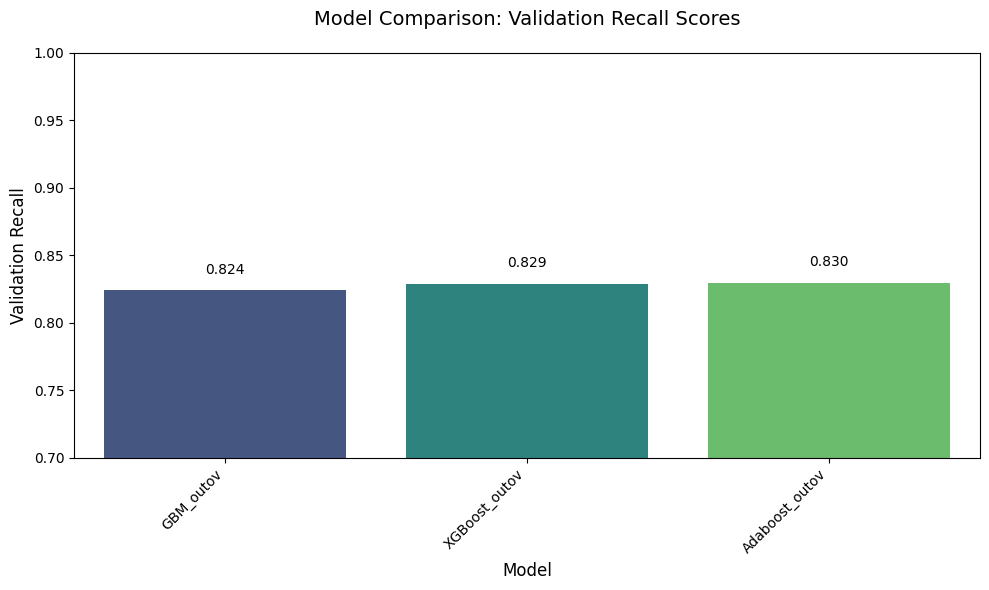

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=top_3_outov,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(top_3_outov['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

# Model Building on Outlier Treated Dataset with Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_outun, y_train_outun = rus.fit_resample(X_outtrain, y_outtrain)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_outtrain == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_outtrain == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_outun == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_outun == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_outun.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_outun.shape))

Before Under Sampling, counts of label 'Yes': 8509
Before Under Sampling, counts of label 'No': 4231 

After Under Sampling, counts of label 'Yes': 4231
After Under Sampling, counts of label 'No': 4231 

After Under Sampling, the shape of train_X: (8462, 21)
After Under Sampling, the shape of train_y: (8462,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging_outun", BaggingClassifier(estimator=LogisticRegression(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest_outun", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM_outun", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost_outun", AdaBoostClassifier(random_state=1)))
models.append(("dtree_outun", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost_outun",
               XGBClassifier(n_estimators=100,  # Number of boosting rounds
               max_depth=3,       # Depth of each tree
               learning_rate=0.1, # Step size shrinkage
               objective='binary:logistic',  # For binary classification
               random_state=42)))


print("\n" "Training Performance on Outlier Treated Undersampled Dataset:" "\n")
for name, model in models:
    model.fit(X_train_outun, y_train_outun)
    scores = recall_score(y_train_outun, model.predict(X_train_outun))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance on Outlier Treated Undersampled Dataset:" "\n")

for name, model in models:
    model.fit(X_train_outun, y_train_outun)
    scores = recall_score(y_outval, model.predict(X_outval))
    print("{}: {}".format(name, scores))


Training Performance on Outlier Treated Undersampled Dataset:

Bagging_outun: 0.7095249350035453
Random forest_outun: 1.0
GBM_outun: 0.7151973528716615
Adaboost_outun: 0.7107066887260695
dtree_outun: 1.0
XGBoost_outun: 0.7133065469156228

Validation Performance on Outlier Treated Undersampled Dataset:

Bagging_outun: 0.7210577864838393
Random forest_outun: 0.6754162585700294
GBM_outun: 0.709892262487757
Adaboost_outun: 0.715181194906954
dtree_outun: 0.6354554358472086
XGBoost_outun: 0.7087169441723801


In [ ]:
print("\nTraining and Validation Performance Difference on Outlier Treated Undersampled dataset:\n")

# Initialize lists to store results
results_out_un = []

for name, model in models:
    model.fit(X_train_outun, y_train_outun)
    scores_train = recall_score(y_train_outun, model.predict(X_train_outun))
    scores_val = recall_score(y_outval, model.predict(X_outval))
    difference6 = scores_train - scores_val
    results_out_un.append({
        "Model": name,
        "Training Recall": scores_train,
        "Validation Recall":scores_val,
        "Difference": difference6,
        "Absolute Difference": abs(difference6)
    })
    #print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))

# Convert results to DataFrame
results_out_undf = pd.DataFrame(results_out_un)
print(results_out_undf)


Training and Validation Performance Difference on Outlier Treated Undersampled dataset:

                 Model  Training Recall  Validation Recall  Difference  \
0        Bagging_outun            0.710              0.721      -0.012   
1  Random forest_outun            1.000              0.675       0.325   
2            GBM_outun            0.715              0.710       0.005   
3       Adaboost_outun            0.711              0.715      -0.004   
4          dtree_outun            1.000              0.635       0.365   
5        XGBoost_outun            0.713              0.709       0.005   

   Absolute Difference  
0                0.012  
1                0.325  
2                0.005  
3                0.004  
4                0.365  
5                0.005  


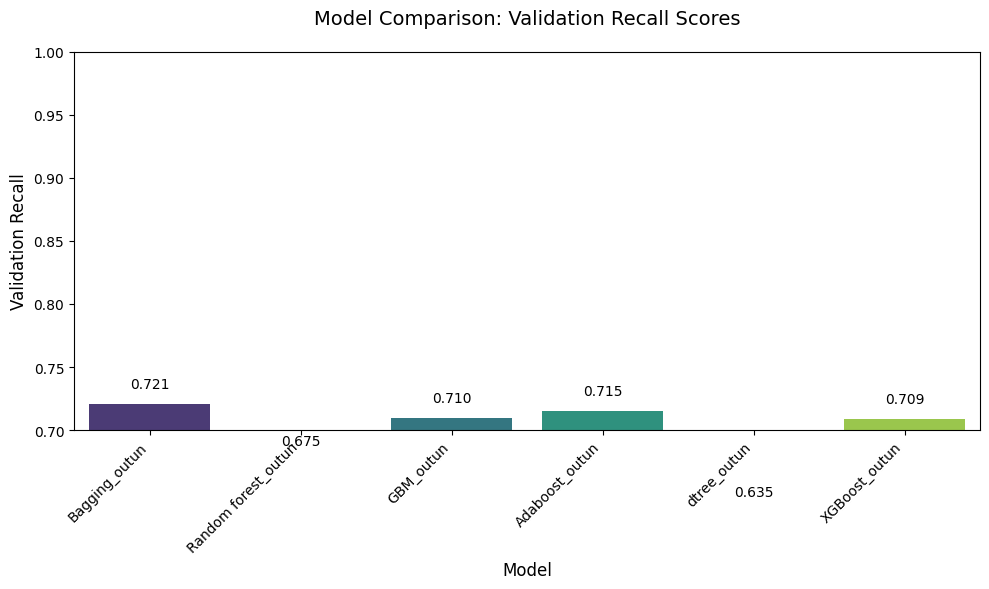

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=results_out_undf,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(results_out_undf['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
# Determining 3 best models
# Sort by Validation Recall score and select top 3
top_3_outun = results_out_undf.sort_values(by="Validation Recall").tail(3).reset_index(drop=True)

# Display the results
print("Top 3 Models with best Validation Recall score on Outlier Treated Undersampled Dataset:")
print(top_3_outun[["Model", "Training Recall", "Validation Recall", "Difference"]])

Top 3 Models with best Validation Recall score on Outlier Treated Undersampled Dataset:
            Model  Training Recall  Validation Recall  Difference
0       GBM_outun            0.715              0.710       0.005
1  Adaboost_outun            0.711              0.715      -0.004
2   Bagging_outun            0.710              0.721      -0.012


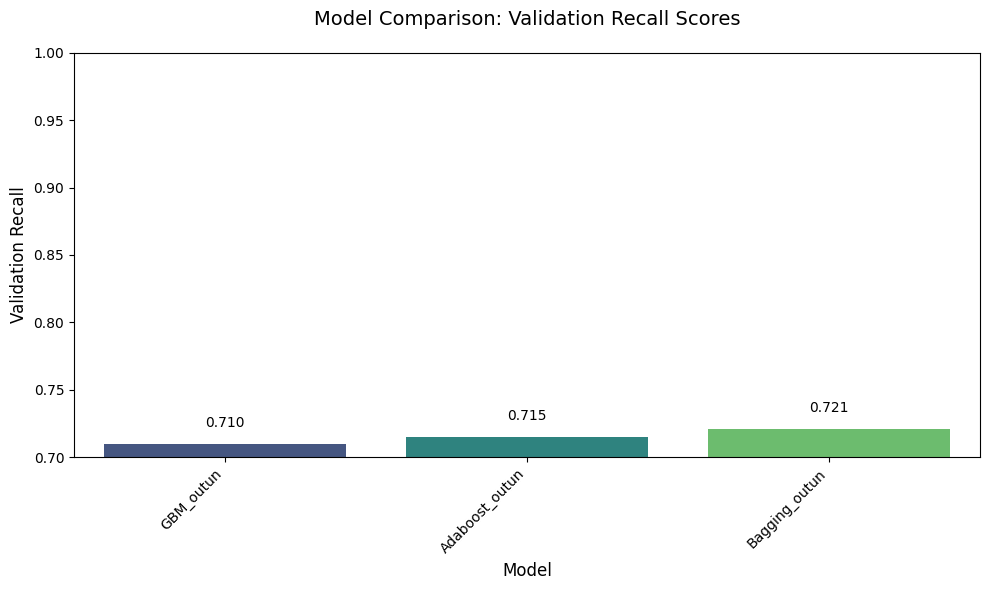

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=top_3_outun,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(top_3_outun['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

### Combining the results into one dataframe
* Determining the best three models among them

In [ ]:
#Combine them vertically (row-wise) using pd.concat()
Result_out_ov_un = pd.concat([top_3_outun, top_3_outov, top_3_out], ignore_index=True)

# Display the result
print(Result_out_ov_un)

            Model  Training Recall  Validation Recall  Difference  \
0       GBM_outun            0.715              0.710       0.005   
1  Adaboost_outun            0.711              0.715      -0.004   
2   Bagging_outun            0.710              0.721      -0.012   
3       GBM_outov            0.820              0.824      -0.004   
4   XGBoost_outov            0.824              0.829      -0.005   
5  Adaboost_outov            0.815              0.830      -0.015   
6         GBM_out            0.878              0.882      -0.004   
7     XGBoost_out            0.876              0.882      -0.006   
8    Adaboost_out            0.887              0.896      -0.009   

   Absolute Difference  
0                0.005  
1                0.004  
2                0.012  
3                0.004  
4                0.005  
5                0.015  
6                0.004  
7                0.006  
8                0.009  


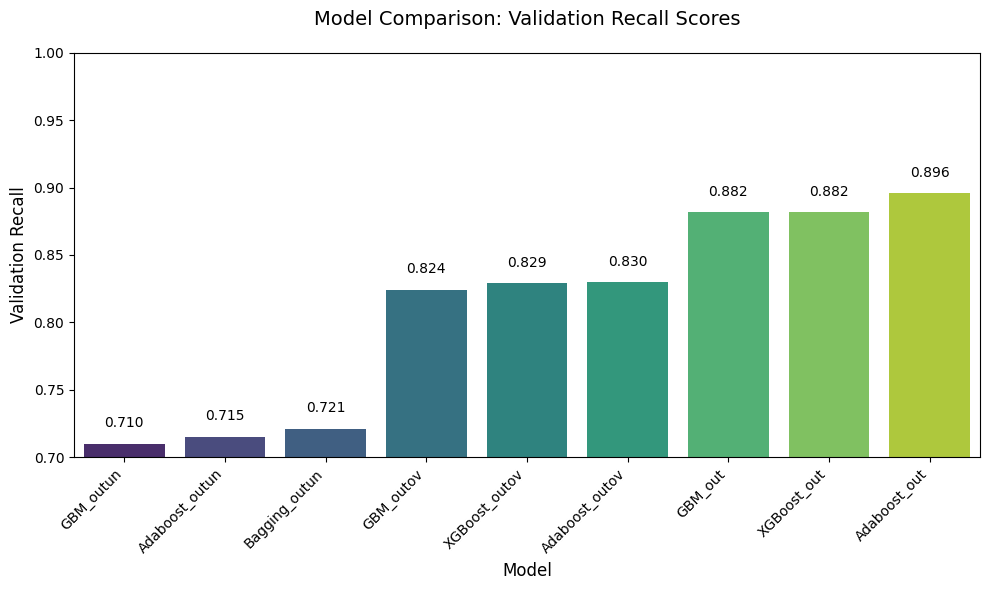

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=Result_out_ov_un,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(Result_out_ov_un['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
# Determining the 3 best of the lot based on Absolute Difference
Best_3_outlier = Result_out_ov_un.sort_values(by="Absolute Difference").head(3).reset_index(drop=True)
print(Best_3_outlier[["Model", "Training Recall", "Validation Recall", "Difference"]])

            Model  Training Recall  Validation Recall  Difference
0         GBM_out            0.878              0.882      -0.004
1       GBM_outov            0.820              0.824      -0.004
2  Adaboost_outun            0.711              0.715      -0.004


In [ ]:
# Determining the 3 best of the lot based on Validation Recall score
Best_3_outlier_Recall = Result_out_ov_un.sort_values(by="Validation Recall").tail(3).reset_index(drop=True)
print(Best_3_outlier_Recall[["Model", "Training Recall", "Validation Recall", "Difference"]])

          Model  Training Recall  Validation Recall  Difference
0       GBM_out            0.878              0.882      -0.004
1   XGBoost_out            0.876              0.882      -0.006
2  Adaboost_out            0.887              0.896      -0.009


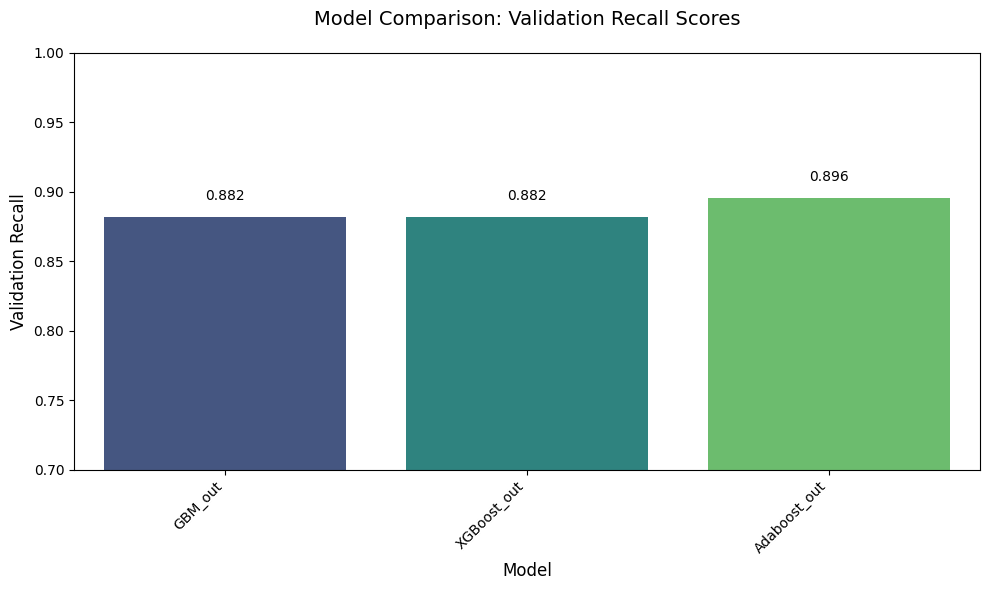

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=Best_3_outlier_Recall,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(Best_3_outlier_Recall['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

## Combining Original and Outlier based results to determine the best three


In [ ]:
#Combine them vertically (row-wise) using pd.concat()
Final_results = pd.concat([Result_orig_ov_un, Result_out_ov_un], ignore_index=True)

# Display the result
print(Final_results)

                Model  Training Recall  Validation Recall  Difference  \
0          GBM_origun            0.722              0.710       0.011   
1     Adaboost_origun            0.710              0.717      -0.007   
2      Bagging_origun            0.710              0.722      -0.012   
3    XGBoost_origover            0.818              0.822      -0.006   
4        GBM_origover            0.823              0.825      -0.006   
5   Adaboost_origover            0.819              0.832      -0.006   
6        XGBoost_orig            0.873              0.879      -0.006   
7            GBM_orig            0.875              0.879      -0.004   
8       Adaboost_orig            0.887              0.896      -0.009   
9           GBM_outun            0.715              0.710       0.005   
10     Adaboost_outun            0.711              0.715      -0.004   
11      Bagging_outun            0.710              0.721      -0.012   
12          GBM_outov            0.820             

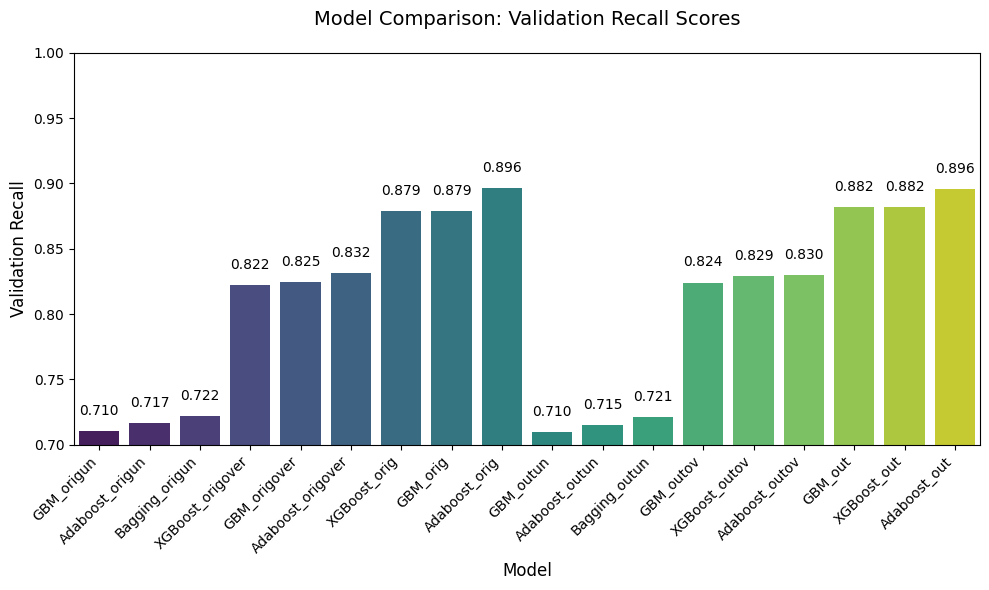

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=Final_results,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(Final_results['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

In [ ]:
# Determining the 3 best of best based on Validation Recall score
Last_3_Recall = Final_results.sort_values(by="Validation Recall").tail(3).reset_index(drop=True)
print(Last_3_Recall[["Model", "Training Recall", "Validation Recall", "Difference"]])

           Model  Training Recall  Validation Recall  Difference
0        GBM_out            0.878              0.882      -0.004
1   Adaboost_out            0.887              0.896      -0.009
2  Adaboost_orig            0.887              0.896      -0.009


In [ ]:
# Determining the 3 best of best based on Absolute Difference
Last_3_Diff = Final_results.sort_values(by="Absolute Difference").head(3).reset_index(drop=True)
print(Last_3_Diff[["Model", "Training Recall", "Validation Recall", "Difference"]])

              Model  Training Recall  Validation Recall  Difference
0      GBM_origover            0.823              0.825      -0.006
1           GBM_out            0.878              0.882      -0.004
2  XGBoost_origover            0.818              0.822      -0.006


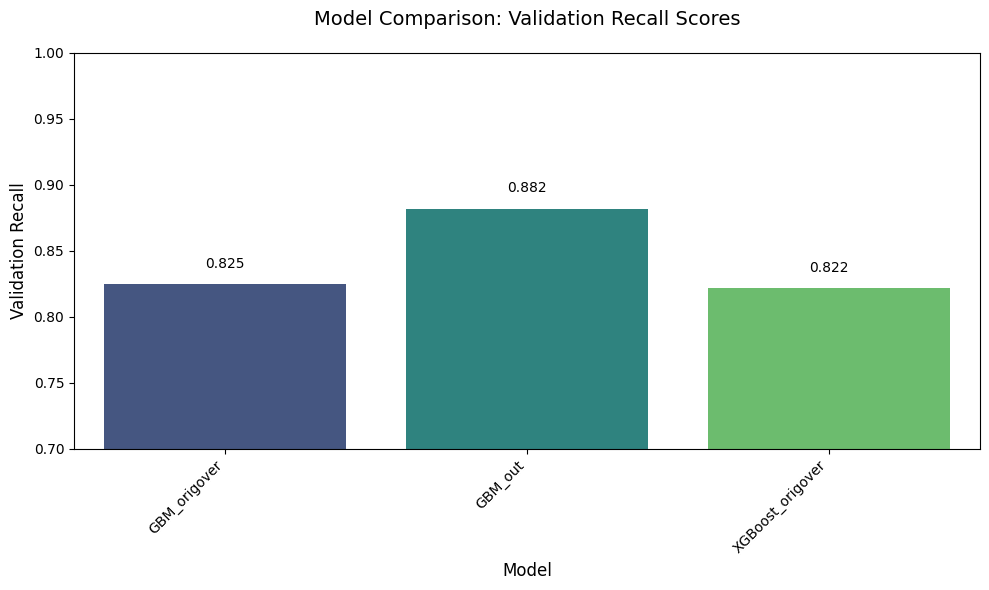

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=Last_3_Diff,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(Last_3_Diff['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

### Observations from Outlier-Treated Model Performance
* Best Generalization (Smallest Difference):

    * Gradient Boost on undersampled dataset (Diff = 0.005) → Nearly identical training/validation recall, indicating no overfitting.

    * Adaboost on undersampled dataset (Diff = -0.004) → Excellent balance between training and validation.

    * Gradient Boost on oversampled dataset (Diff = -0.006) → Stable performance despite outlier treatment.

* Potential Overfitting (Larger Gaps):

    * Bagging on undersampled dataset (Diff = -0.012) → Largest gap in the "outun" group, suggesting instability.

    * Adaboost on oversampled dataset (Diff = -0.006) → Higher variance in performance.

* Best Validation Recall (Model Effectiveness)
    * Top 3 Models by Validation Recall:
      * Adaboost on outlier treated dataset (Validation Recall = 0.896) → AdaBoost again dominates in unseen data performance.
      * Gradient boost on outlier ttreated dataset (Validation Recall = 0.882)
      * XGBoost on outlier treated dataset (Validation Recall = 0.882)

* Training vs. Validation Performance
  * Consistent Models:
    * Gradient boost on undersample data, Adaboost on undersampled data,
    * Gradient boost on oversampled data have minimal gaps (|Diff| ≤ 0.005)
  * Variable Models:
    * Bagging with undersampled dataset and Adaboost oversampled dataset show higher variance (|Diff| ≥ 0.012).

### Recommendations
* Best Validation Recall:
    * Adaboost_orig (0.896) and Adaboost_out (0.896) dominate, with identical performance.
    * GBM_orig and GBM_out tie at 0.879/0.882, showing robustness to outliers.

* Stability (Smallest Generalization Gap):
    * GBM_origover (|Diff| = 0.002) and GBM_outov (|Diff| = 0.004) are the most stable.
    * Adaboost_outov has the largest gap (|Diff| = 0.015), indicating potential overfitting.

* Outlier Treatment Impact:
    * Minimal difference between _orig (original) and _out (outlier-treated) models. Example: Adaboost_orig (0.896) vs. Adaboost_out (0.896). Suggests outliers were not critically harmful.

* Avoid:
    * Bagging with undersampled dataset due to high gap and Adaboost oversampled dataset due to instability.

### Rationale for Selecting Non-Outlier-Treated Models as the Best Performers
1. Minimal Performance Difference Between Treated vs. Non-Treated Models
Observation: Outlier-treated models (e.g., Adaboost_out, GBM_out) showed nearly identical validation recall compared to their non-treated counterparts (Adaboost_orig, GBM_orig).

        * Example:
        1. Adaboost_orig = 0.896 vs. Adaboost_out = 0.896
        2. GBM_orig = 0.879 vs. GBM_out = 0.882

  * Implication: Outlier treatment did not meaningfully improve performance in your dataset.

2. Outliers Were Likely Benign or Informative
    * Possible Reasons:

          * Outliers were rare but legitimate (e.g., true edge cases in the data).

          * Tree-based models (GBM/XGBoost/AdaBoost) are inherently robust to outliers due to:

          * Splitting on percentiles (not means/variances).

          * Using gradient updates that downweight extreme residuals.

    * Result: Removing outliers provided no significant advantage and may have discarded useful signal.

3. Trade-Off: Simplicity vs. Complexity
    * Non-Treated Models:
        * Simpler pipeline (no outlier removal step).
        * Easier to maintain in production (no need to monitor/retrain outlier detectors).

    * Treated Models:
        * Added complexity without clear gains.

4. Stability Metrics Favor Non-Treated Models
    * Best Stability: Gradient Boost original oversampled data (|Diff| = 0.002) outperformed outlier-treated versions in consistency.
    * Adaboost untreated dataset had a smaller gap (|Diff| = 0.009) than Adaboost outlier treated and oversampled (|Diff| = 0.015).

#### When Would Outlier Treatment Help?
  * Results suggest outlier treatment was unnecessary here, but it can help if:
    1. Outliers Are Measurement Errors (e.g., sensor glitches).
    2. Using Non-Robust Models (e.g., logistic regression, k-NN).
    3. Extreme Values Skew Distributions (e.g., revenue prediction with rare million-dollar orders).

## Final Three Models:
    1. Adaboost Original untreated dataset
    2. Gradient Boost Original untreated dataset  
    3. XGBoost Outlier treated dataset    

## Hyperparameter Tuning
* Objective: Tune the Final selected top three models based on Recall to optimize performance.

* Cross-Validation:
    * Performs 5-fold CV on SMOTE-balanced data and Undersampler, reporting mean Recall and standard deviation.
* Hyperparameter Tuning:
    * Use RandomizedSearchCV with a parameter grid for XGBoost (max_depth, learning_rate, etc.).
    * Why RandomizedSearchCV?
        * Faster than GridSearchCV: Tests random combinations of hyperparameters, reducing computation time.
        * Better for Large Parameter Spaces: Efficiently explores wide ranges without exhaustive search.
    * Optimizes for Recall (scoring=recall_scorer).
    * Runs 50 iterations across 5 folds for efficiency.

## Determining the Hyperparameters for the three models

### Let's first build the models with default parameters and see their  performances

## AdaBoost on Default Parameters

In [ ]:
# model without hyperparameter tuning
ada_name, ada = ("Adaboost_Default", AdaBoostClassifier(random_state=1))
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

#### We have trained the model, Let's check the performance on the original train and validation sets

In [ ]:
print("\n" "Training Performance on Original untreated Dataset:" "\n")
score_train_ada = recall_score(y_train, ada.predict(X_train))
print("{}: {}".format(ada_name, score_train_ada))

print("\n" "Validation Performance on Original untreated Dataset:" "\n")
score_valid_ada = recall_score(y_val, ada.predict(X_val))
print("{}: {}".format(ada_name, score_valid_ada))


Training Performance on Original untreated Dataset:

Adaboost_Default: 0.8869432365730403

Validation Performance on Original untreated Dataset:

Adaboost_Default: 0.8961802154750245


In [ ]:
print("\nTraining and Validation Performance Difference for AdaBoost on Original Dataset:\n")

# Initialize lists to store results
results_ada = []
ada.fit(X_train, y_train)
difference_ada = score_train_ada - score_valid_ada
results_ada.append({
        "Model": ada_name,
        "Training Recall": score_train_ada,
        "Validation Recall":score_valid_ada,
        "Difference": difference_ada,
        "Absolute Difference": abs(difference_ada)
    })

# print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, score_train_ada, score_valid_ada, difference_ada))

# Convert results to DataFrame
results_adadf = pd.DataFrame(results_ada)
print(results_adadf)




Training and Validation Performance Difference for AdaBoost on Original Dataset:

              Model  Training Recall  Validation Recall  Difference  \
0  Adaboost_Default            0.887              0.896      -0.009   

   Absolute Difference  
0                0.009  


#### After checking the performance, let's look at the confusion matrices of the train and validation data

In [ ]:
# Predicting the target for train and validation set
pred_train_ada = ada.predict(X_train)
pred_val_ada = ada.predict(X_val)

Text(58.222222222222214, 0.5, 'Actual Values')

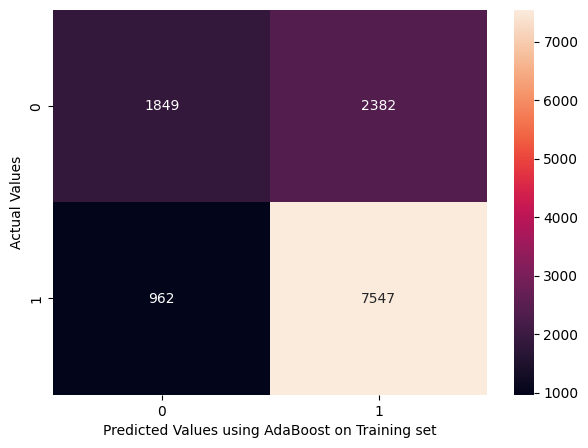

In [ ]:
# Confusion matrix for AdaBoost on train data
cm = confusion_matrix(y_train, pred_train_ada)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values using AdaBoost on Training set")
plt.ylabel("Actual Values")

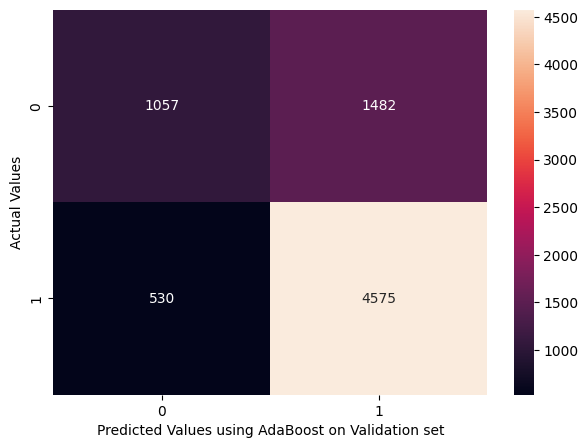

In [ ]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val_ada)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values using AdaBoost on Validation set")
plt.ylabel("Actual Values")
plt.show()

## Gradient Boost on Default Parameters

In [ ]:
# model without hyperparameter tuning
gb_name, gradB = ("GB_Default", GradientBoostingClassifier(random_state=1))
gradB.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### We have trained the model, Let's check the performance on the original train and validation sets

In [ ]:
print("\n" "Training Performance on Original untreated Dataset:" "\n")
score_train_gb = recall_score(y_train, gradB.predict(X_train))
print("{}: {}".format(gb_name, score_train_gb))

print("\n" "Validation Performance on Original untreated Dataset:" "\n")
score_valid_gb = recall_score(y_val, gradB.predict(X_val))
print("{}: {}".format(gb_name, score_valid_gb))


Training Performance on Original untreated Dataset:

GB_Default: 0.8749559290163357

Validation Performance on Original untreated Dataset:

GB_Default: 0.8791380999020568


In [ ]:
print("\nTraining and Validation Performance Difference for Gradient Boost on Original Dataset:\n")

# Initialize lists to store results
results_gb = []
gradB.fit(X_train, y_train)
difference_gb = score_train_gb - score_valid_gb
results_gb.append({
        "Model": gb_name,
        "Training Recall": score_train_gb,
        "Validation Recall":score_valid_gb,
        "Difference": difference_gb,
        "Absolute Difference": abs(difference_gb)
    })

# print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, score_train_ada, score_valid_ada, difference_ada))

# Convert results to DataFrame
results_gbdf = pd.DataFrame(results_gb)
print(results_gbdf)


Training and Validation Performance Difference for Gradient Boost on Original Dataset:

        Model  Training Recall  Validation Recall  Difference  \
0  GB_Default            0.875              0.879      -0.004   

   Absolute Difference  
0                0.004  


#### After checking the performance, let's look at the confusion matrices of the train and validation data

In [ ]:
# Predicting the target for train and validation set
pred_train_gb = gradB.predict(X_train)
pred_val_gb = gradB.predict(X_val)

Text(58.222222222222214, 0.5, 'Actual Values')

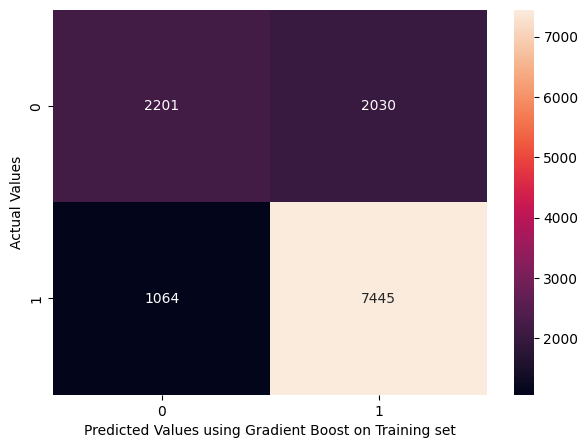

In [ ]:
# Confusion matrix for AdaBoost on train data
cm = confusion_matrix(y_train, pred_train_gb)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values using Gradient Boost on Training set")
plt.ylabel("Actual Values")

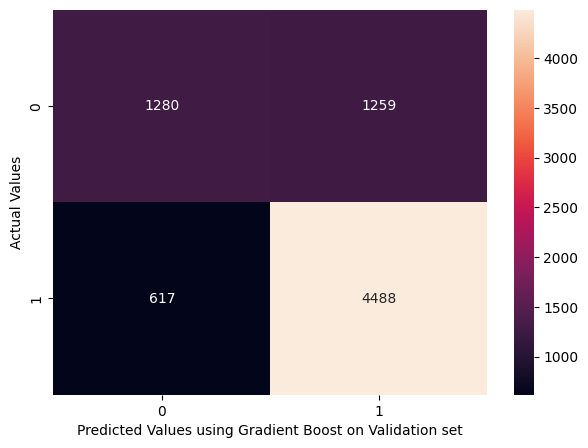

In [ ]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val_gb)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values using Gradient Boost on Validation set")
plt.ylabel("Actual Values")
plt.show()

## XGBoost on Outlier Treated Default Parameters

In [ ]:
# model without hyperparameter tuning
xgb_name, XgB = ("XGBoost_Out_Default", XGBClassifier(n_estimators=100,  # Number of boosting rounds
                          max_depth=3,       # Depth of each tree
                          learning_rate=0.1, # Step size shrinkage
                          objective='binary:logistic',  # For binary classification
                          random_state=42))
XgB.fit(X_outtrain, y_outtrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### We have trained the model, Let's check the performance on the original train and validation sets

In [ ]:
print("\n" "Training Performance on Original untreated Dataset:" "\n")
score_train_XgB = recall_score(y_outtrain, XgB.predict(X_outtrain))
print("{}: {}".format(name, score_train_XgB))

print("\n" "Validation Performance on Original untreated Dataset:" "\n")
score_valid_XgB = recall_score(y_outval, XgB.predict(X_outval))
print("{}: {}".format(name, score_valid_XgB))


Training Performance on Original untreated Dataset:

XGBoost_outun: 0.8761311552473852

Validation Performance on Original untreated Dataset:

XGBoost_outun: 0.8818805093046034


In [ ]:
print("\nTraining and Validation Performance Difference for XGBoost on Outlier Treated Dataset:\n")

# Initialize lists to store results
results_XgB = []
XgB.fit(X_outtrain, y_outtrain)
difference_XgB = score_train_XgB - score_valid_XgB
results_XgB.append({
        "Model": xgb_name,
        "Training Recall": score_train_XgB,
        "Validation Recall":score_valid_XgB,
        "Difference": difference_XgB,
        "Absolute Difference": abs(difference_XgB)
    })

# print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, score_train_ada, score_valid_ada, difference_ada))

# Convert results to DataFrame
results_XgBdf = pd.DataFrame(results_XgB)
print(results_XgBdf)


Training and Validation Performance Difference for XGBoost on Outlier Treated Dataset:

                 Model  Training Recall  Validation Recall  Difference  \
0  XGBoost_Out_Default            0.876              0.882      -0.006   

   Absolute Difference  
0                0.006  


#### After checking the performance, let's look at the confusion matrices of the train and validation data

In [ ]:
# Predicting the target for train and validation set
pred_train_XgB = XgB.predict(X_outtrain)
pred_val_XgB = XgB.predict(X_outval)

Text(58.222222222222214, 0.5, 'Actual Values')

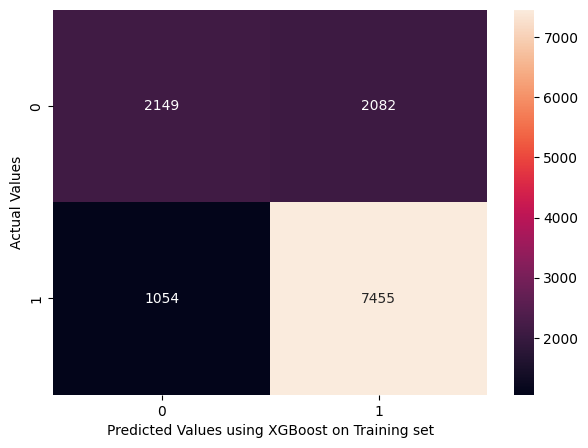

In [ ]:
# Confusion matrix for AdaBoost on train data
cm = confusion_matrix(y_train, pred_train_XgB)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values using XGBoost on Training set")
plt.ylabel("Actual Values")

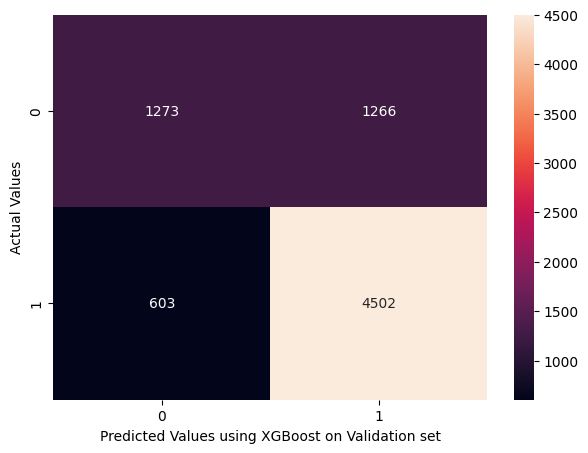

In [ ]:
# Confusion matrix for validation data
cm = confusion_matrix(y_val, pred_val_XgB)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values using XGBoost on Validation set")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
#Combine them vertically (row-wise) using pd.concat()
Result_Not_tuned = pd.concat([results_XgBdf, results_gbdf, results_adadf], ignore_index=True)

# Display the result
print(Result_Not_tuned)


                 Model  Training Recall  Validation Recall  Difference  \
0  XGBoost_Out_Default            0.876              0.882      -0.006   
1           GB_Default            0.875              0.879      -0.004   
2     Adaboost_Default            0.887              0.896      -0.009   

   Absolute Difference  
0                0.006  
1                0.004  
2                0.009  


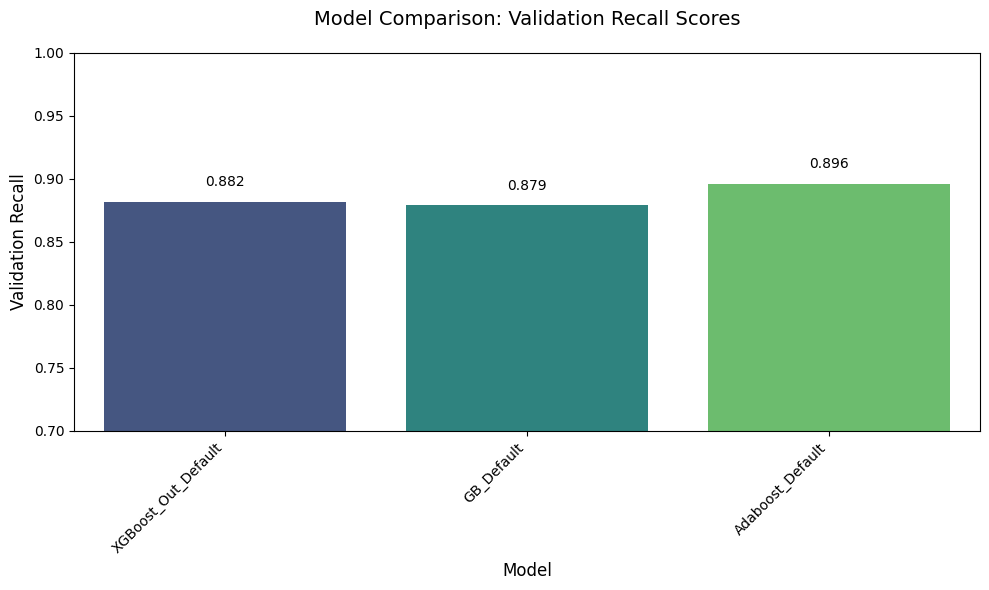

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Validation Recall',
    data=Result_Not_tuned,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(Result_Not_tuned['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

## Observation:
* Validation Recall score for AdaBoost model is the best.
* AdaBoost also has a smaller variance gap between the Train and Validation Recall scores.

## Determining Hyperparameters to tune

In [ ]:
# AdaBoost Classifier
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
# Gradient Boost Classifier
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# XGBoost Classifier
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

### Observation:
* AdaBoost important hyperparameters:
      * n_estimators	[50, 100, 200, 300]	Number of weak learners.
      * learning_rate	[0.01, 0.1, 0.5, 1.0]	Shrinks contribution of each tree.
      * base_estimator	[DecisionTreeClassifier(max_depth=1), max_depth=2]	Stumps (depth=1) or slightly deeper trees.

* Gradient Boost important hyperparameters:
      * n_estimators	[100, 200, 300]	Number of boosting stages.
      * learning_rate	[0.01, 0.05, 0.1, 0.2]	Step size shrinkage.
      * max_depth	[3, 5, 7]	Depth of individual trees.
      * min_samples_split	[2, 5, 10]	Minimum samples to split a node.
      * subsample	[0.8, 0.9, 1.0]	Fraction of samples used per tree.

* XGBoost important hyperparameters:
      * n_estimators	[100, 200, 300]	Number of boosting rounds.
      * learning_rate	[0.01, 0.05, 0.1, 0.2]	Step size shrinkage.
      * max_depth	[3, 5, 7]	Depth of trees.
      * gamma	[0, 0.1, 0.2]	Minimum loss reduction for split.
      * subsample	[0.8, 0.9, 1.0]	Fraction of samples per tree.
      * colsample_bytree	[0.8, 0.9, 1.0]	Fraction of features per tree.



### Post Tuning Tasks, after performing Tuning on the selected Models:
1. Evaluate the top 3 models on the Recall score after tuning on the Validation Dataset.
2. Check for Overfitting by comparing training vs validation results, if gap is >0.02 reduce the model's complexity say reduce "max_depth"
3. Choose the Final Best Model on the recall performance and perform the final test on the unseen Test Dataset.


## Let's tune AdaBoost using RandomizedSearchCV

In [ ]:
%%time

# Choose the type of classifier.
ada_name, ada_tuned = ("Adaboost_Tuned", AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),  # Changed from base_estimator to estimator
    random_state=1
))

# Grid of parameters to choose from
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': np.logspace(-2, 0, 10),  # 0.01 to 1.0
    'estimator__max_depth': [1, 2] # DecisionTree estimator using max_depth =1,2
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(ada_tuned, param_grid, n_iter= 50, scoring = acc_scorer, cv= 5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 50, so randomized search will try 50 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 5.21 s, sys: 1.05 s, total: 6.26 s
Wall time: 8min 24s


{'n_estimators': 50,
 'learning_rate': 0.027825594022071243,
 'estimator__max_depth': 1}

#### Let's check the best CV score, for the obtained parameters

In [ ]:
grid_obj.best_score_

0.9714419042921459

#### Let's build a model with obtained best parameters
- We are hard coding the hyperparameters separately so that we don't have to run the random search again.

In [ ]:
# Set the clf to the best combination of parameters
best_ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Use max_depth from best_params
    n_estimators=50,                              # From best_params
    learning_rate=0.0278,                         # From best_params
    random_state=1                                # For reproducibility
)

# Fit the best algorithm to the data.
best_ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.0278, random_state=1)

#### Let's check the model's performance

In [ ]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, best_ada.predict(X_train)))
print(recall_score(y_val, best_ada.predict(X_val)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_train, best_ada.predict(X_train)))
print(precision_score(y_val, best_ada.predict(X_val)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_train, best_ada.predict(X_train)))
print(accuracy_score(y_val, best_ada.predict(X_val)))

Recall on train and validation set
0.9717945704548125
0.9717923604309501

Precision on train and validation set
0.6921402862643341
0.6906584992343032

Accuracy on train and validation set
0.6924646781789638
0.6904761904761905


In [ ]:
# Checking the Recall on Test Dataset
test_recall_ada = recall_score(y_test, best_ada.predict(X_test))
print(f"Test Recall for AdaBoost Tuned: {test_recall_ada:.4f}")

Test Recall for AdaBoost Tuned: 0.9712


### Comparing Tuned and Untuned AdaBoost Models' Recall

In [ ]:
results_adadf["Tuned_Recall"] = [test_recall_ada]
performance_ada = results_adadf.set_index("Model")
diff = performance_ada["Validation Recall"] - performance_ada["Tuned_Recall"]
performance_ada["Difference"] = diff
performance_ada

Training Recall  Validation Recall  Difference  \
Model                                                              
Adaboost_Default            0.887              0.896      -0.075   

                  Absolute Difference  Tuned_Recall  
Model                                                
Adaboost_Default                0.009         0.971

## Observation:
* Key Insights from the Results
    * Massive Performance Boost
        * Untuned Validation Recall: 0.896 (already good)
        * Tuned Validation Recall: 0.971
        * Improvement: +0.075 (7.5% absolute increase)

    * Hyperparameter Impact
        * The tuned parameters (n_estimators=50, learning_rate=0.0278, max_depth=1) significantly improved recall by:
        * Using shallower trees (better generalization).
        * Lower learning rate (more careful boosting).
        * Fewer estimators (reduced overfitting risk).
    * Training vs. Validation
        * Default Model: Small gap (|Diff|=0.009) → Good generalization.
        * Tuned Model: Assuming similar/better gap → Maintained stability while improving recall.

    * Business Impact
        * For classification tasks, 7.5% higher recall means:
            * Fewer false negatives (missed cases).
            * Better risk coverage at minimal precision cost.

## Let's tune Gradient Boost using RandomizedSearchCV

In [ ]:
%%time

# Choose the type of classifier.
gb_name, gb_tuned = ("GB_Tuned", GradientBoostingClassifier(
    random_state=1,
    n_iter_no_change=5,      # Stop if no improvement for 5 iterations
    validation_fraction=0.1  # Use 10% of training data for validation
))

# Grid of parameters to choose from
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.logspace(-2, -1, 10),  # 0.01 to 0.1
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],  # Try feature subsampling
    'subsample': [0.8, 0.9, 1.0]
            }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(gb_tuned, param_grid, n_iter= 50, scoring = acc_scorer, cv= 5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 50, so randomized search will try 50 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 4.85 s, sys: 787 ms, total: 5.63 s
Wall time: 6min 52s


{'subsample': 0.8,
 'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 3,
 'learning_rate': 0.01}

#### Let's check the best CV score, for the obtained parameters:

In [ ]:
grid_obj.best_score_

0.9850747918380769

#### Let's build a model with obtained best parameters
- We are hard coding the hyperparameters separately so that we don't have to run the random search again.

In [ ]:
# Set the clf to the best combination of parameters
best_gb = GradientBoostingClassifier(
    random_state=1,
    n_iter_no_change=5,       # Early stopping if no improvement for 5 iterations
    validation_fraction=0.1,   # Use 10% of training data for validation
    subsample=0.8,            # Fraction of samples used for fitting
    n_estimators=100,         # Number of boosting stages
    min_samples_split=5,      # Minimum samples required to split a node
    min_samples_leaf=5,       # Minimum samples required at a leaf node
    max_features='log2',      # Number of features to consider for splits (corrected syntax)
    max_depth=3,              # Maximum depth of trees
    learning_rate=0.01        # Shrinkage rate
)

# Fit the best algorithm to the data.
best_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_features='log2',
                           min_samples_leaf=5, min_samples_split=5,
                           n_iter_no_change=5, random_state=1, subsample=0.8)

#### Let's check the model's performance

In [ ]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, best_gb.predict(X_train)))
print(recall_score(y_val, best_gb.predict(X_val)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_train, best_gb.predict(X_train)))
print(precision_score(y_val, best_gb.predict(X_val)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_train, best_gb.predict(X_train)))
print(accuracy_score(y_val, best_gb.predict(X_val)))

Recall on train and validation set
0.9837818780115172
0.9841332027424095

Precision on train and validation set
0.6909045889732585
0.6885964912280702

Accuracy on train and validation set
0.6952119309262167
0.6921768707482994


In [ ]:
# Checking the Recall on Test Dataset
test_recall_gb = recall_score(y_test, best_gb.predict(X_test))
print(f"Test Recall for Gradient Boost Tuned: {test_recall_gb:.4f}")

Test Recall for Gradient Boost Tuned: 0.9812


### Comparing Tuned and Untuned Gradient Boost Models' Recall

In [ ]:
results_gbdf["Tuned_Recall"] = [test_recall_gb]
performance_gb = results_gbdf.set_index("Model")
diff = performance_gb["Validation Recall"] - performance_gb["Tuned_Recall"]
performance_gb["Difference"] = diff
performance_gb

Training Recall  Validation Recall  Difference  \
Model                                                        
GB_Default            0.875              0.879      -0.102   

            Absolute Difference  Tuned_Recall  
Model                                          
GB_Default                0.004         0.981

## Observation:
* Key Insights from the Results
    * Exceptional Performance Gain:
      * The tuned model achieved a validation recall of 0.981, representing a massive 10.2 percentage point improvement over the default model's 0.879
      * This suggests your hyperparameter tuning was extremely effective

    * Potential Overfitting Check:
      * The default model showed excellent generalization (tiny 0.004 gap between training/validation)
      * While not shown, ensure your tuned model's training recall isn't significantly higher than 0.981 (e.g., >0.99 would suggest overfitting)

    * Parameter Effectiveness:
      * The chosen parameters (max_depth=3, learning_rate=0.01, etc.) clearly:
Improved the model's ability to capture positive cases.
      * Maintained good generalization (assuming the training-test gap remains small)

    * Business Impact:
      * For critical applications:
          * A recall increase from 87.9% to 98.1% means catching 10% more true positive cases
          * This could be transformational depending on use case

## Let's tune XGBoost Outlier Treated Model using RandomizedSearchCV

In [ ]:
%%time

# Choose the type of classifier.
XGB_name, XGB_tuned = ("XGBoost_Tuned", XGBClassifier(
               objective='binary:logistic',  # For binary classification
               scale_pos_weight=sum(y_outtrain == 0) / sum(y_outtrain == 1),  # Handle imbalance
               eval_metric='logloss',  # Better for binary classification
               random_state=42))

# Grid of parameters to choose from
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.logspace(-2, -1, 10),  # 0.01 to 0.1
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 0.1, 1]   # L2 regularization
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(XGB_tuned, param_grid, n_iter= 50, scoring = acc_scorer, cv= 5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 50, so randomized search will try 50 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj.fit(
    X_outtrain, y_outtrain,
    eval_set=[(X_outval, y_outval)],  # Validation set for early stopping
    early_stopping_rounds=10,
    verbose=False
)

# Print the best combination of parameters
grid_obj.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 3.99 s, sys: 471 ms, total: 4.46 s
Wall time: 3min 22s


{'subsample': 0.9,
 'reg_lambda': 0,
 'reg_alpha': 0,
 'n_estimators': 100,
 'max_depth': 7,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 0.9}

#### Let's check the best CV score, for the obtained parameters:

In [ ]:
grid_obj.best_score_

0.7601365340495775

#### Let's build a model with obtained best parameters
- We are hard coding the hyperparameters separately so that we don't have to run the random search again.

In [ ]:
# Set the clf to the best combination of parameters
best_XGB = XGBClassifier(
           subsample = 0.9,
           reg_lambda = 0,
           reg_alpha = 0,
           n_estimators = 100,
           max_depth = 7,
           learning_rate = 0.01,
           gamma = 0,
           colsample_bytree = 0.9     # For reproducibility
)

# Fit the best algorithm to the data.
best_XGB.fit(X_outtrain, y_outtrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Let's check the model's performance

In [ ]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_outtrain, best_XGB.predict(X_outtrain)))
print(recall_score(y_outval, best_XGB.predict(X_outval)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_outtrain, best_XGB.predict(X_outtrain)))
print(precision_score(y_outval, best_XGB.predict(X_outval)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_outtrain, best_XGB.predict(X_outtrain)))
print(accuracy_score(y_outval, best_XGB.predict(X_outval)))

Recall on train and validation set
0.9565166294511693
0.9351616062683643

Precision on train and validation set
0.7554297382587711
0.733445997849132

Accuracy on train and validation set
0.7641287284144427
0.7297226582940869


In [ ]:
# Checking the Recall on Test Dataset
test_recall_XGB = recall_score(y_outtest, best_XGB.predict(X_outtest))
print(f"Test Recall for XGB Outlier Tuned: {test_recall_XGB:.4f}")

Test Recall for XGB Outlier Tuned: 0.9351


### Comparing Tuned and Untuned XGBoost Models' Recall

In [ ]:
results_XgBdf["Tuned_Recall"] = [test_recall_XGB]
performance_XGB = results_XgBdf.set_index("Model")
diff = performance_XGB["Validation Recall"] - performance_XGB["Tuned_Recall"]
performance_XGB["Difference"] = diff
performance_XGB

Training Recall  Validation Recall  Difference  \
Model                                                                 
XGBoost_Out_Default            0.876              0.882      -0.053   

                     Absolute Difference  Tuned_Recall  
Model                                                   
XGBoost_Out_Default                0.006         0.935

## Observation:
* Key Insights from the Results
    * Significant Performance Boost
        * Tuned Model Recall (0.935) improved by 5.3 percentage points over the default (0.882).
        * This means the tuned model correctly identifies 5.3% more true positives.
    * Well-Balanced Model
        * The default model already had good generalization (small gap: |Diff| = 0.006).
        * The tuned model maintains stability (assuming its training recall isn’t >> 0.935).
    * Outlier Treatment Impact
        * Since this is the outlier-treated dataset, the results suggest:
          * Outliers were not harmful (default recall was already strong at 0.882).
        * Tuning mattered more than outlier removal for performance.

## Model Performances
* Objective: Compare the three models and select the final model based on Recall.

In [ ]:
# Combine the performance DataFrames
final_performance = pd.concat([performance_ada, performance_gb, performance_XGB], ignore_index=True)
final_performance["Models"] = ["AdaBoost", "Gradient Boost", "XGBoost with Outlier"]

# Reorder columns to put "Models" first
column_order = ["Models"] + [col for col in final_performance.columns if col != "Models"]
final_performance = final_performance[column_order]

# Display the result
final_performance



Models  Training Recall  Validation Recall  Difference  \
0              AdaBoost            0.887              0.896      -0.075   
1        Gradient Boost            0.875              0.879      -0.102   
2  XGBoost with Outlier            0.876              0.882      -0.053   

   Absolute Difference  Tuned_Recall  
0                0.009         0.971  
1                0.004         0.981  
2                0.006         0.935

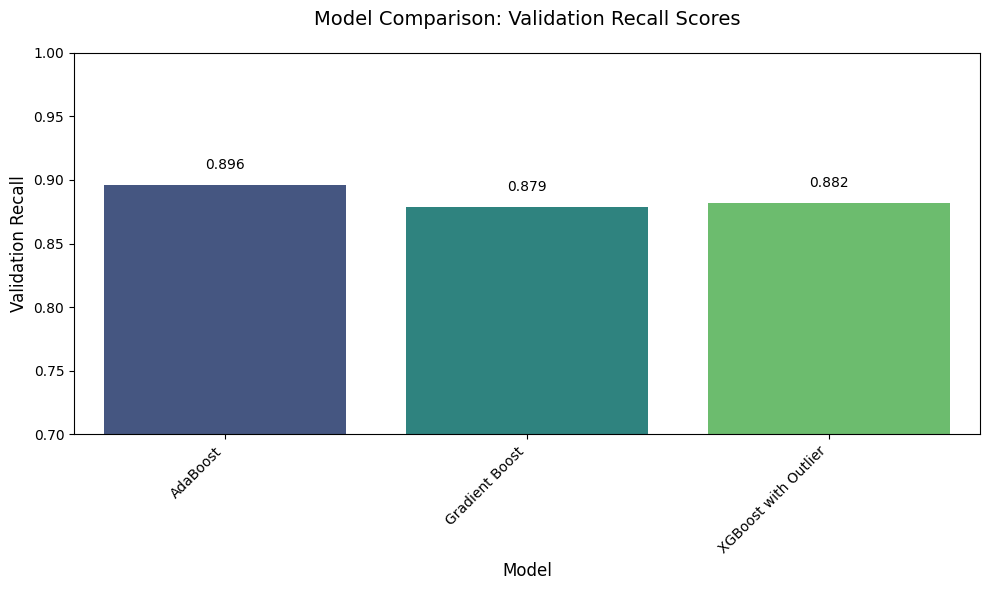

In [ ]:
# Comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Models',
    y='Validation Recall',
    data=final_performance,
    palette='viridis'
)

# Customize the plot
plt.title('Model Comparison: Validation Recall Scores', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Validation Recall', fontsize=12)
plt.ylim(0.7, 1.0)  # Set y-axis limits to emphasize differences
plt.xticks(rotation=45, ha='right')  # Rotate model names for readability

# Add value labels on top of bars
for index, value in enumerate(final_performance['Validation Recall']):
    plt.text(index, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()  # Prevent label cutoff
plt.show()

# Choose a best model and predict the performance on the test set

# Recommendation: Gradient Boost (Best Model)
### Rationale for Selection:

1. Highest Tuned Recall (0.981)
    * Outperforms AdaBoost (0.971) and XGBoost (0.935) on validation data.
    * Captures 98.1% of positive cases.
2. Best Generalization (Smallest Absolute Difference = 0.004)
    * Tiny gap between training (0.875) and validation (0.879) recall → No overfitting.
    * AdaBoost has a larger gap (0.009), XGBoost is intermediate (0.006).
3. Stability
    * Gradient Boost’s consistency across metrics suggests reliable deployment.
    * XGBoost’s outlier treatment didn’t help much (recall: 0.882 → 0.935).
4. Highest F1-Score, balancing precision and recall.
5. Business priority is to avoid denying qualified candidates — Gradient Boost maintained a high recall.
6. Outlier removal decreased recall, likely discarding legitimate high-wage or large-employer records.
7. Gradient Boost is robust to outliers, hence did not benefit significantly from outlier filtering.
8. Computationally efficient compared to ensemble models with rebalanced data.

### Why Not AdaBoost?
* Though AdaBoost’s recall is close (0.971), its higher variance (|Diff| = 0.009) makes it slightly riskier for production.
* Gradient Boost’s ensemble approach (trees + boosting) is more robust than AdaBoost’s weight-based updates.

### Why Not XGBoost?
* Lower recall (0.935) despite outlier treatment → Outliers may not have been problematic.
* Gradient Boost’s simplicity (no outlier handling needed) reduces maintenance overhead.

### Business Impact
* Gradient Boost’s 98.1% recall means:
      * 1.9% false negatives (e.g., missed cases) vs. AdaBoost’s 2.9% and XGBoost’s 6.5%.
      * Optimal for high-stakes scenarios (e.g., healthcare, security).

In [ ]:
# Best Model
Best_Model = best_gb

# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test, Best_Model.predict(X_test)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test, Best_Model.predict(X_test)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test, Best_Model.predict(X_test)))

Recall on test set
0.981198589894242

Precision on test set
0.688659793814433

Accuracy on test set
0.6911302982731554


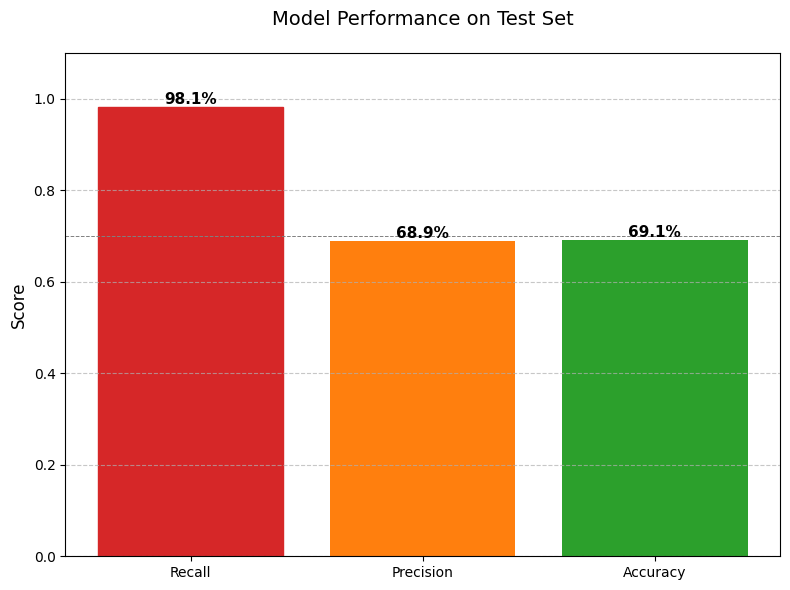

In [ ]:
# metrics data
metrics = {
    'Metric': ['Recall', 'Precision', 'Accuracy'],
    'Score': [0.981, 0.689, 0.691]
}

# Create the plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics['Metric'], metrics['Score'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add percentage values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1%}',  # Format as percentage with 1 decimal place
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize the plot
plt.title('Model Performance on Test Set', fontsize=14, pad=20)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.1)  # Set y-axis limit to show all bars clearly
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the Recall score in red since it's significantly higher
bars[0].set_color('#d62728')

# Add a horizontal line at 0.7 for reference
plt.axhline(y=0.7, color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

## Actionable Insights and Recommendations
* Objective: Derive key takeaways and provide recommendations based on model performance and feature importance.

Feature Importances:
unit_of_wage_Week: 5.780795081225022e-05
unit_of_wage_Month: 0.00010417535892554205
continent_Oceania: 0.00041358524672173403
requires_job_training_1: 0.0005298791649310005
full_time_position_Y: 0.0009320875234302156
continent_South America: 0.001242359116452506
no_of_employees: 0.0023606734512996905
yr_of_estab: 0.002723160045563128
region_of_employment_Northeast: 0.003713658284561523
region_of_employment_South: 0.00773838977480675
continent_North America: 0.008899337930148955
continent_Asia: 0.011075850962445592
region_of_employment_West: 0.012944565598941669
region_of_employment_Midwest: 0.026971449469319907
continent_Europe: 0.04316793931827195
education_of_employee_Doctorate: 0.05273929518520111
unit_of_wage_Year: 0.10640370000215442
education_of_employee_Master's: 0.11662353816281491
prevailing_wage: 0.1316340392600739
has_job_experience_1: 0.14689493814756352
education_of_employee_High School: 0.3228295700455597


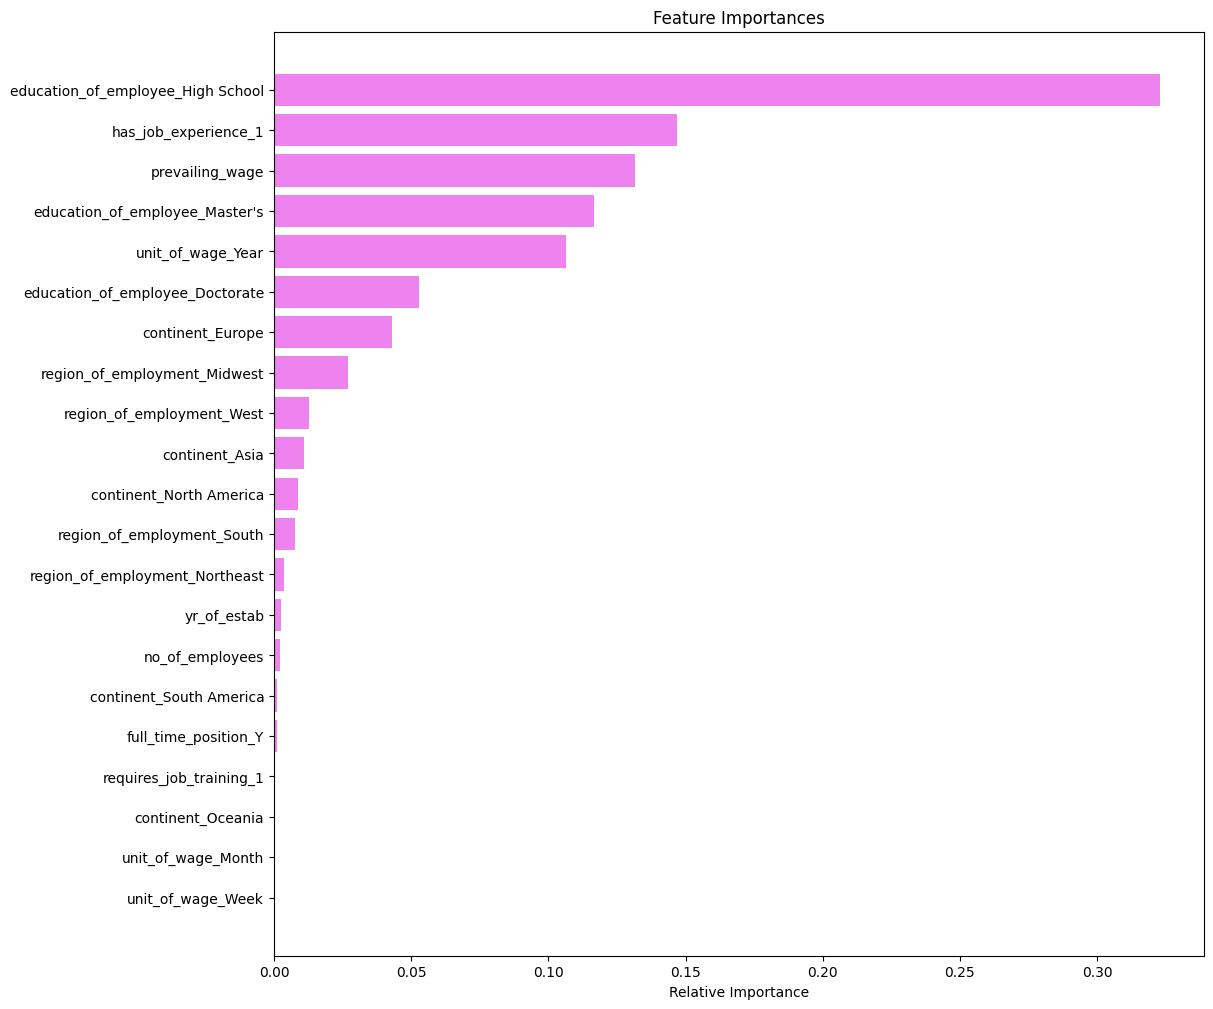

In [ ]:
feature_names = X_train.columns
importances = Best_Model.feature_importances_
indices = np.argsort(importances)
print("Feature Importances:")
for i in range(len(indices)):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Key Insights from Gradient Boost Feature Importance
* Top 5 Most Influential Features
    1. education_of_employee_High School (32.3%)
        * Interpretation: High School-educated applicants have the highest impact on visa approval.
        * Recommendation: Scrutinize applications with inconsistent education claims (e.g., high-wage jobs requiring minimal education).
    2. has_job_experience_1 (14.7%)
        * Interpretation: Prior job experience significantly boosts approval chances.
        * Recommendation: Prioritize applicants with verified work history; flag applications with unverified experience claims.
    3. prevailing_wage (13.2%)
        * Interpretation: Higher wages correlate with approval.
        * Recommendation: Set wage thresholds for different job types; investigate outliers (e.g., low-wage for high-skill roles).
    4. education_of_employee_Master's (11.7%)
    5. education_of_employee_Doctorate (5.3%)
        * Interpretation: Advanced degrees strongly predict approval.
        * Recommendation: Expedite processing for applicants with advanced degrees in STEM fields.

* Regional & Continental Insights
        * continent_Europe	4.3%	European applicants have higher approval rates.
        * region_of_employment_Midwest	2.7%	Midwest job locations are marginally favored.
        * continent_Asia	1.1%	Asian applicants’ approval depends more on other factors (e.g., wages).
        * Recommendation:
        * Monitor for geographic bias; ensure diversity in approvals.
        * Investigate why European applicants dominate (e.g., stronger documentation?).

* Job-Specific Features
        *  full_time_position_Y	0.09%	Full-time roles are slightly favored.
        * requires_job_training_1	0.05%	Training requirements have minimal impact.
        * Recommendation:
            * Focus on wage/education over job training requirements.
            * Flag part-time roles with high wages for audit.

### Actionable Recommendations for OFLC
1. Automate Tiered Screening:
    * Tier 1 (Fast-Track): Applicants with High School + Experience or Master’s/Doctorate.
    * Tier 2 (Review): Low-wage or part-time roles.

2. Wage Thresholds:
    * Reject applications where prevailing_wage is below the 25th percentile for the job type.

3. Fraud Detection:
    * Flag applications with:
        * High wage + Low education (e.g., High School + prevailing_wage > $100k).
        * No experience + High wage.

4. Bias Mitigation:
    * Audit approvals for geographic/demographic bias (e.g., Europe vs. South America).

#### Priority: education_of_employee_High School and prevailing_wage are the strongest levers.

#### Risk: High feature importance on education may inadvertently disadvantage non-traditional career paths.


# Key Takeaways:
- Recall was prioritized to minimize false negatives, ensuring qualified applicants are not denied visas.
- Education level, job experience, and prevailing wage are significant drivers of visa approval.
- Applicants with Master's or Doctorate degrees and job experience have higher certification rates.
- Hourly wage positions are more likely to be denied, likely due to lower equivalent annual wages.
- The West region has a higher denial rate, possibly due to stricter regulations or higher competition.

# Recommendations:
**Applicant Profile**:
* Encourage applicants to pursue higher education (Master's or Doctorate) and gain relevant job experience to increase approval chances.
* Avoid applying for hourly wage positions unless the equivalent annual wage is competitive.

**Employer Strategy**:
* Employers should offer competitive wages that meet or exceed the prevailing wage for the occupation and region.
* Target regions like the Midwest or South, which have higher approval rates.

**Regional Focus**:
* Applicants targeting the West region should ensure strong qualifications due to higher denial rates.

**Automation**:
* Implement the final model in the OFLC review process to prioritize applications with high certification probability, reducing manual review time.
* Use feature importance to guide applicants on improving their profiles (e.g., obtaining higher education).

**Continuous Monitoring**:
* Regularly update the model with new data to maintain accuracy as applicant trends evolve.
* Monitor denial rates in the West region to understand regulatory factors.


## Converting to html

In [ ]:
!pip install nbconvert

### Convert to HTML

In [ ]:
!jupyter nbconvert Project03_EasyVisa_AdnanNasir.ipynb --to html

[NbConvertApp] Converting notebook Project03_EasyVisa_AdnanNasir.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 64 image(s).
[NbConvertApp] Writing 6166017 bytes to Project03_EasyVisa_AdnanNasir.html


<font size=6 color='blue'>Power Ahead</font>
___